In [12]:
# %pip install -r requirements.txt

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from scipy.stats import entropy
import numpy as np
from sklearn.preprocessing import StandardScaler

In [13]:
file_name = "data/polished2.csv"

df = pd.read_csv(file_name)

<Axes: >

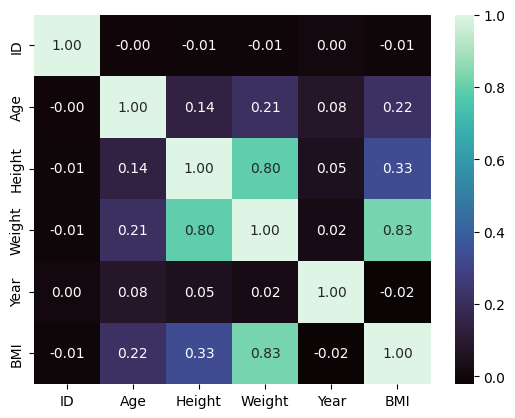

In [14]:
# matriz de correlação so das variaveis numericas
to_numeric_df = df.drop(df.columns[0], axis=1)
numeric_df = to_numeric_df.select_dtypes(include=['float64', 'int64'])
df_corr = numeric_df.corr()

sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='mako')

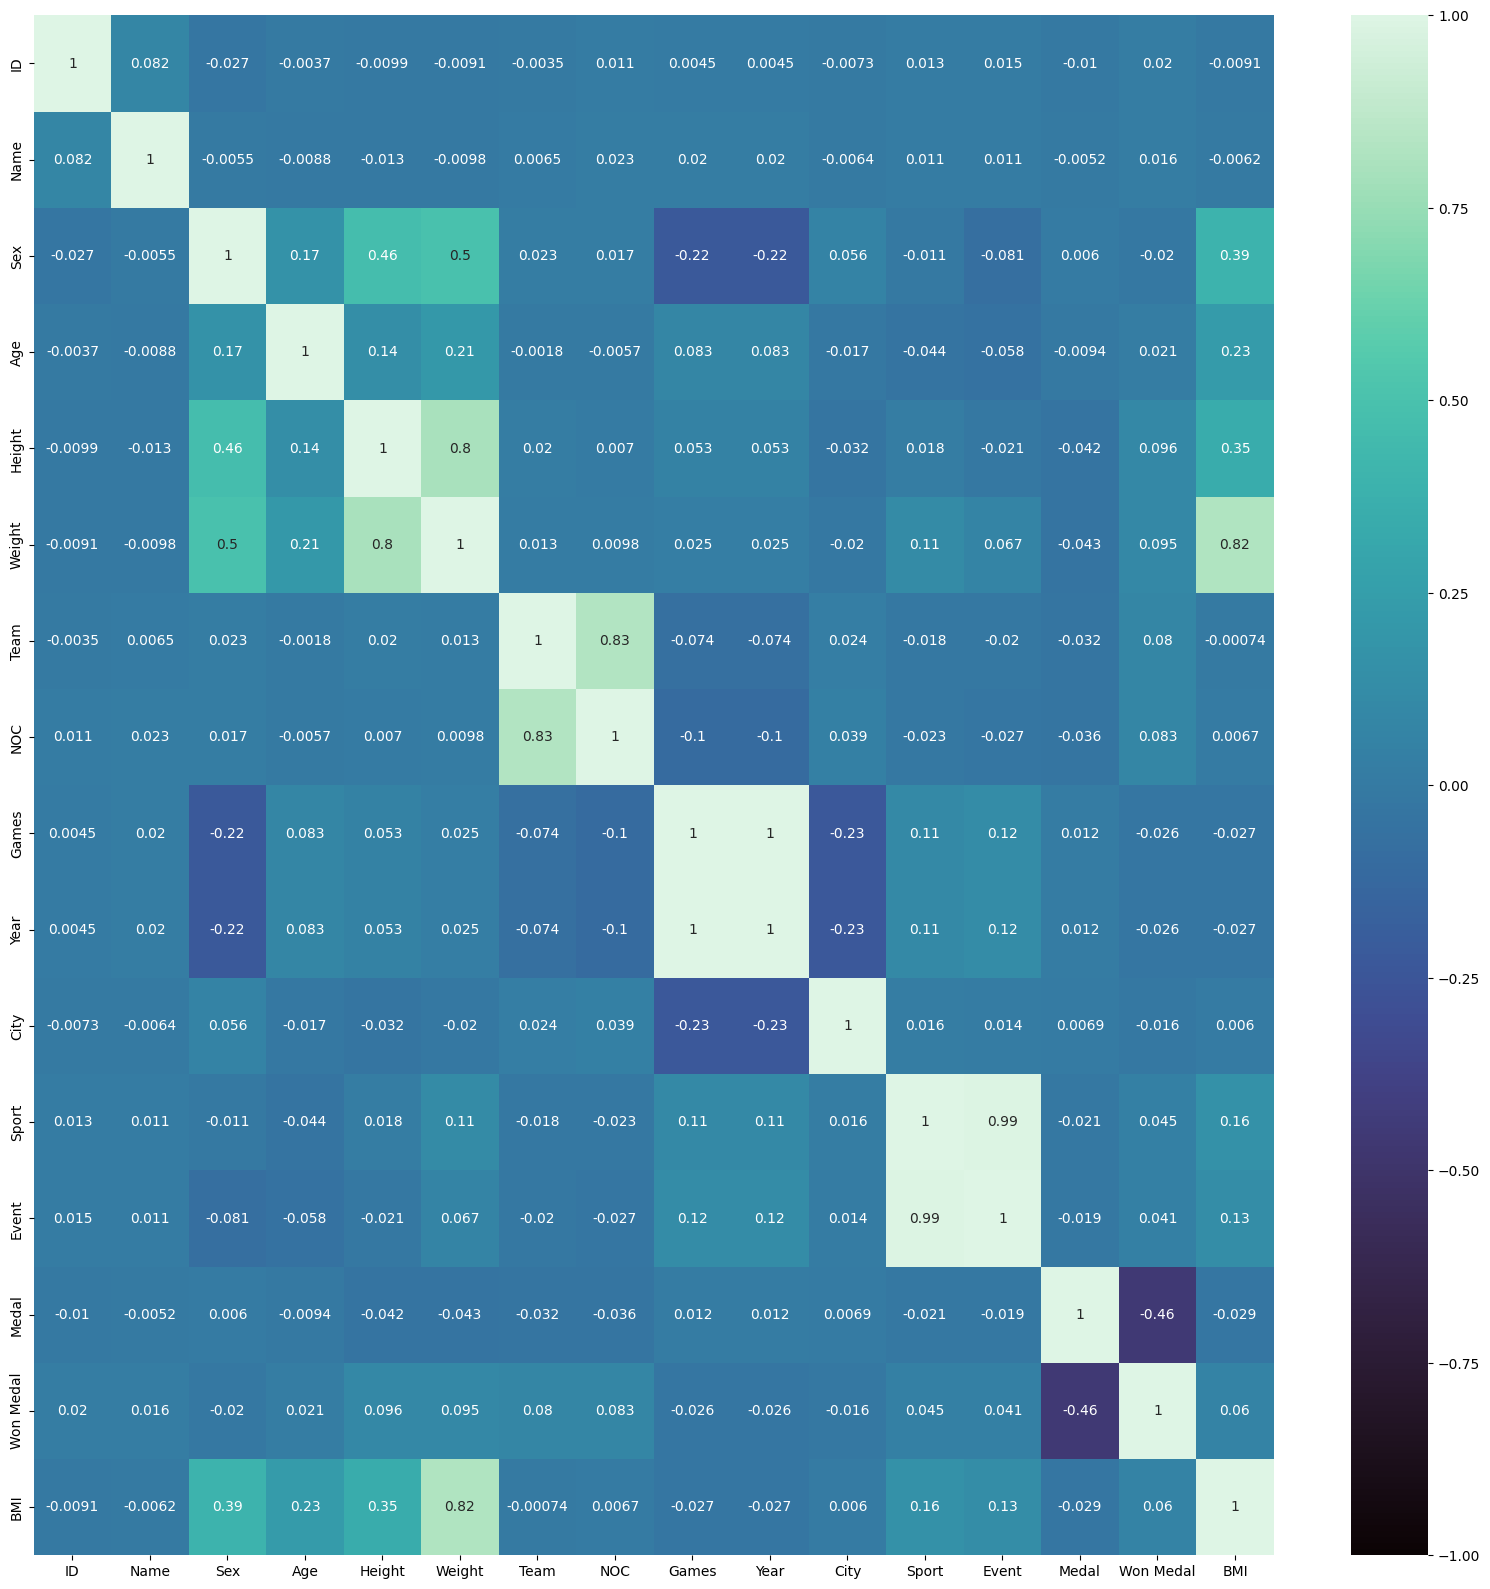

In [15]:
# Passar um encoder nos categoricos para conseguir comprar distribuições
encoders = {}
# remove Season column
to_encode_df = df.drop(df.columns[0], axis=1)
to_encode_df = to_encode_df.drop(columns='Season')

for columns in to_encode_df.columns:
    le = LabelEncoder()
    to_encode_df[columns] = le.fit_transform(to_encode_df[columns])
    encoders[columns] = le
    
corr_matrix = to_encode_df.corr()


plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='mako', vmin=-1, vmax=1)
plt.show()

In [26]:
#plt.figure(figsize=(30, 30))

#sns.pairplot(to_encode_df, hue='Medal')

# plt.show()

Archery


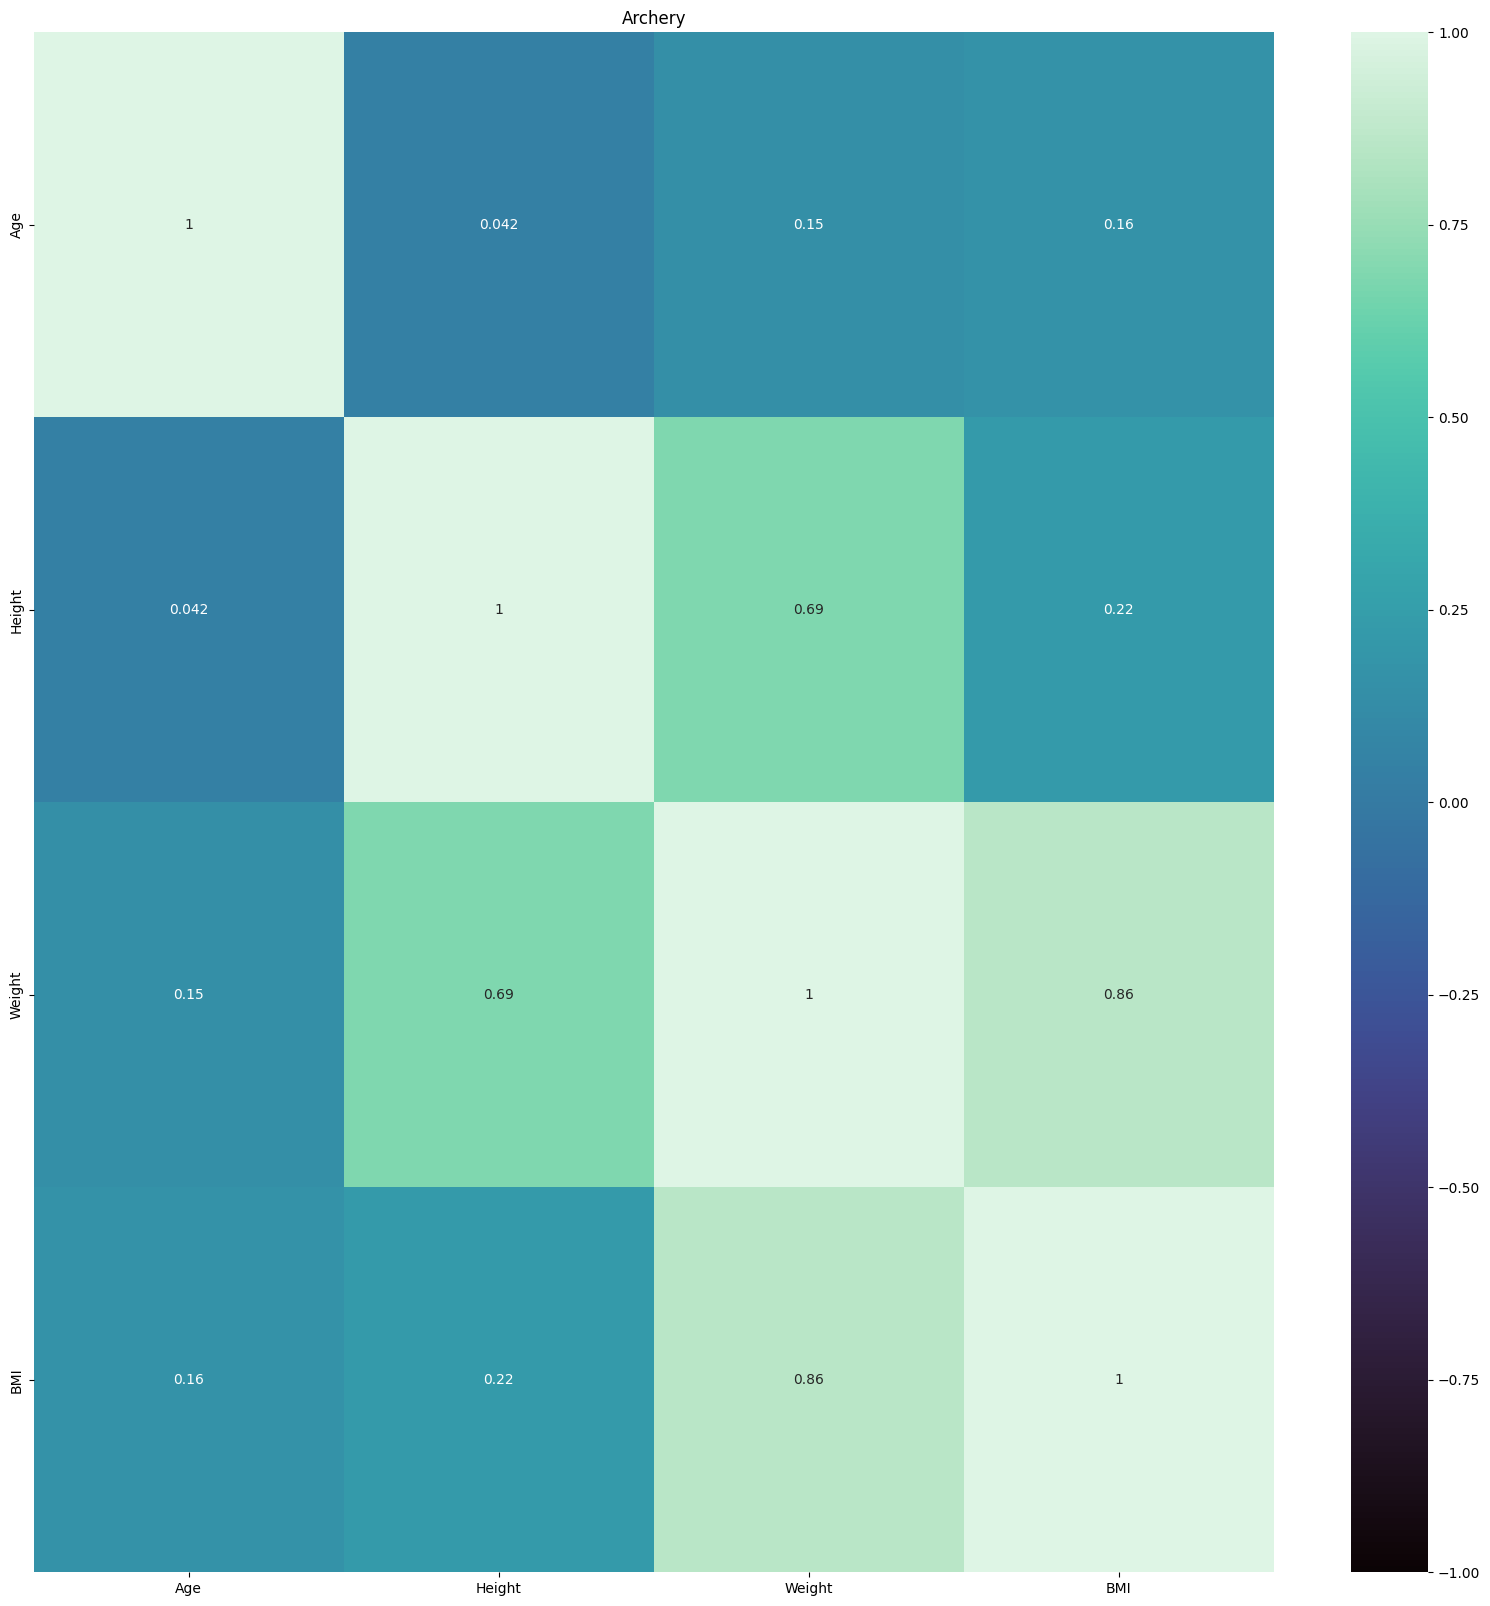

Athletics


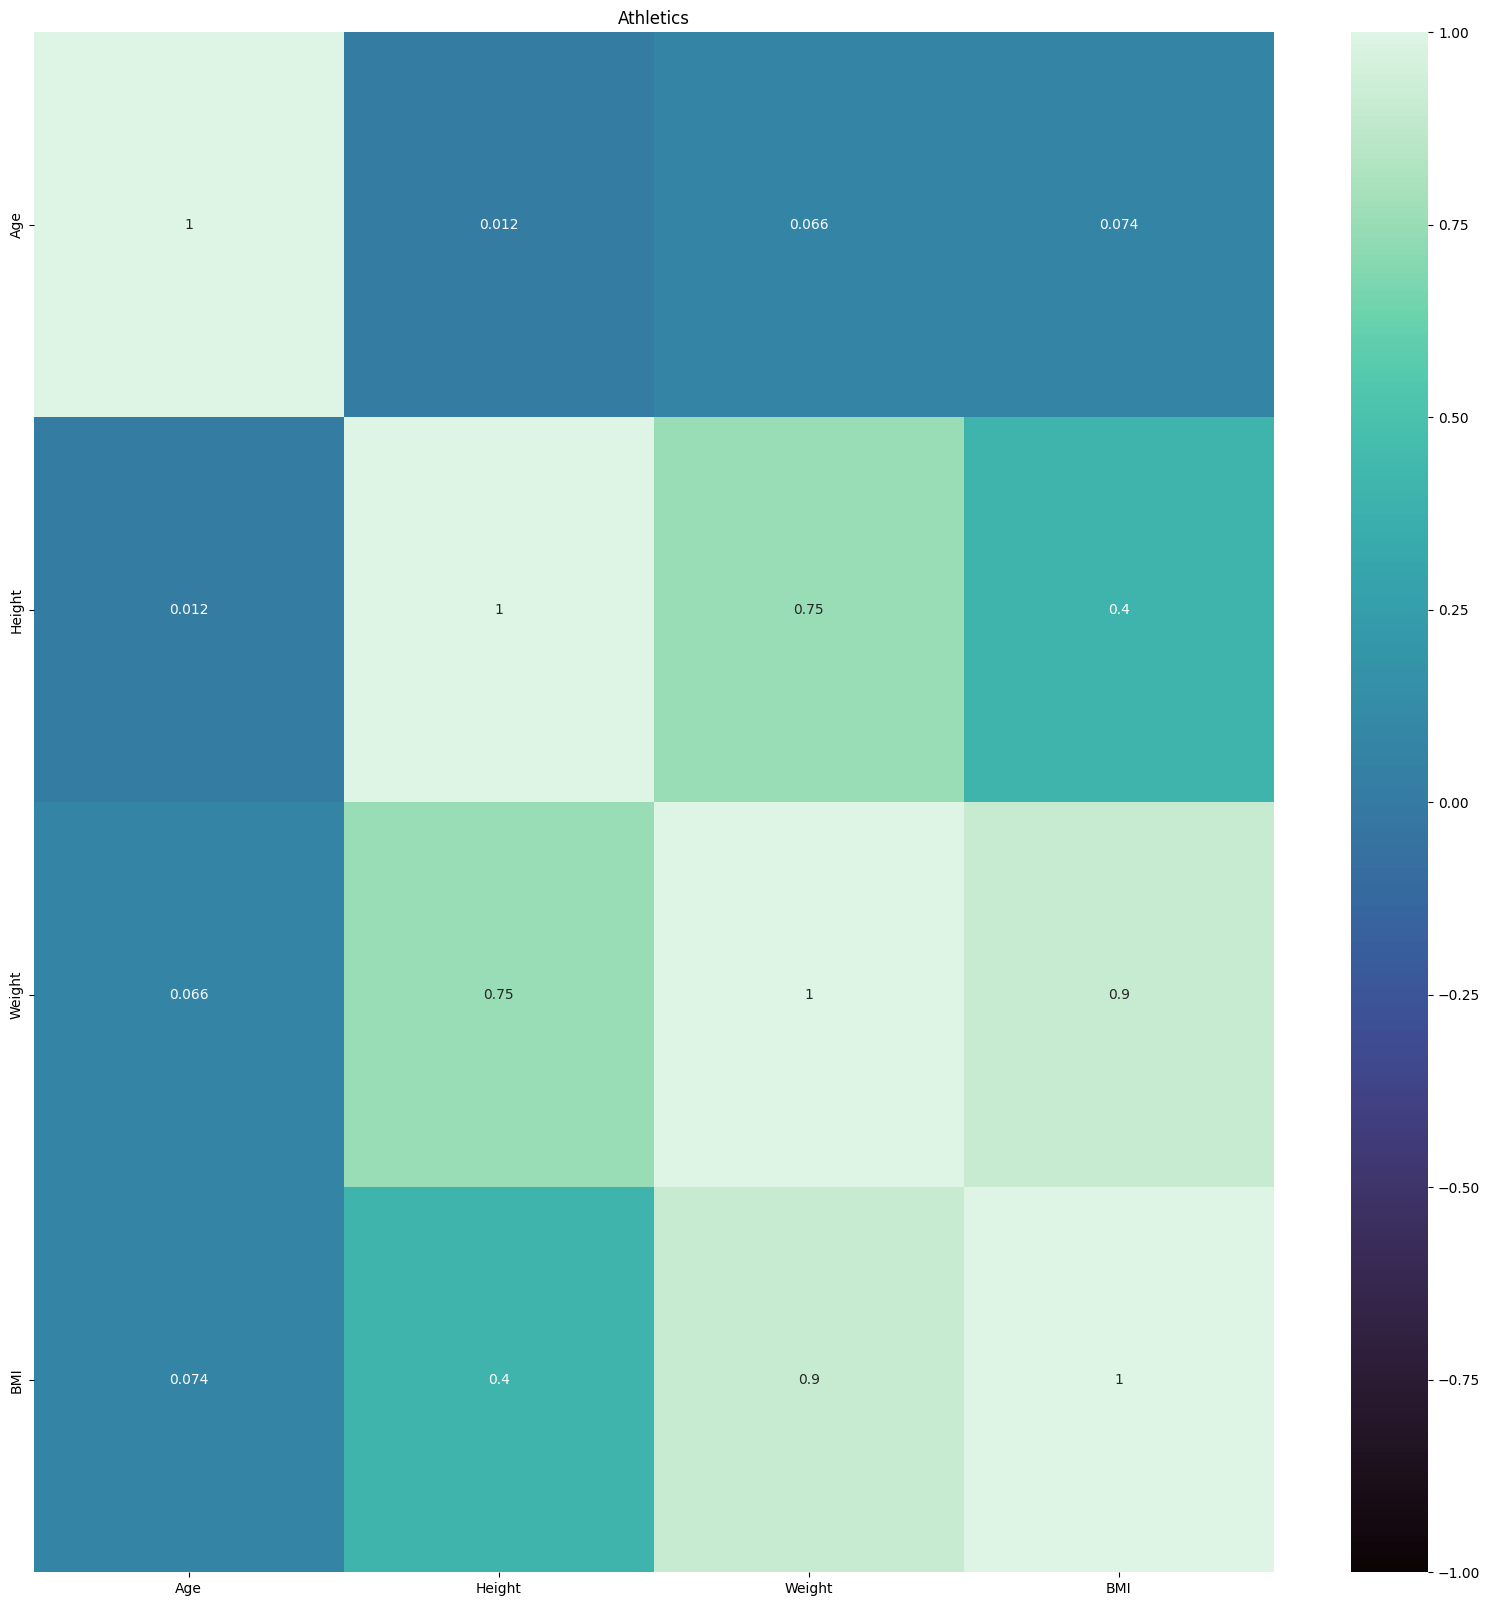

Badminton


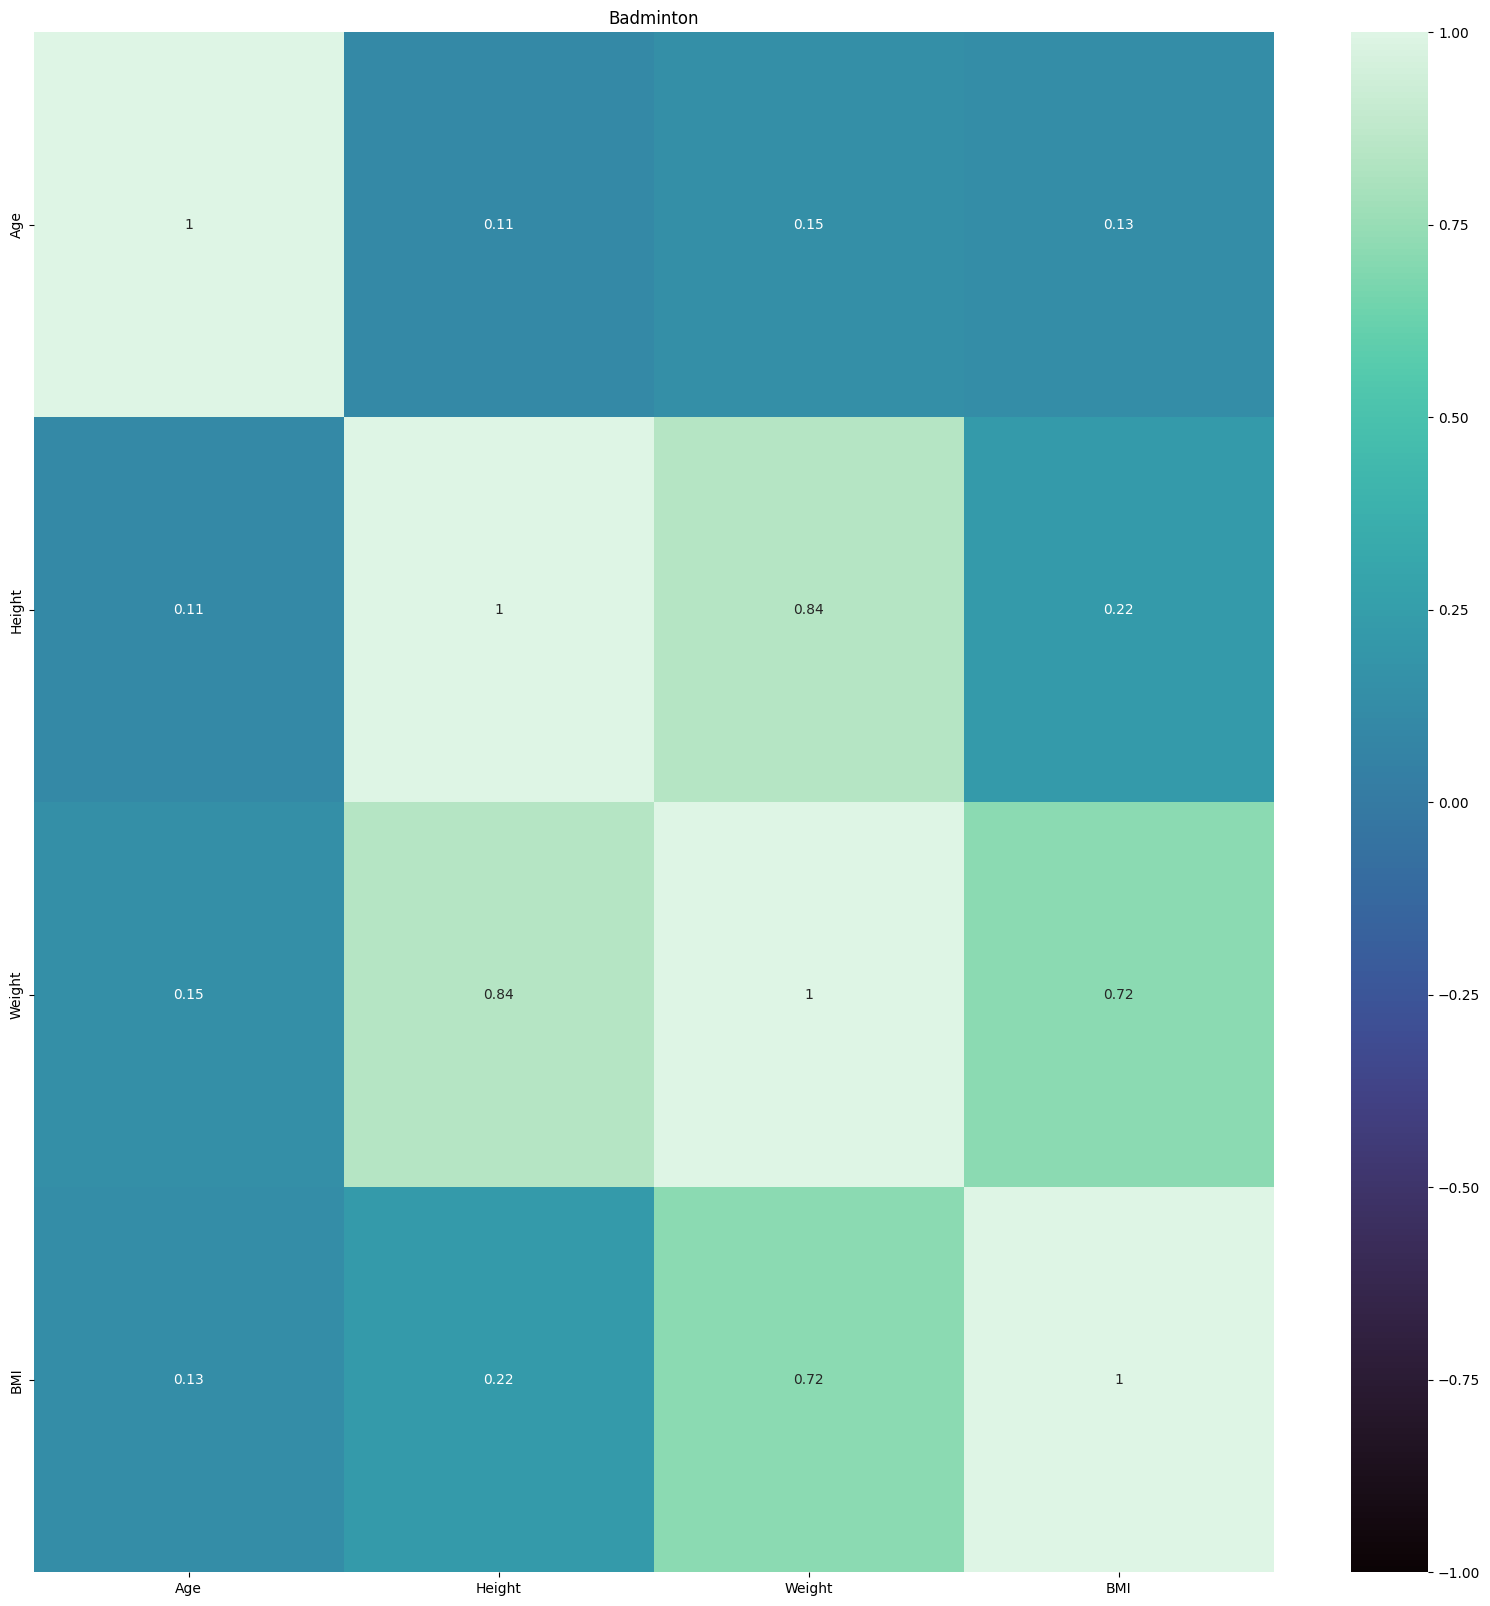

Baseball


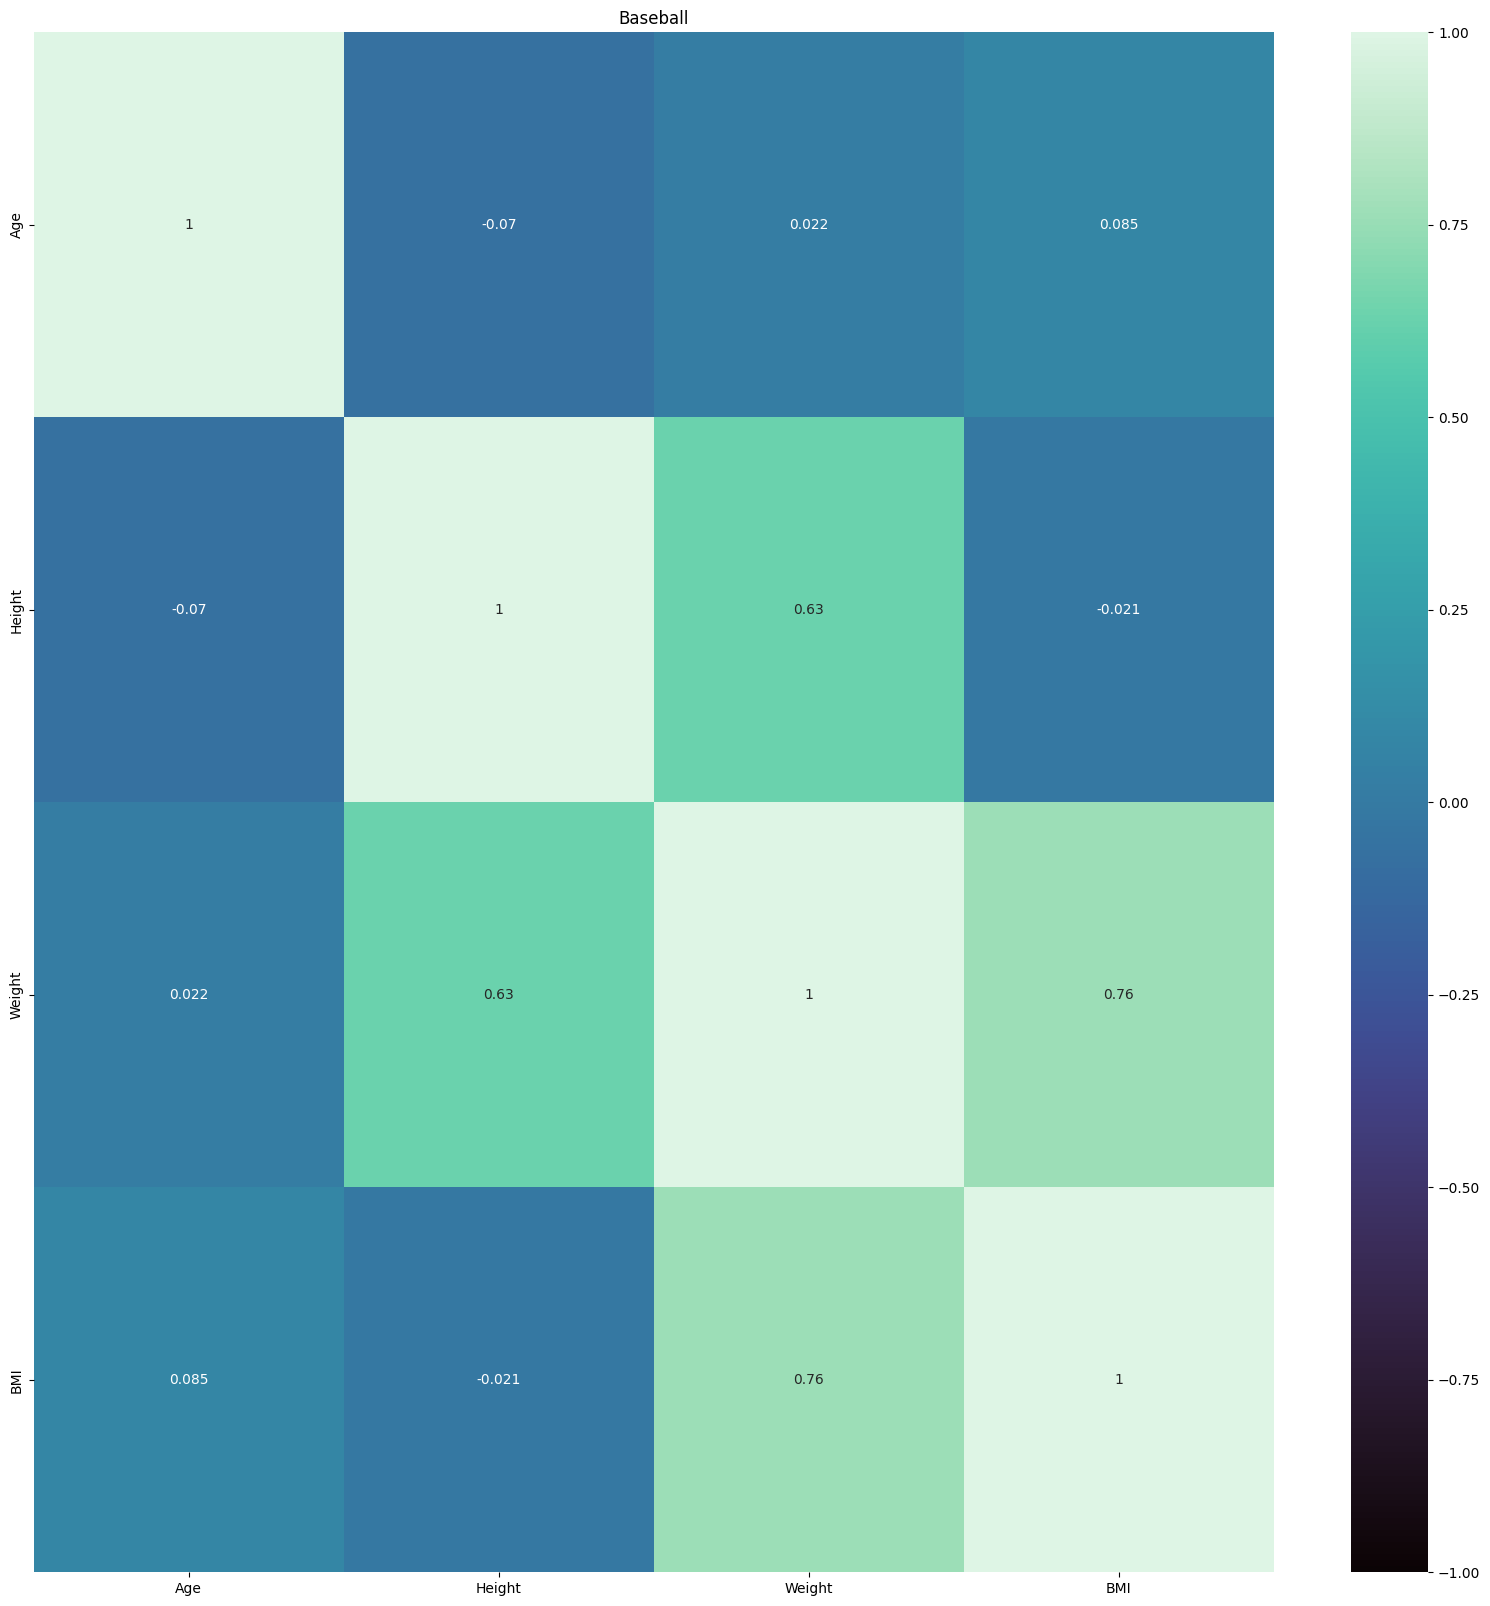

Basketball


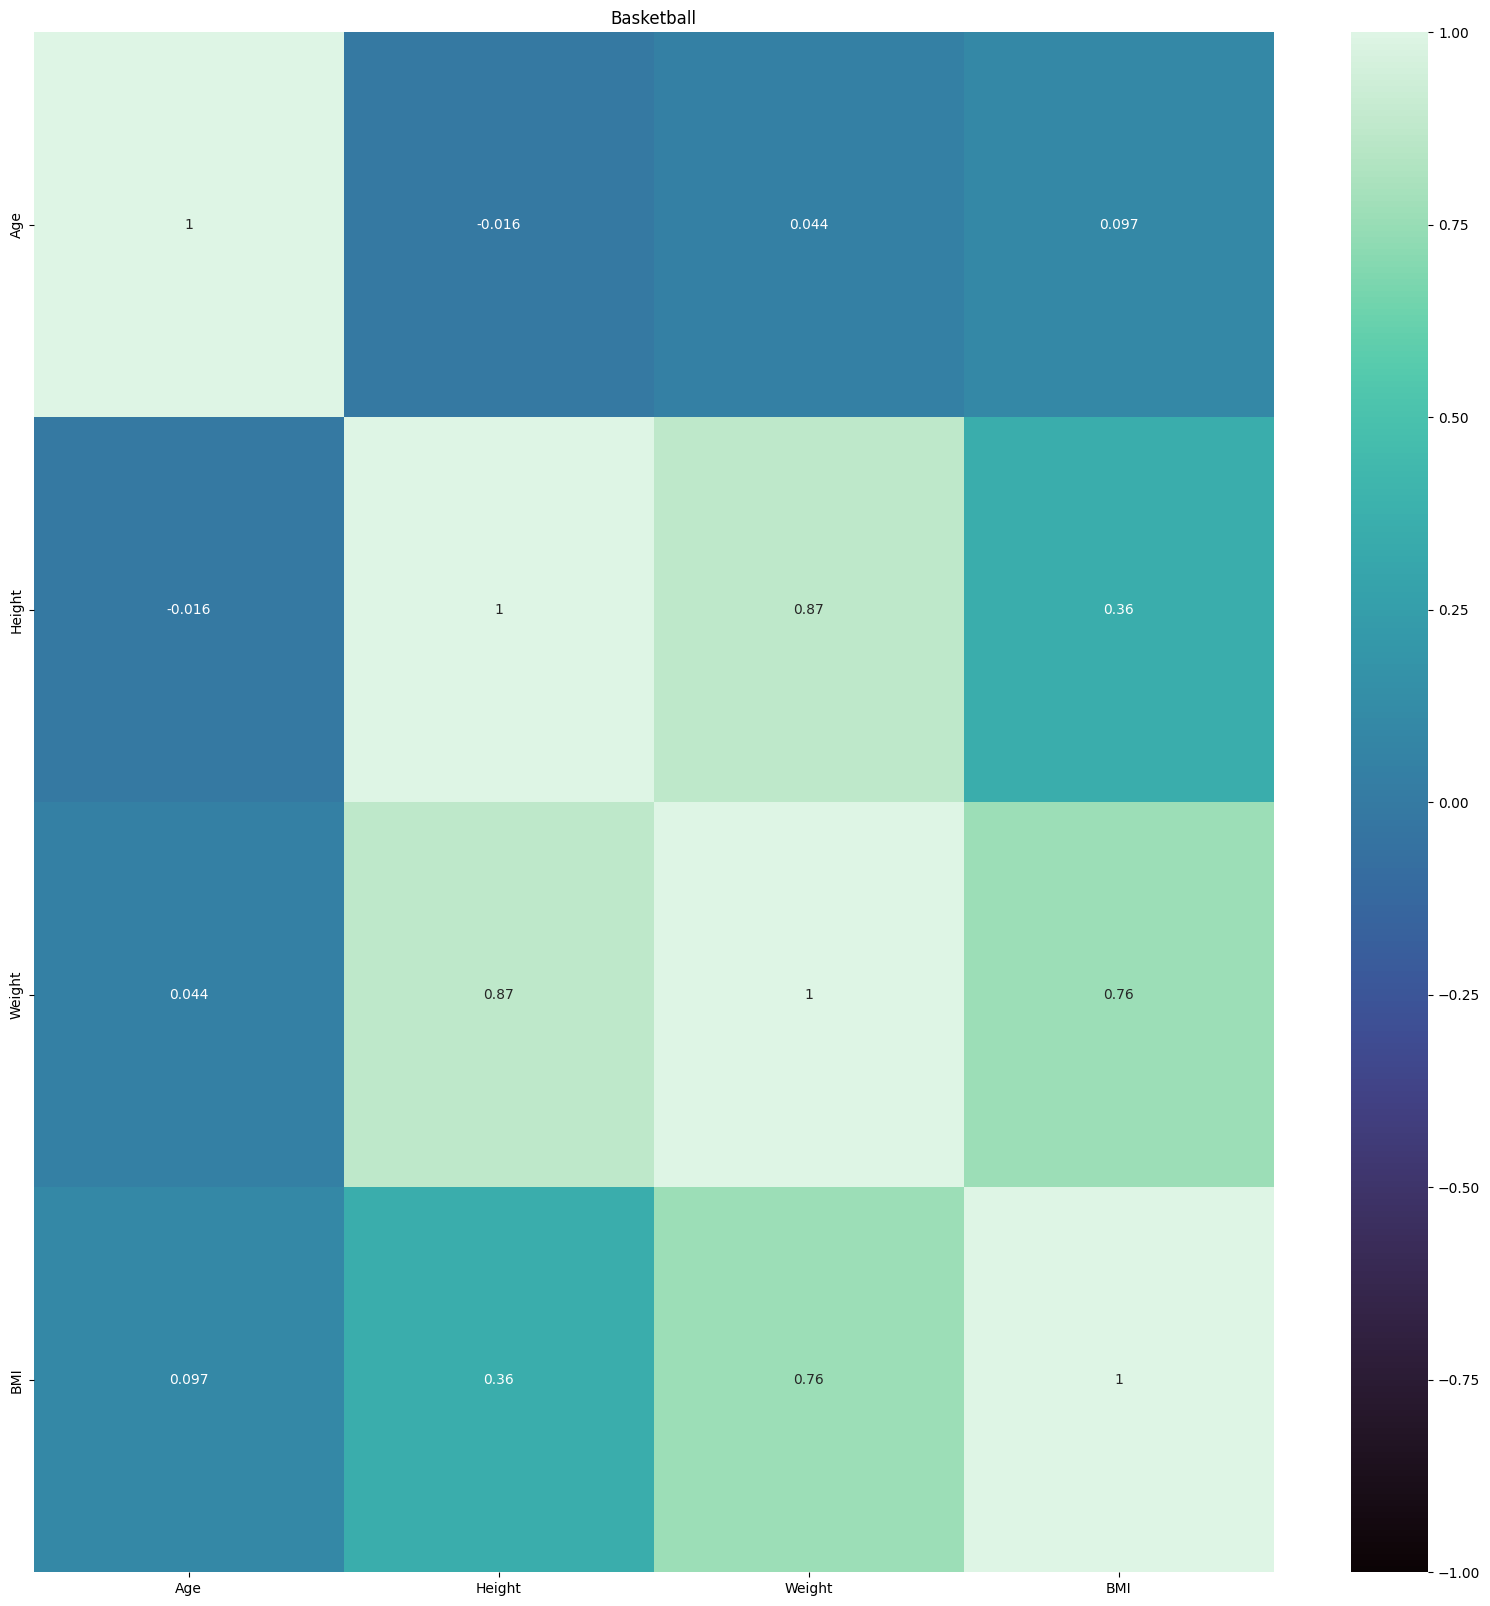

Beach Volleyball


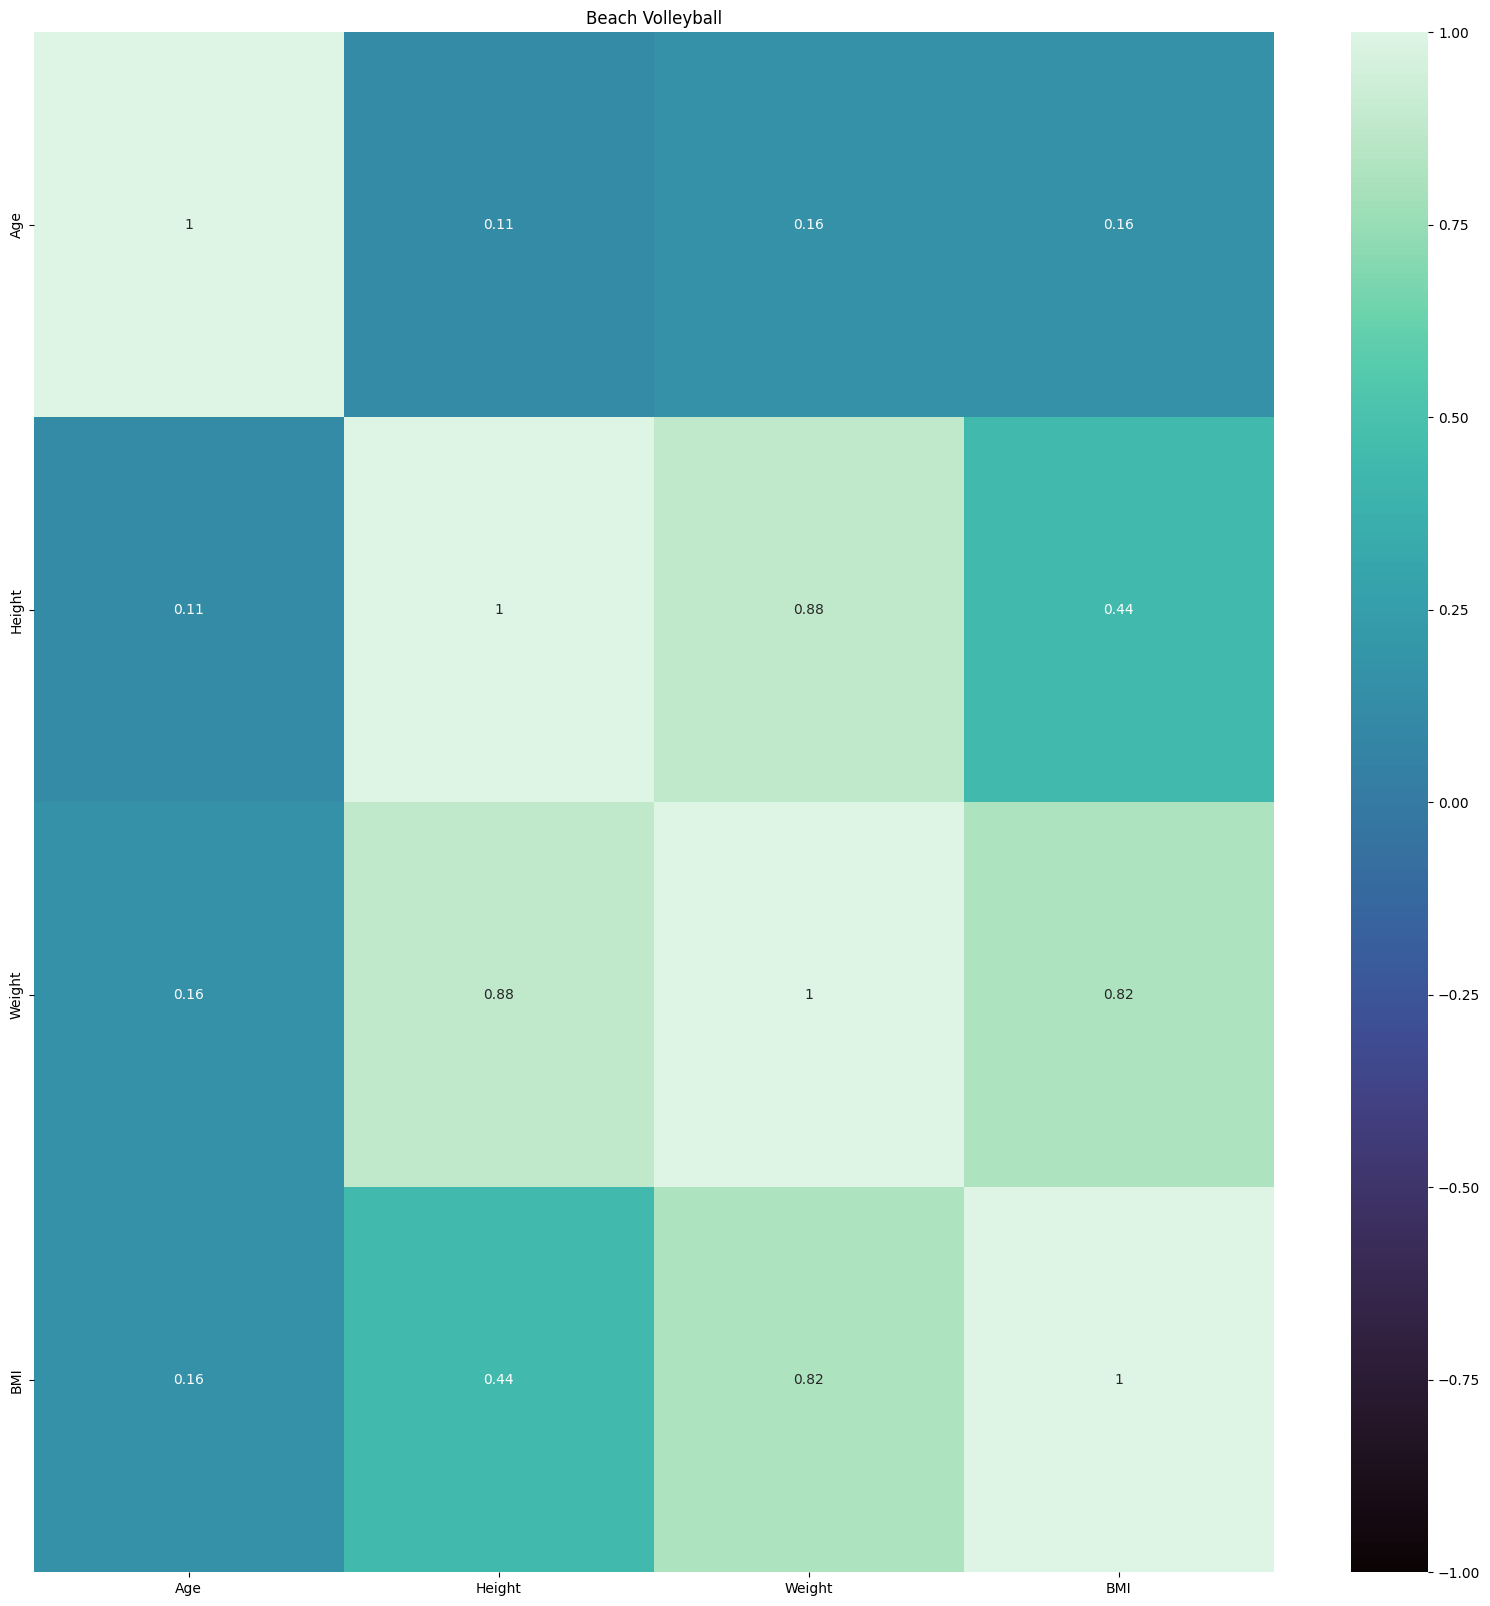

Boxing


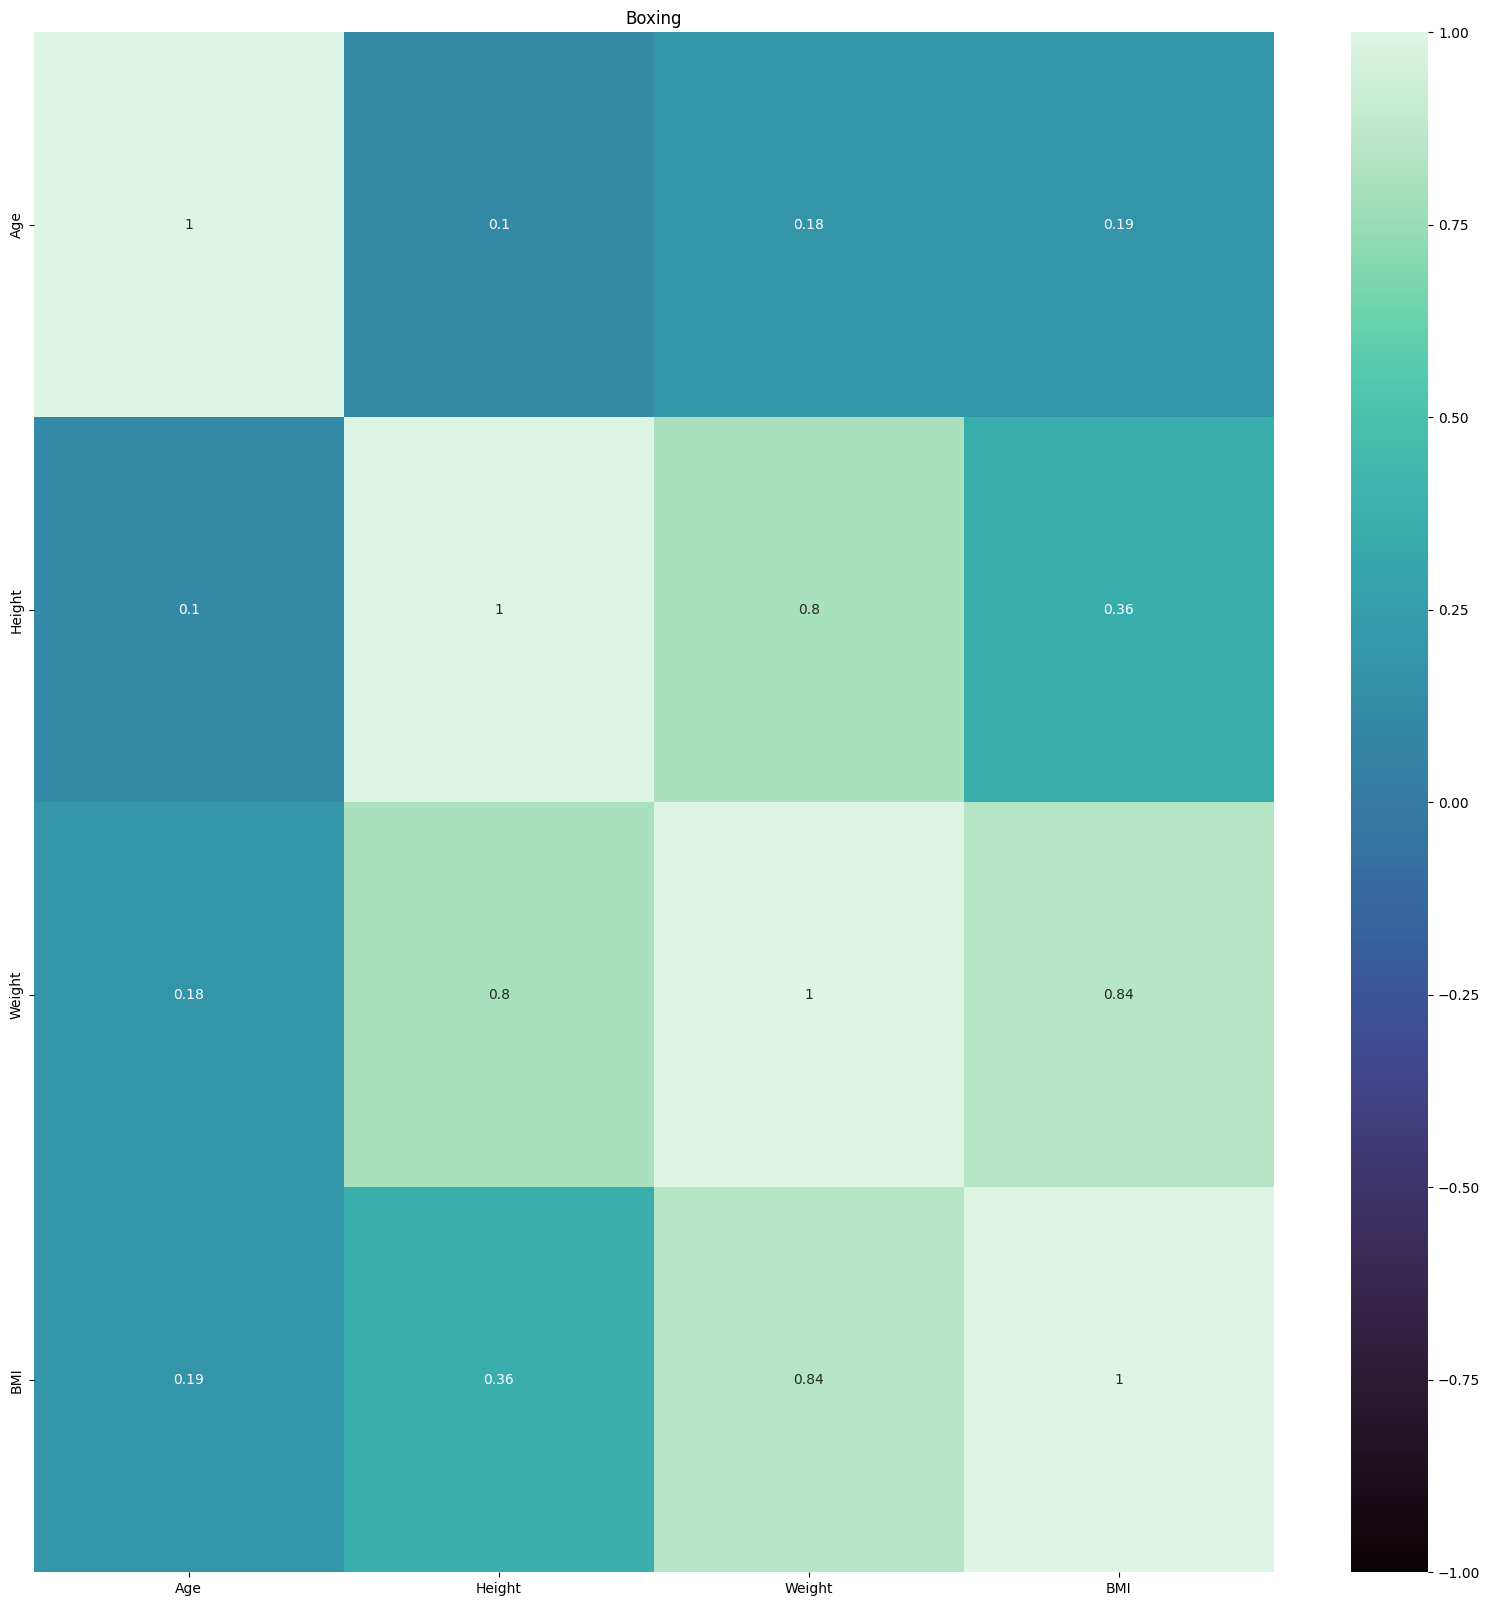

Canoeing


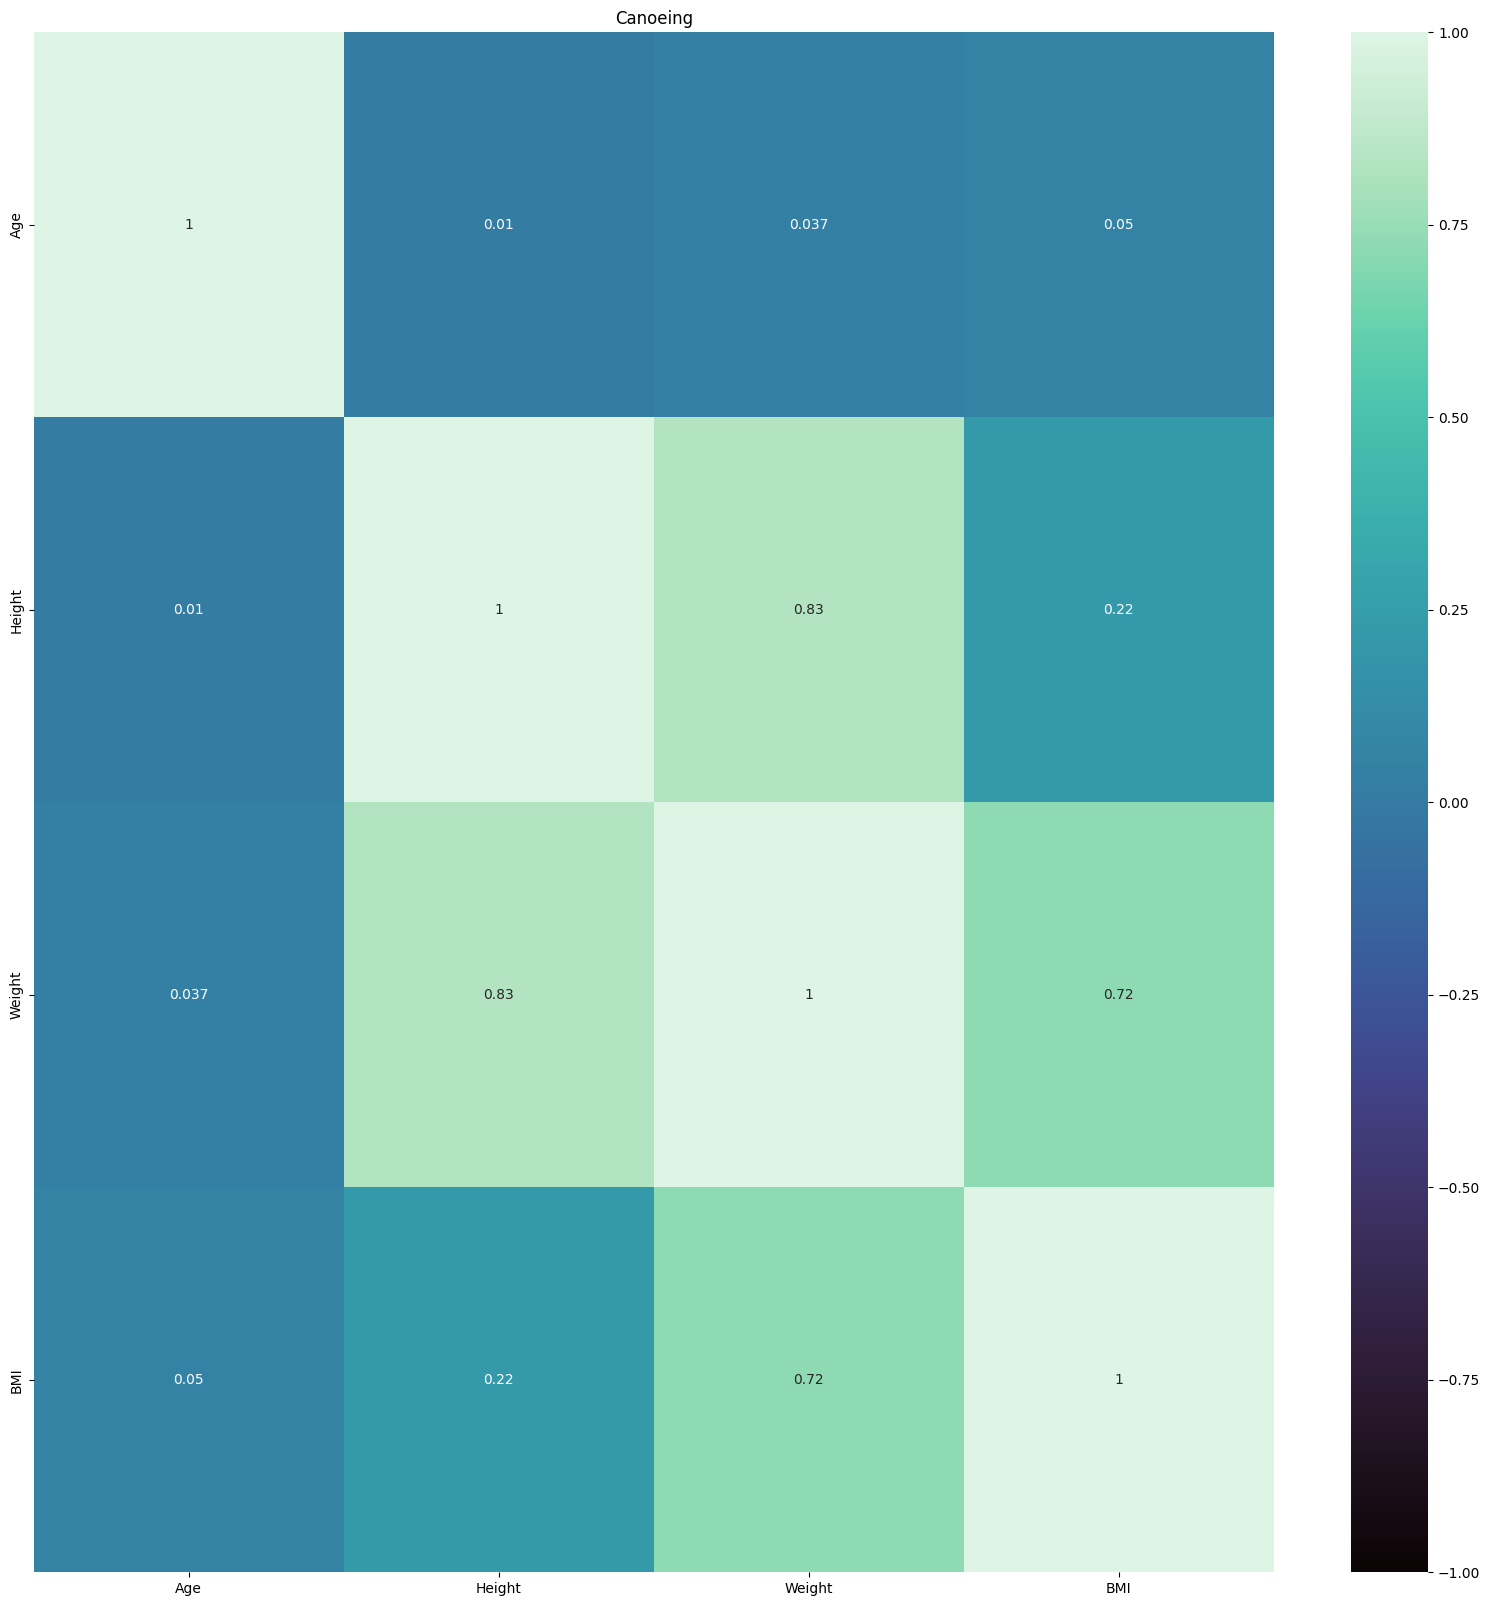

Cycling


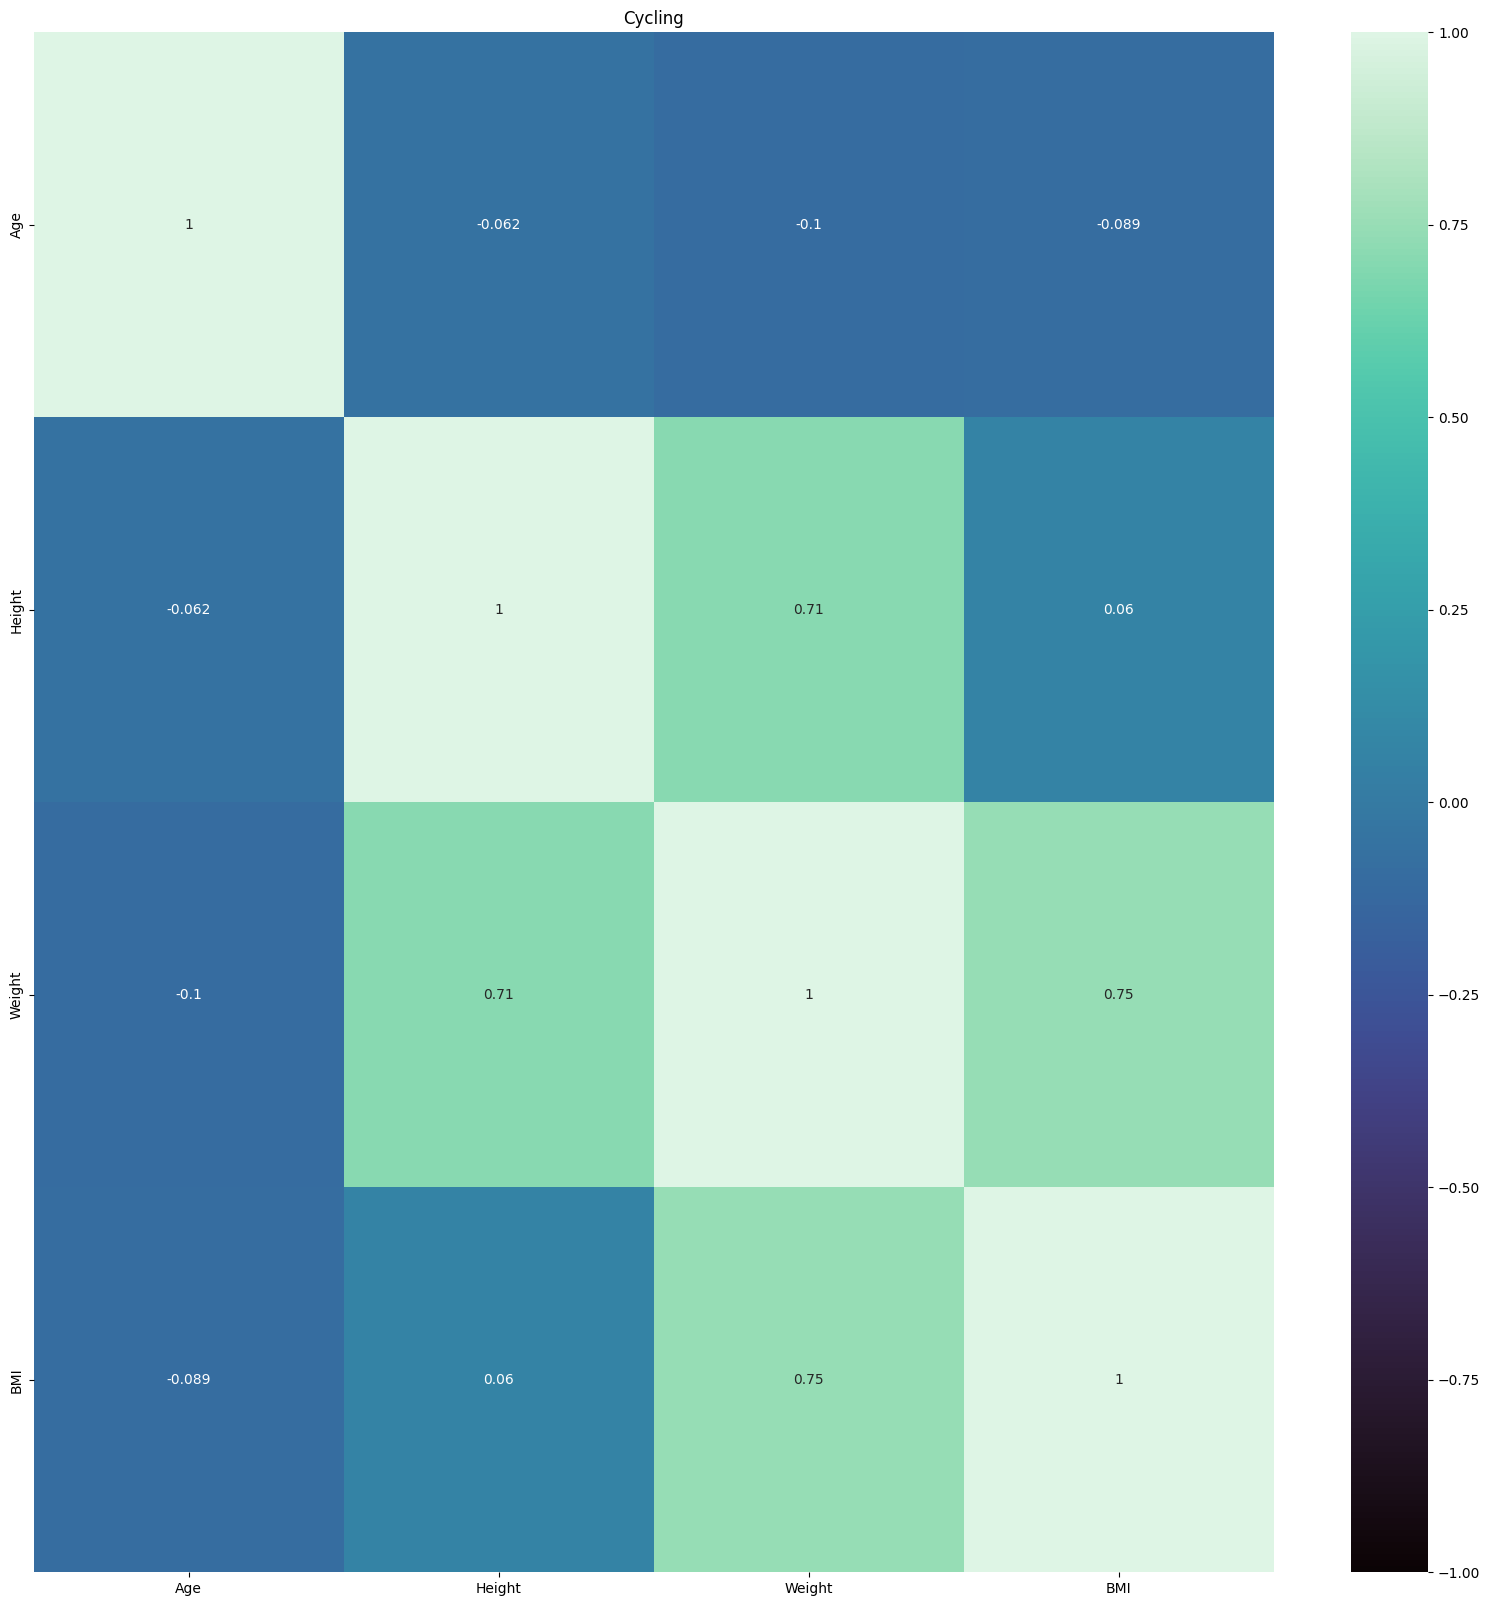

Diving


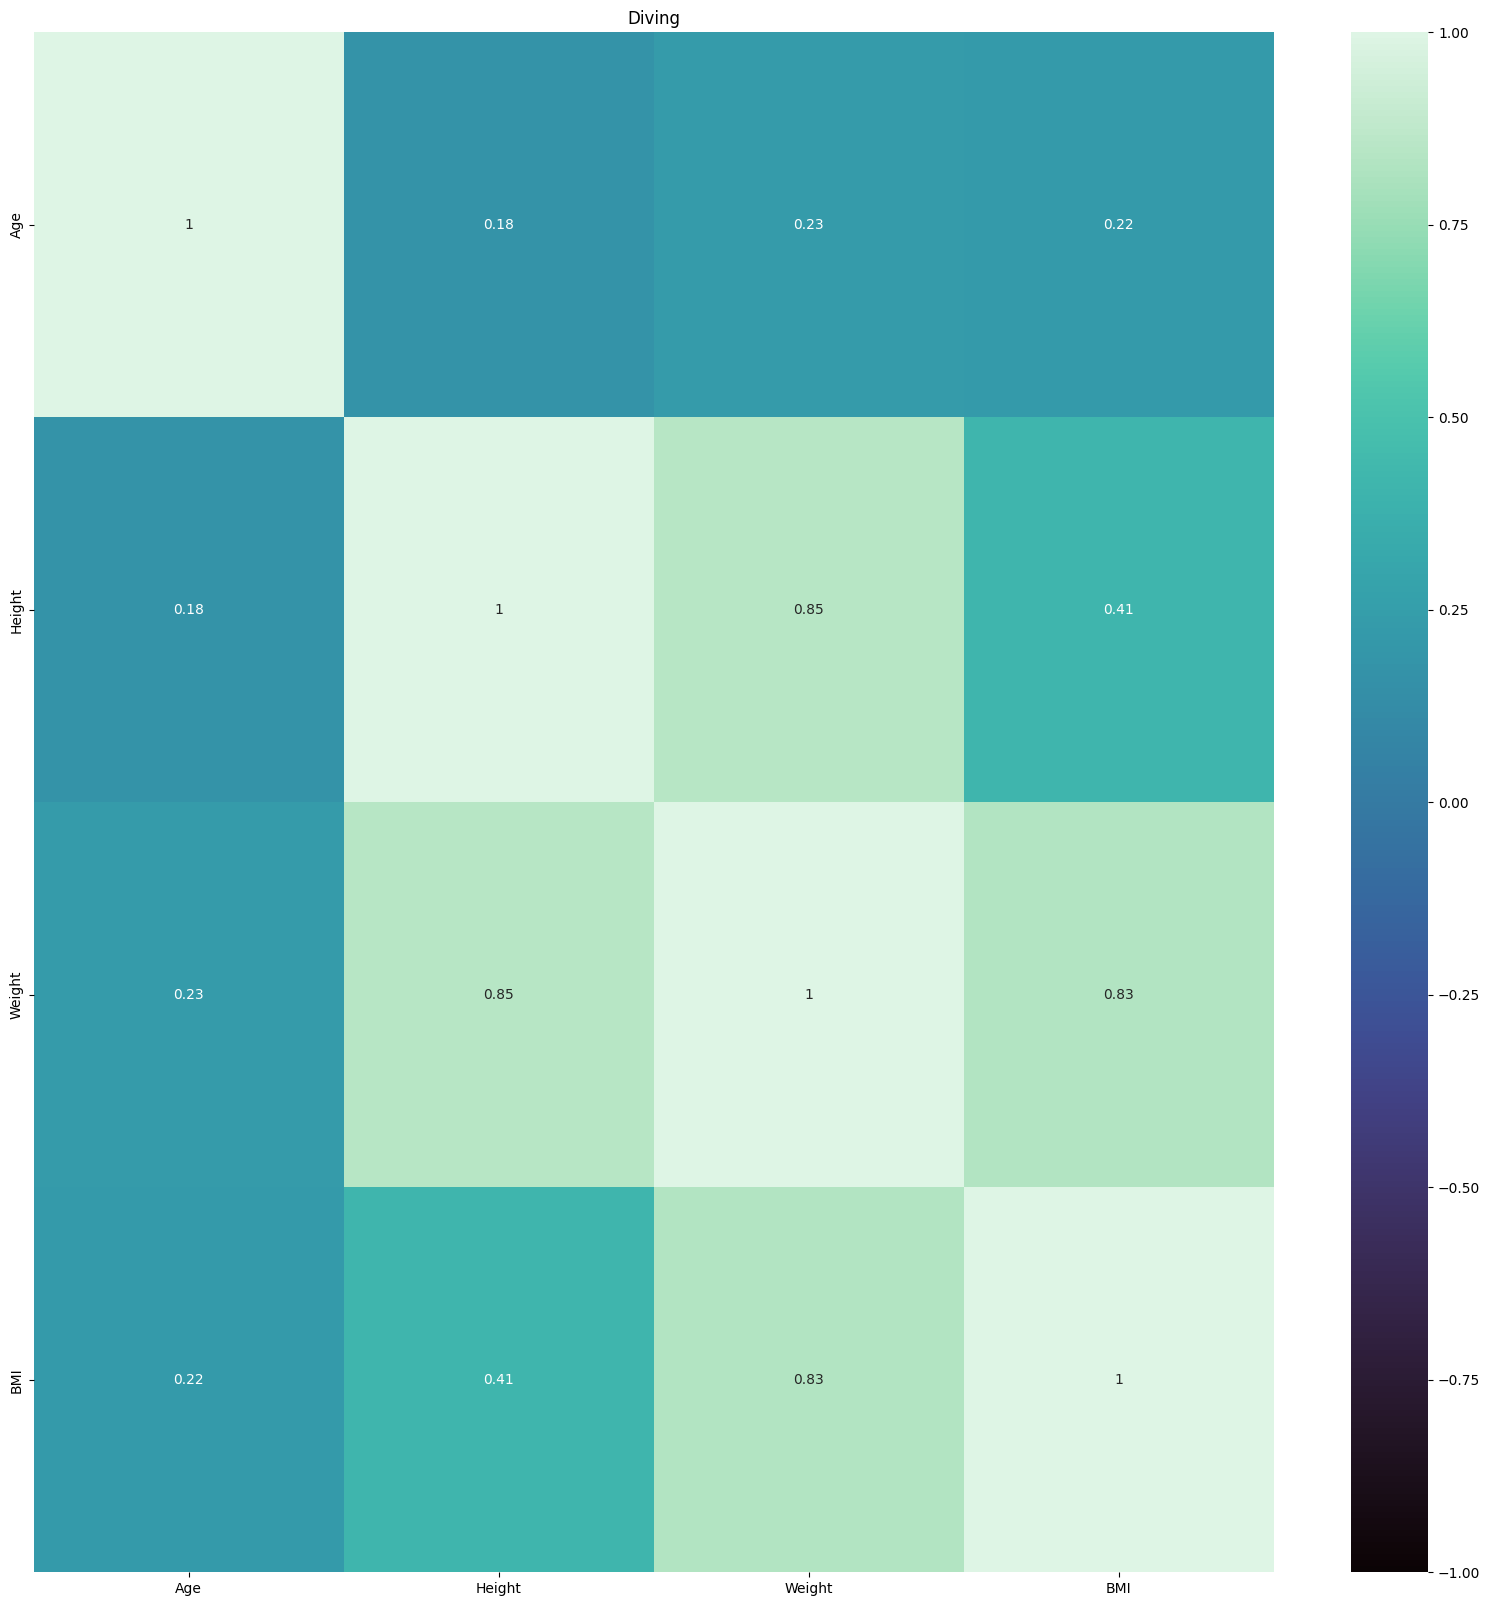

Equestrianism


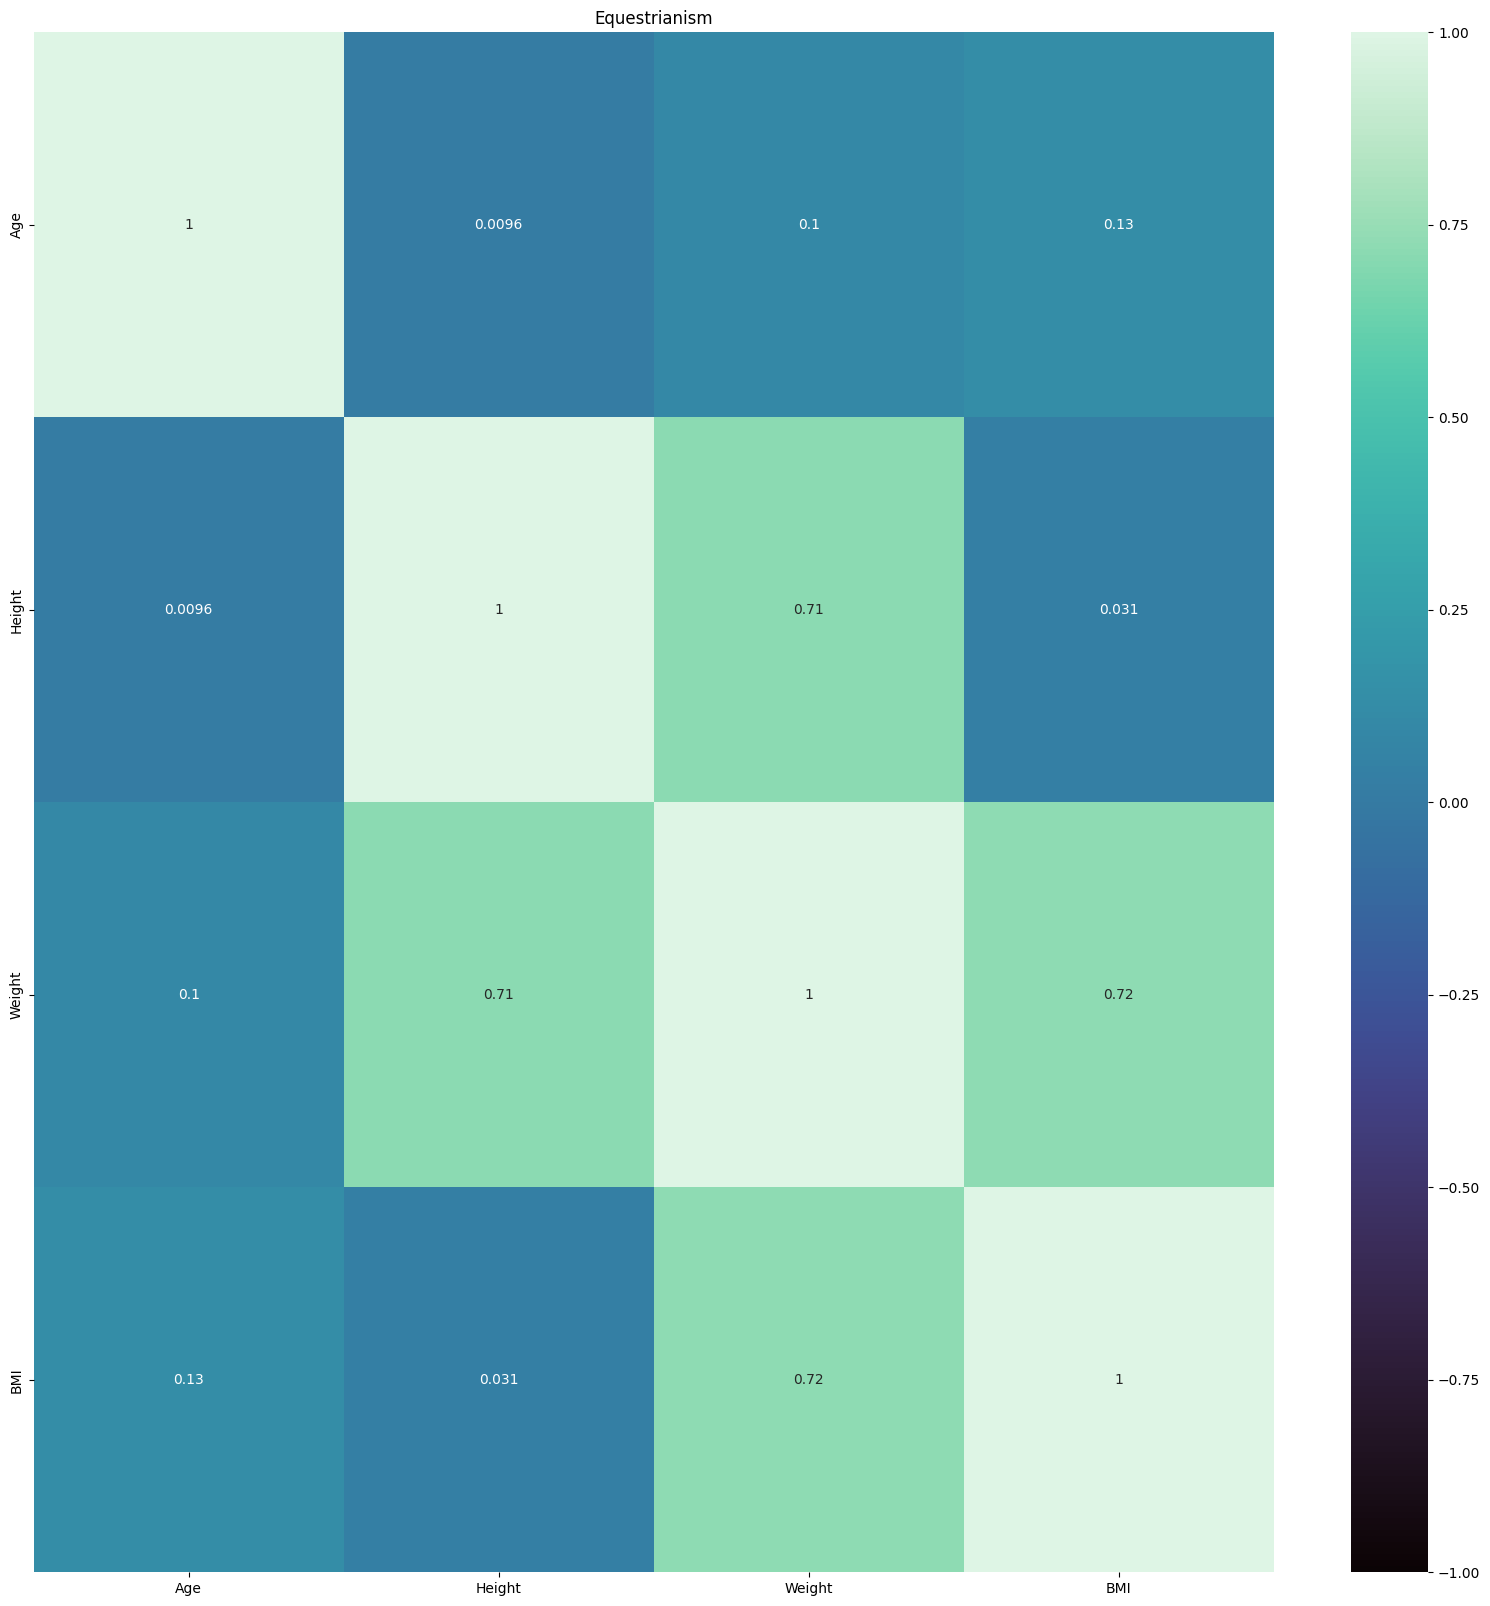

Fencing


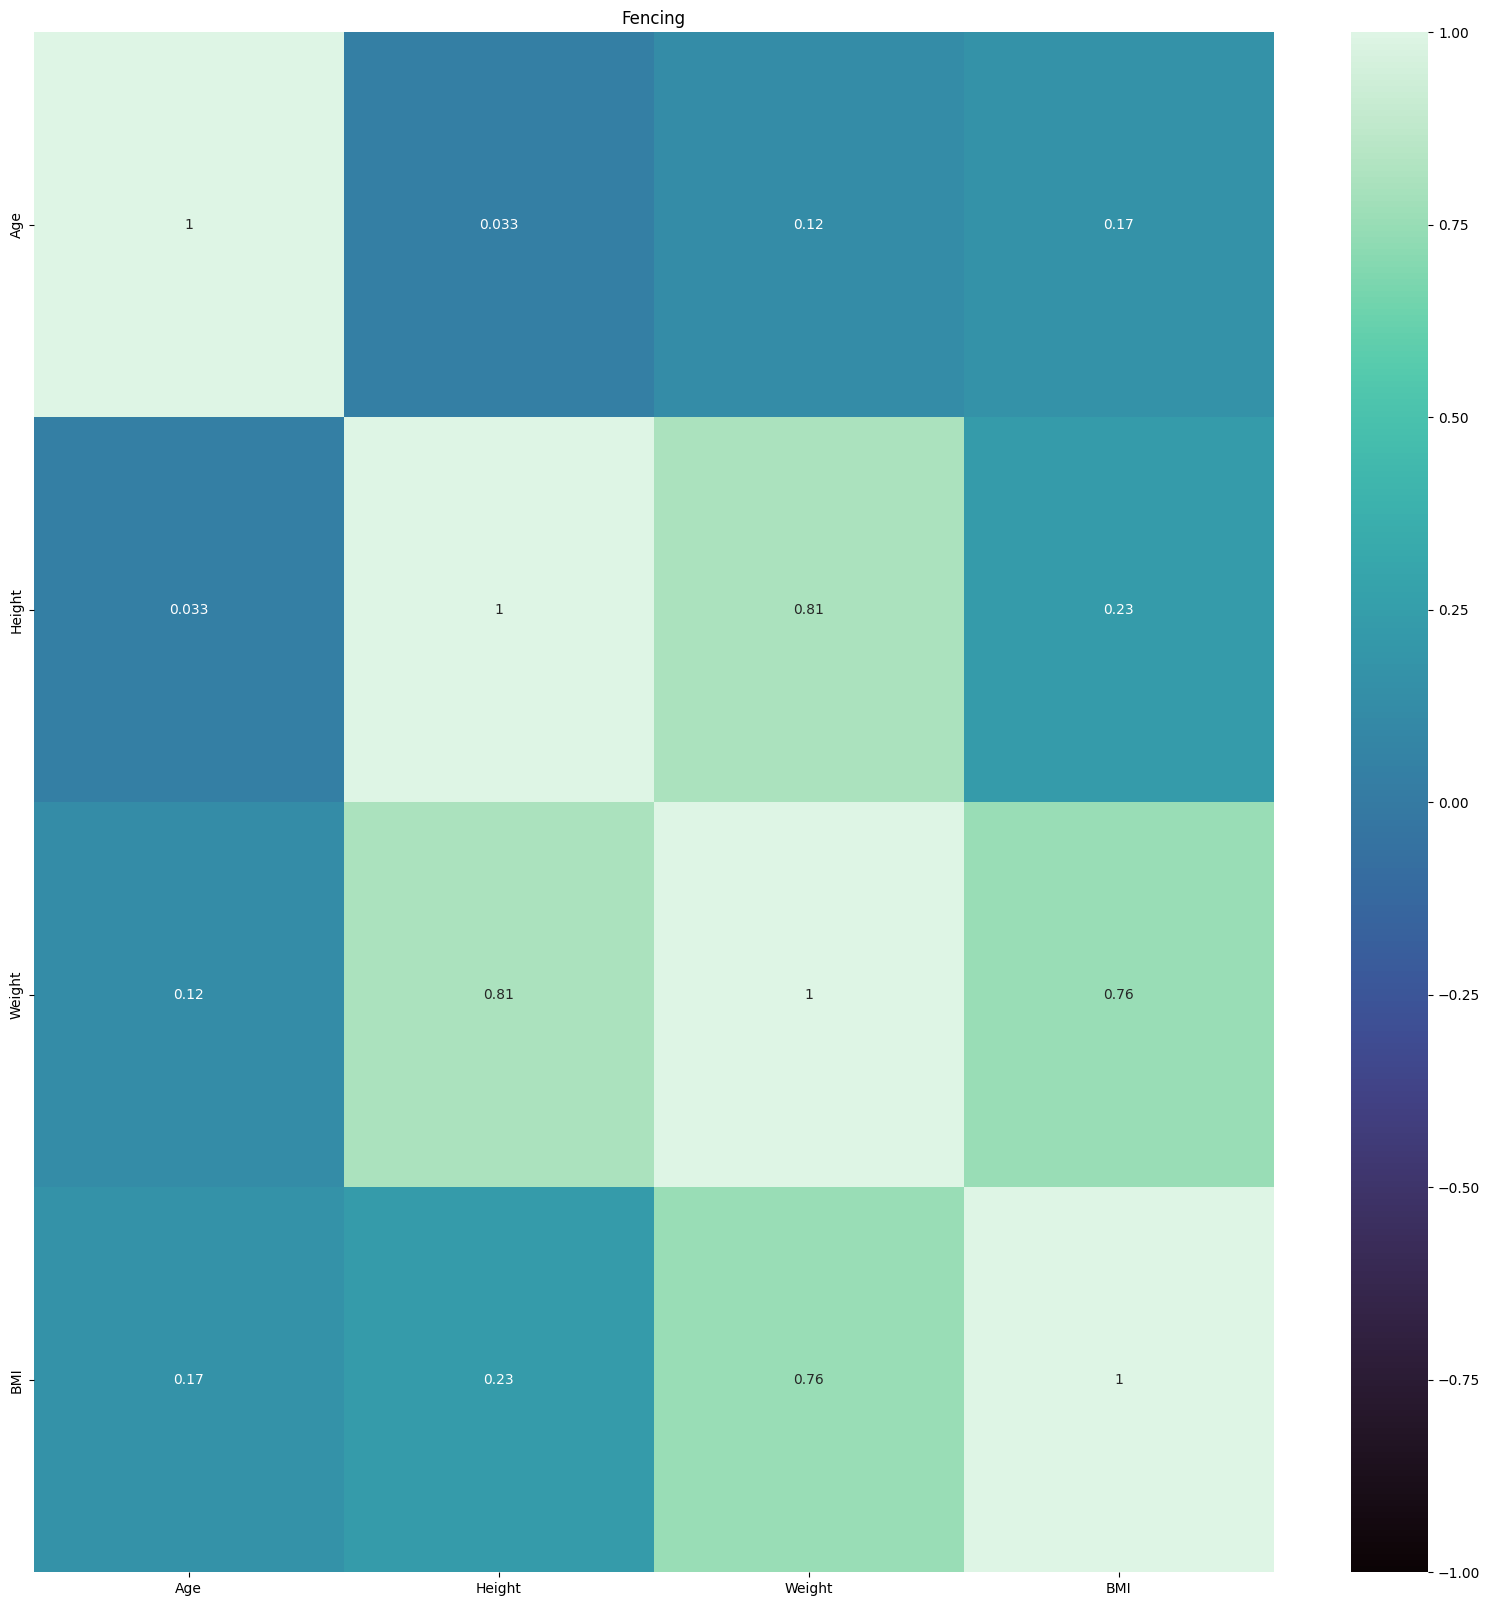

Football


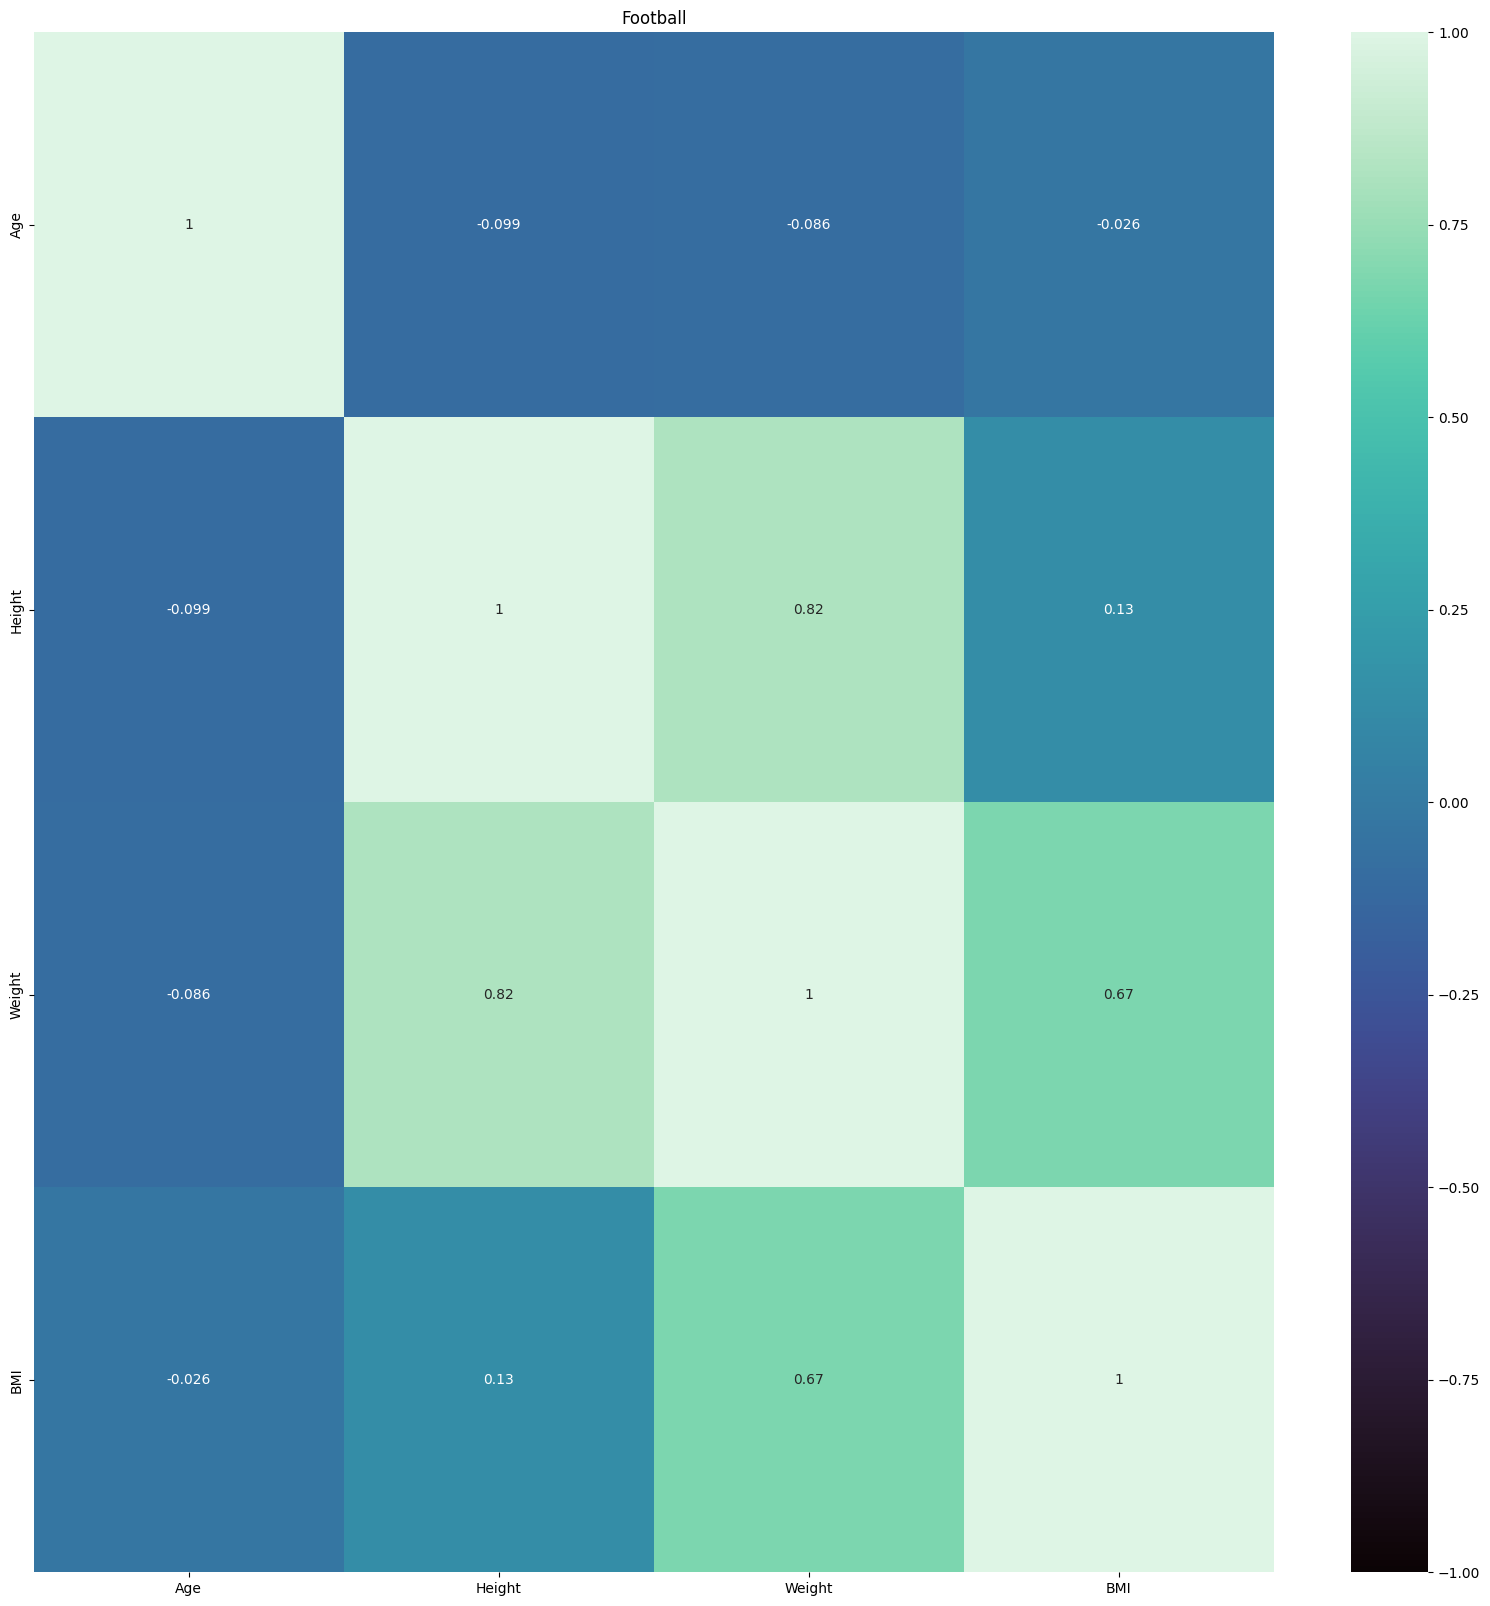

Golf


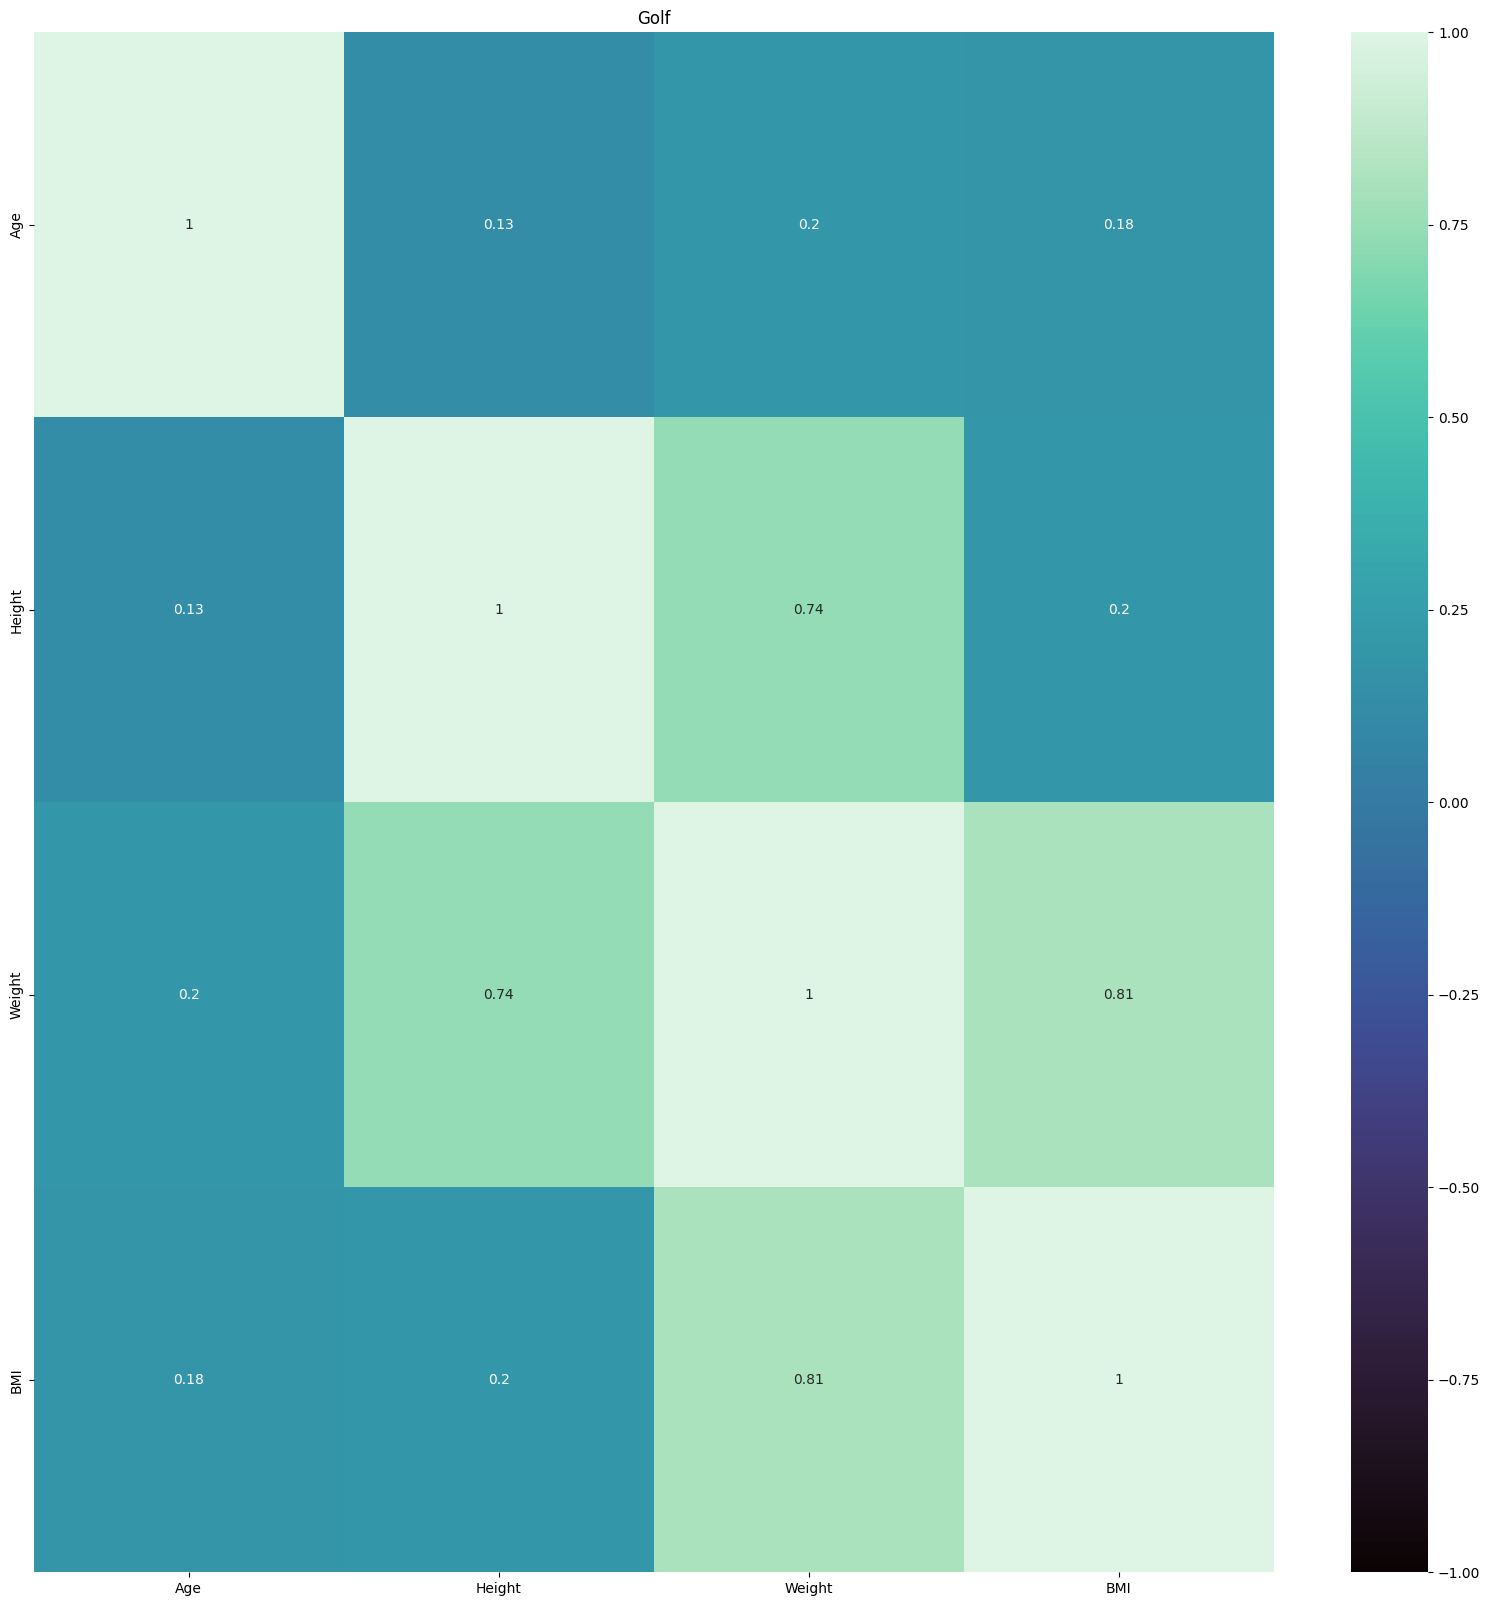

Gymnastics


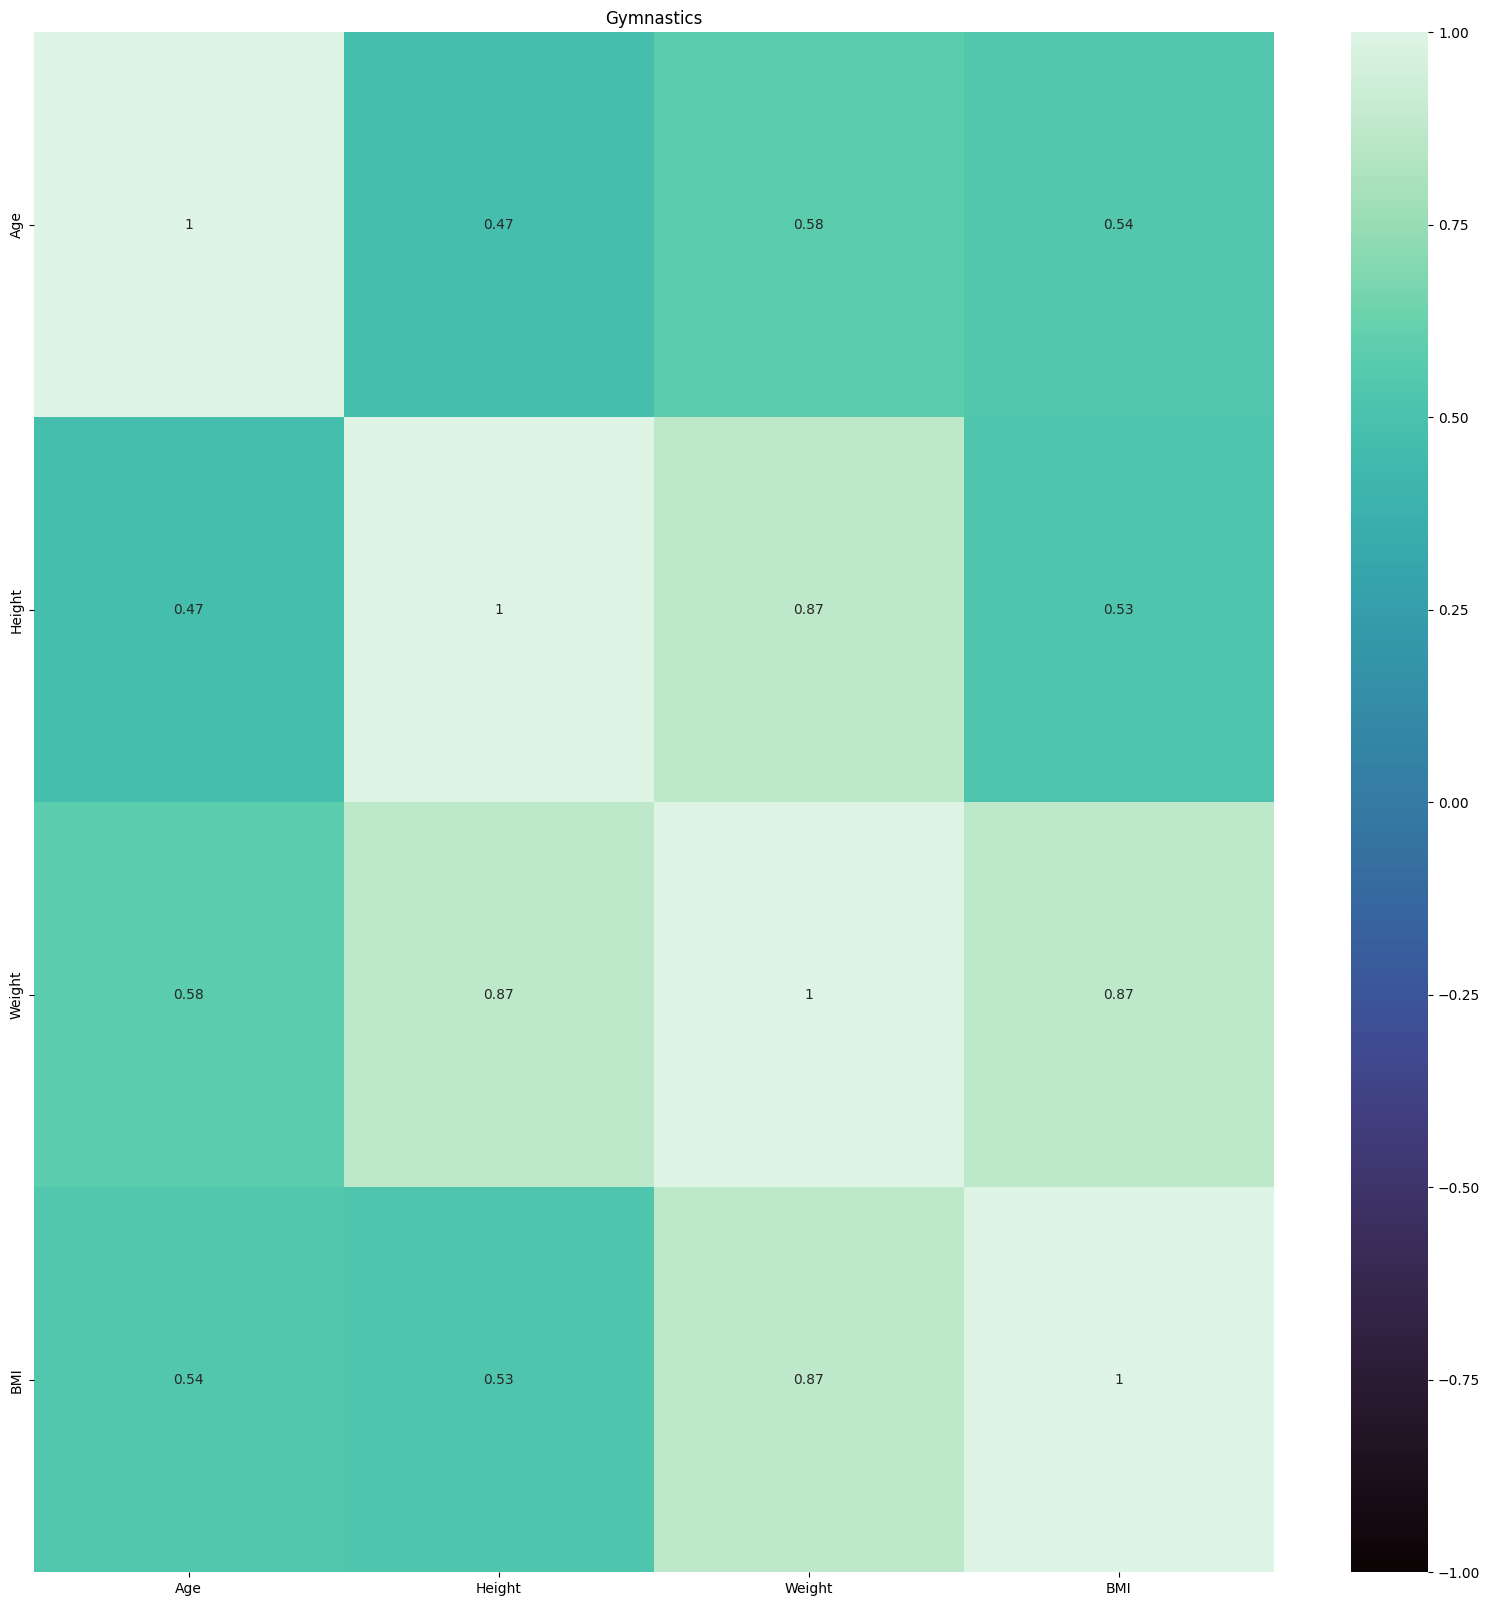

Handball


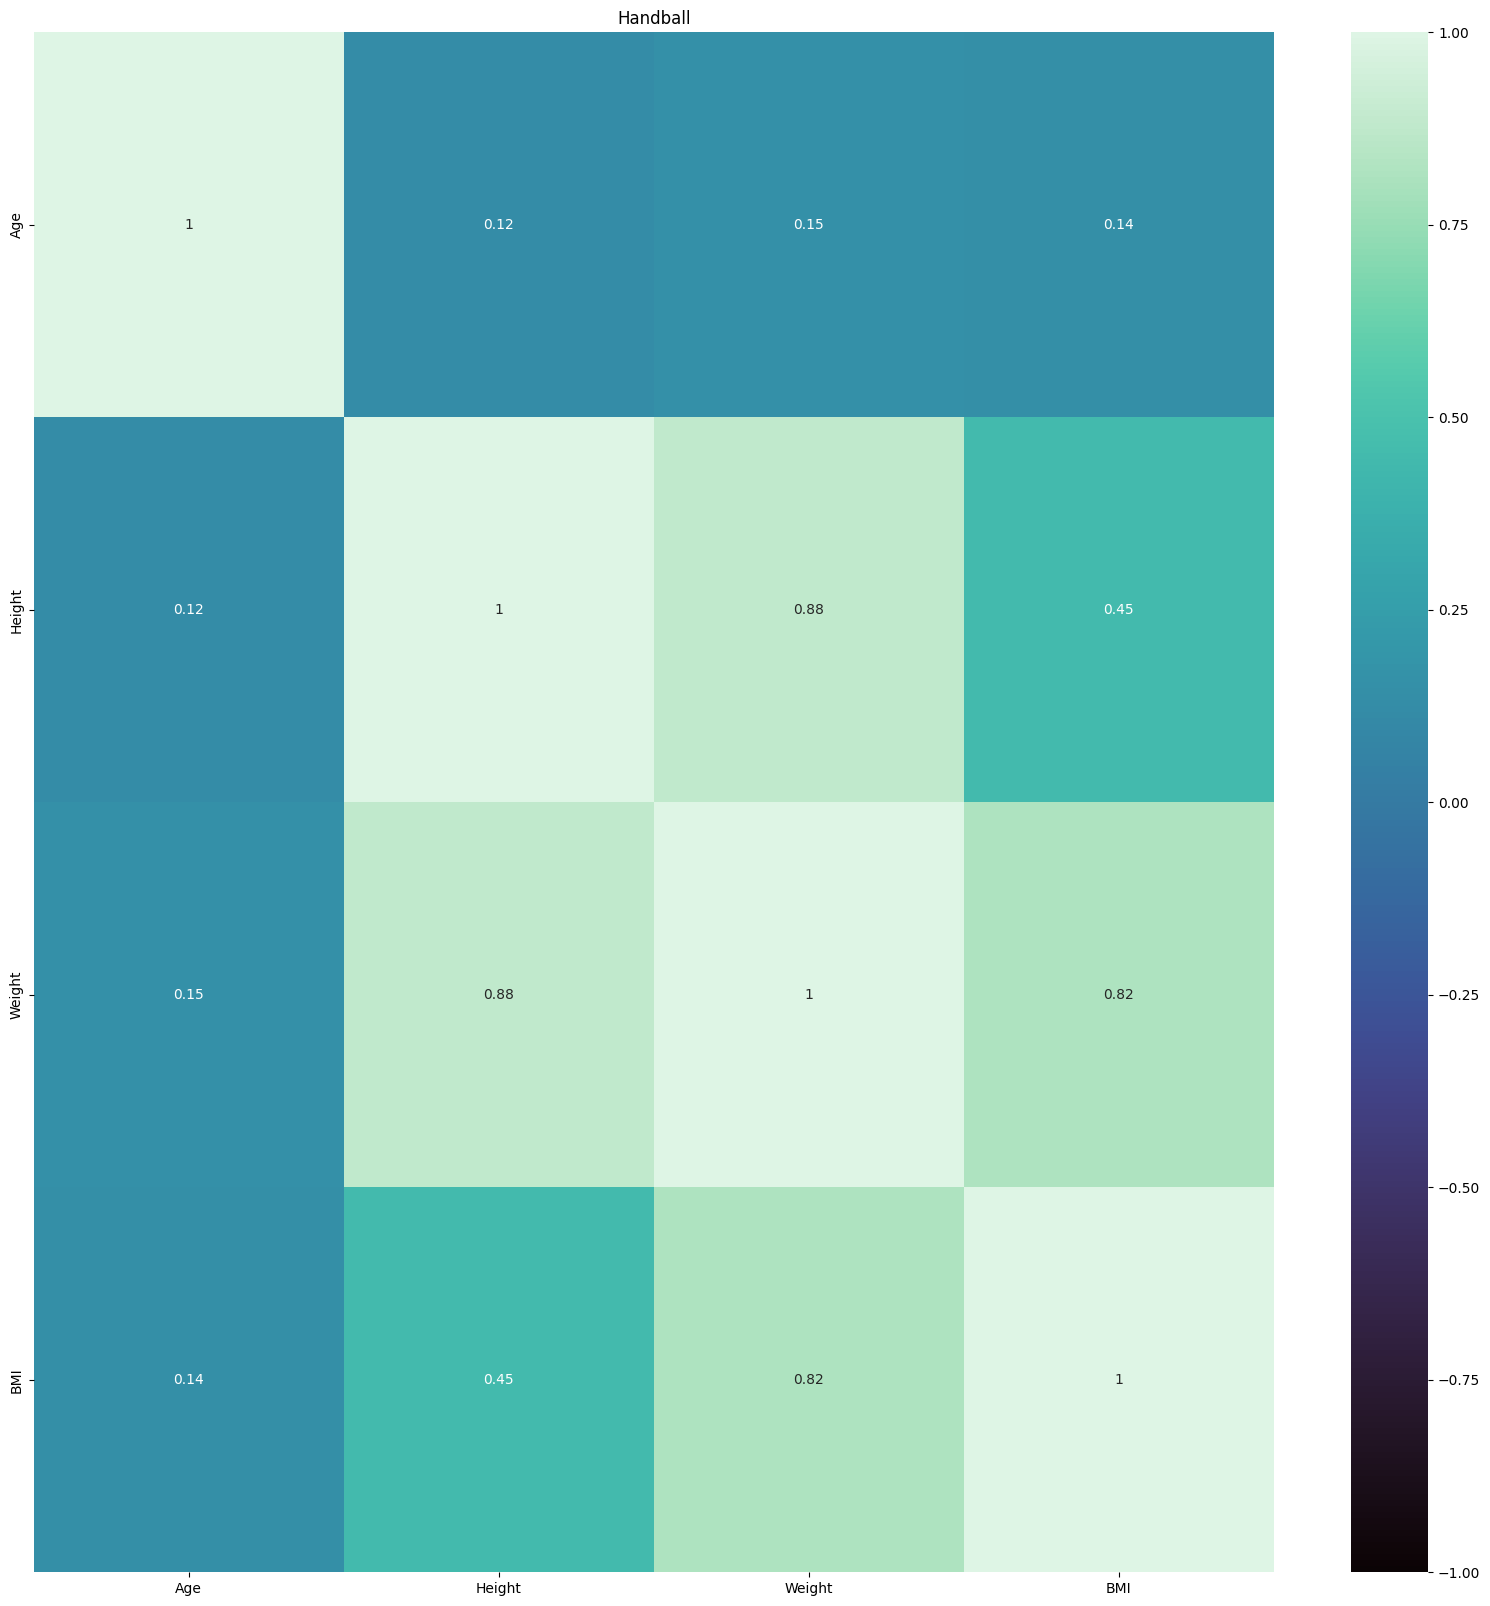

Hockey


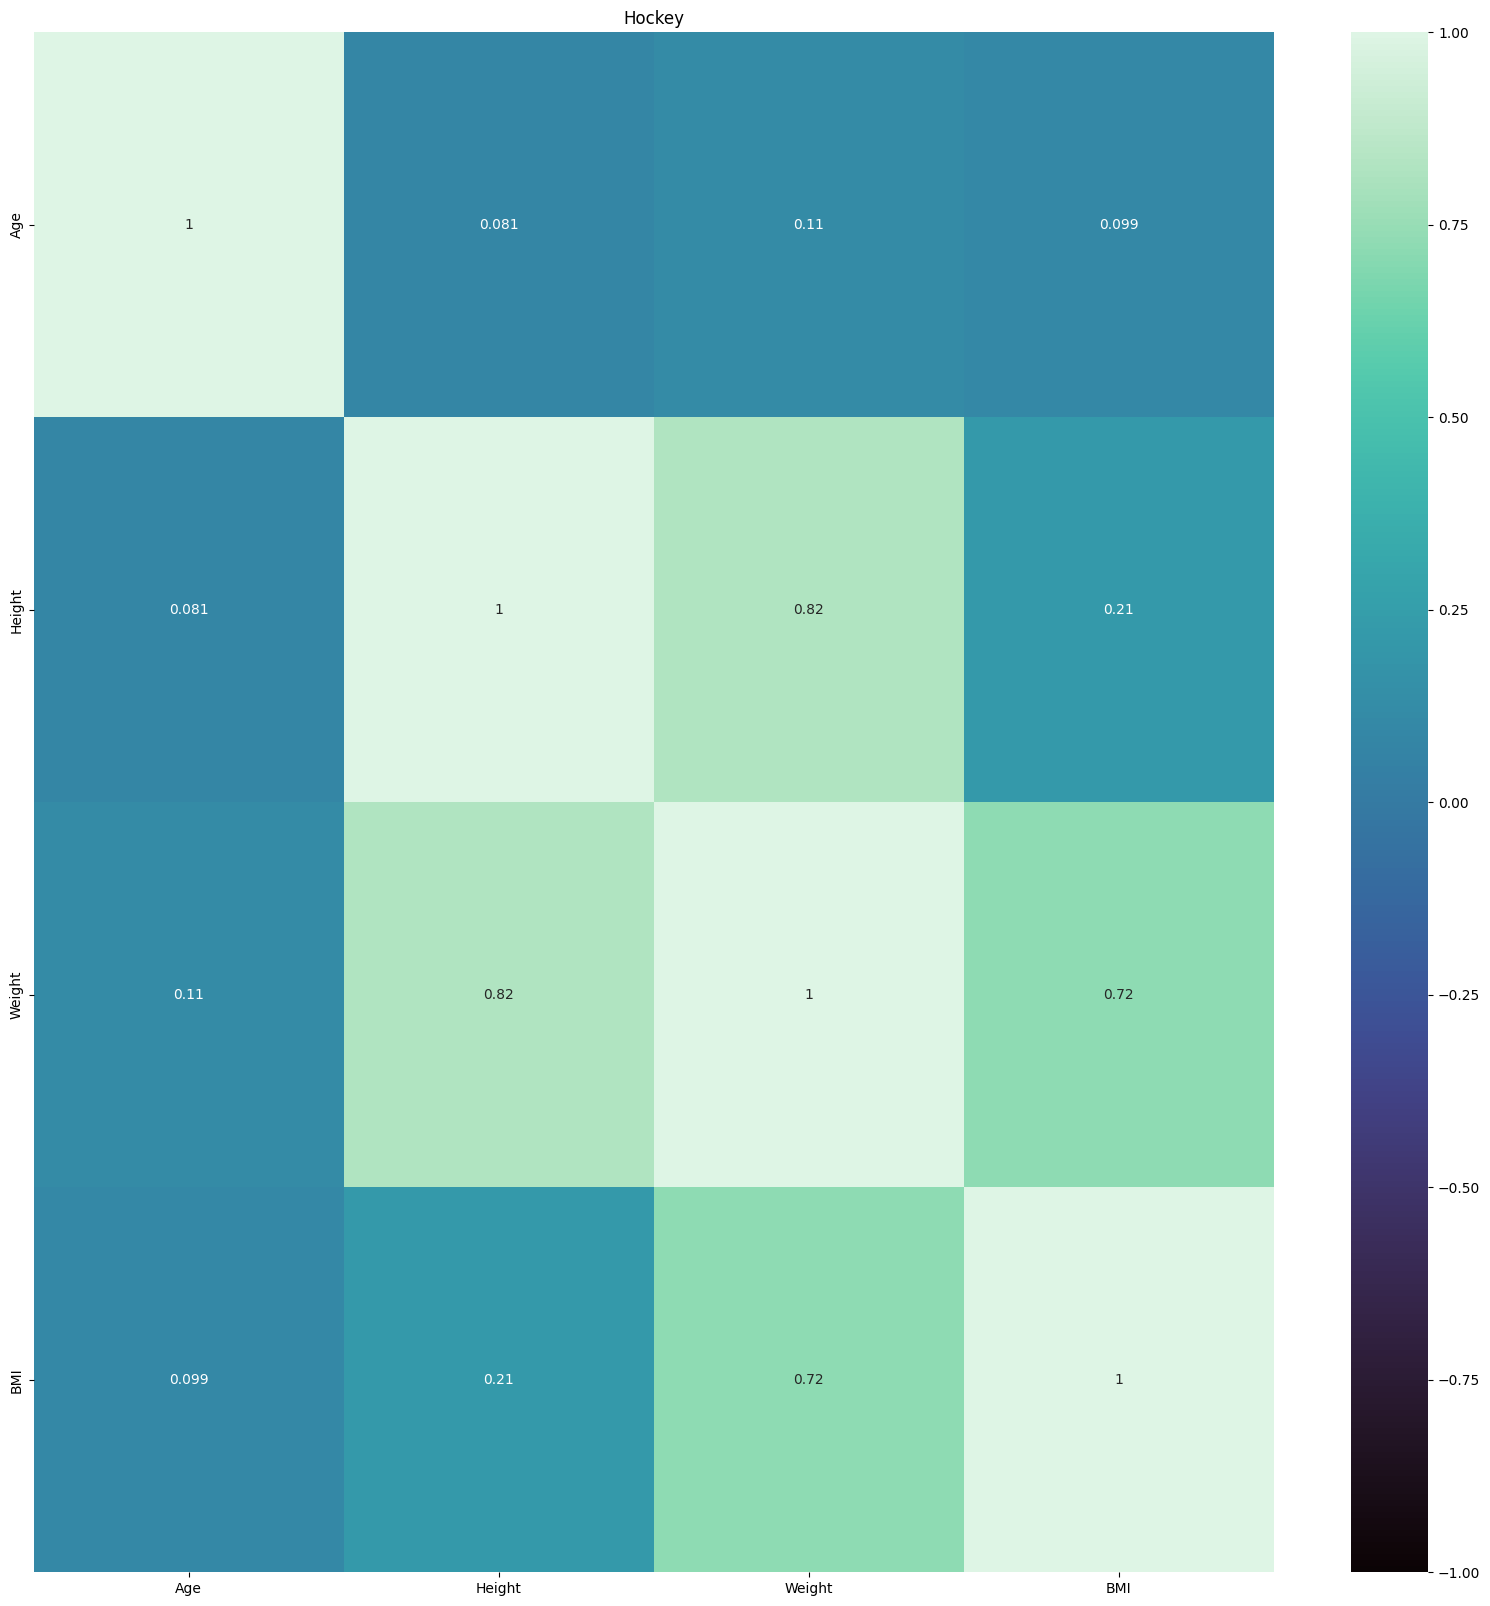

Judo


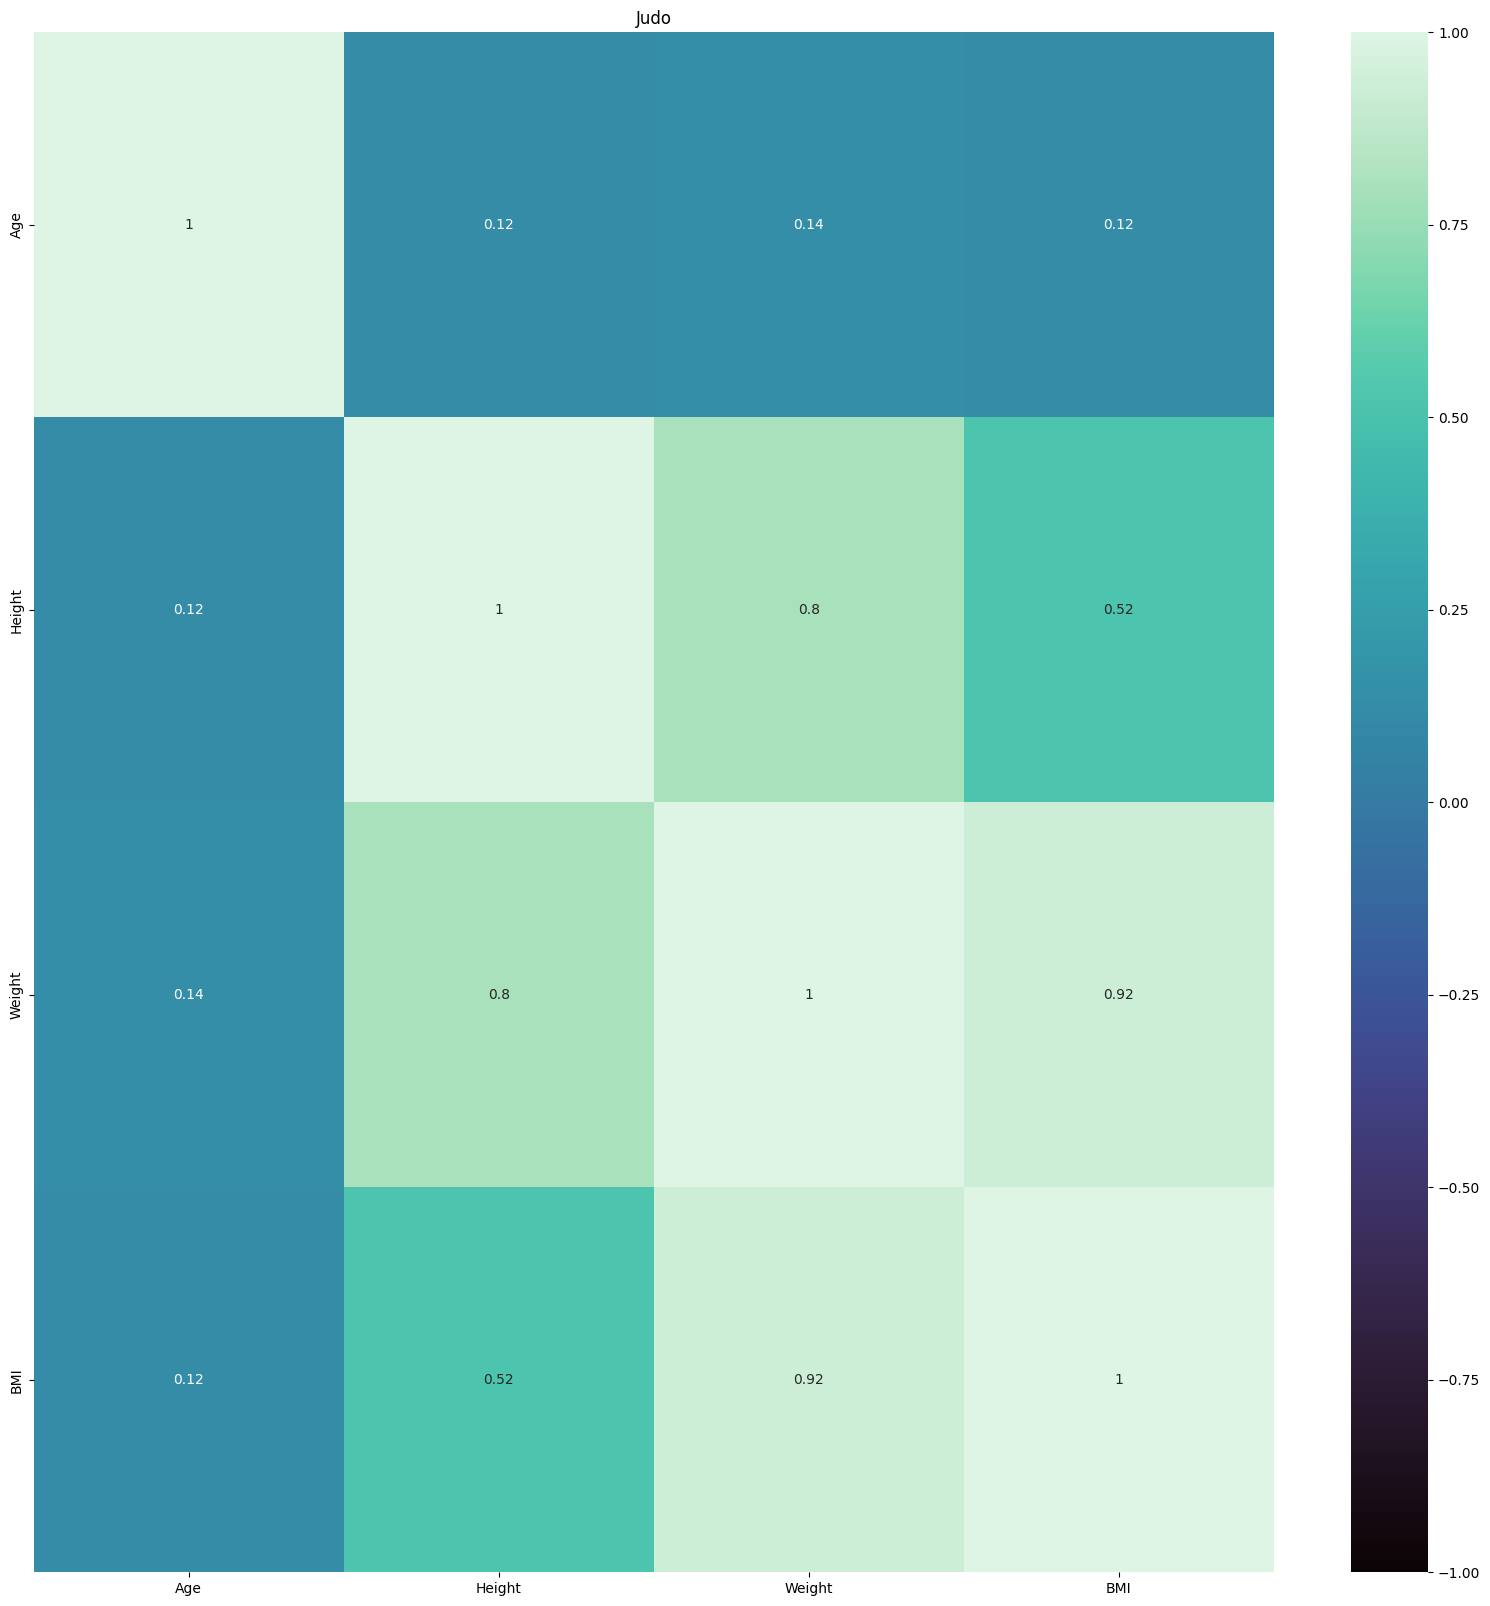

Modern Pentathlon


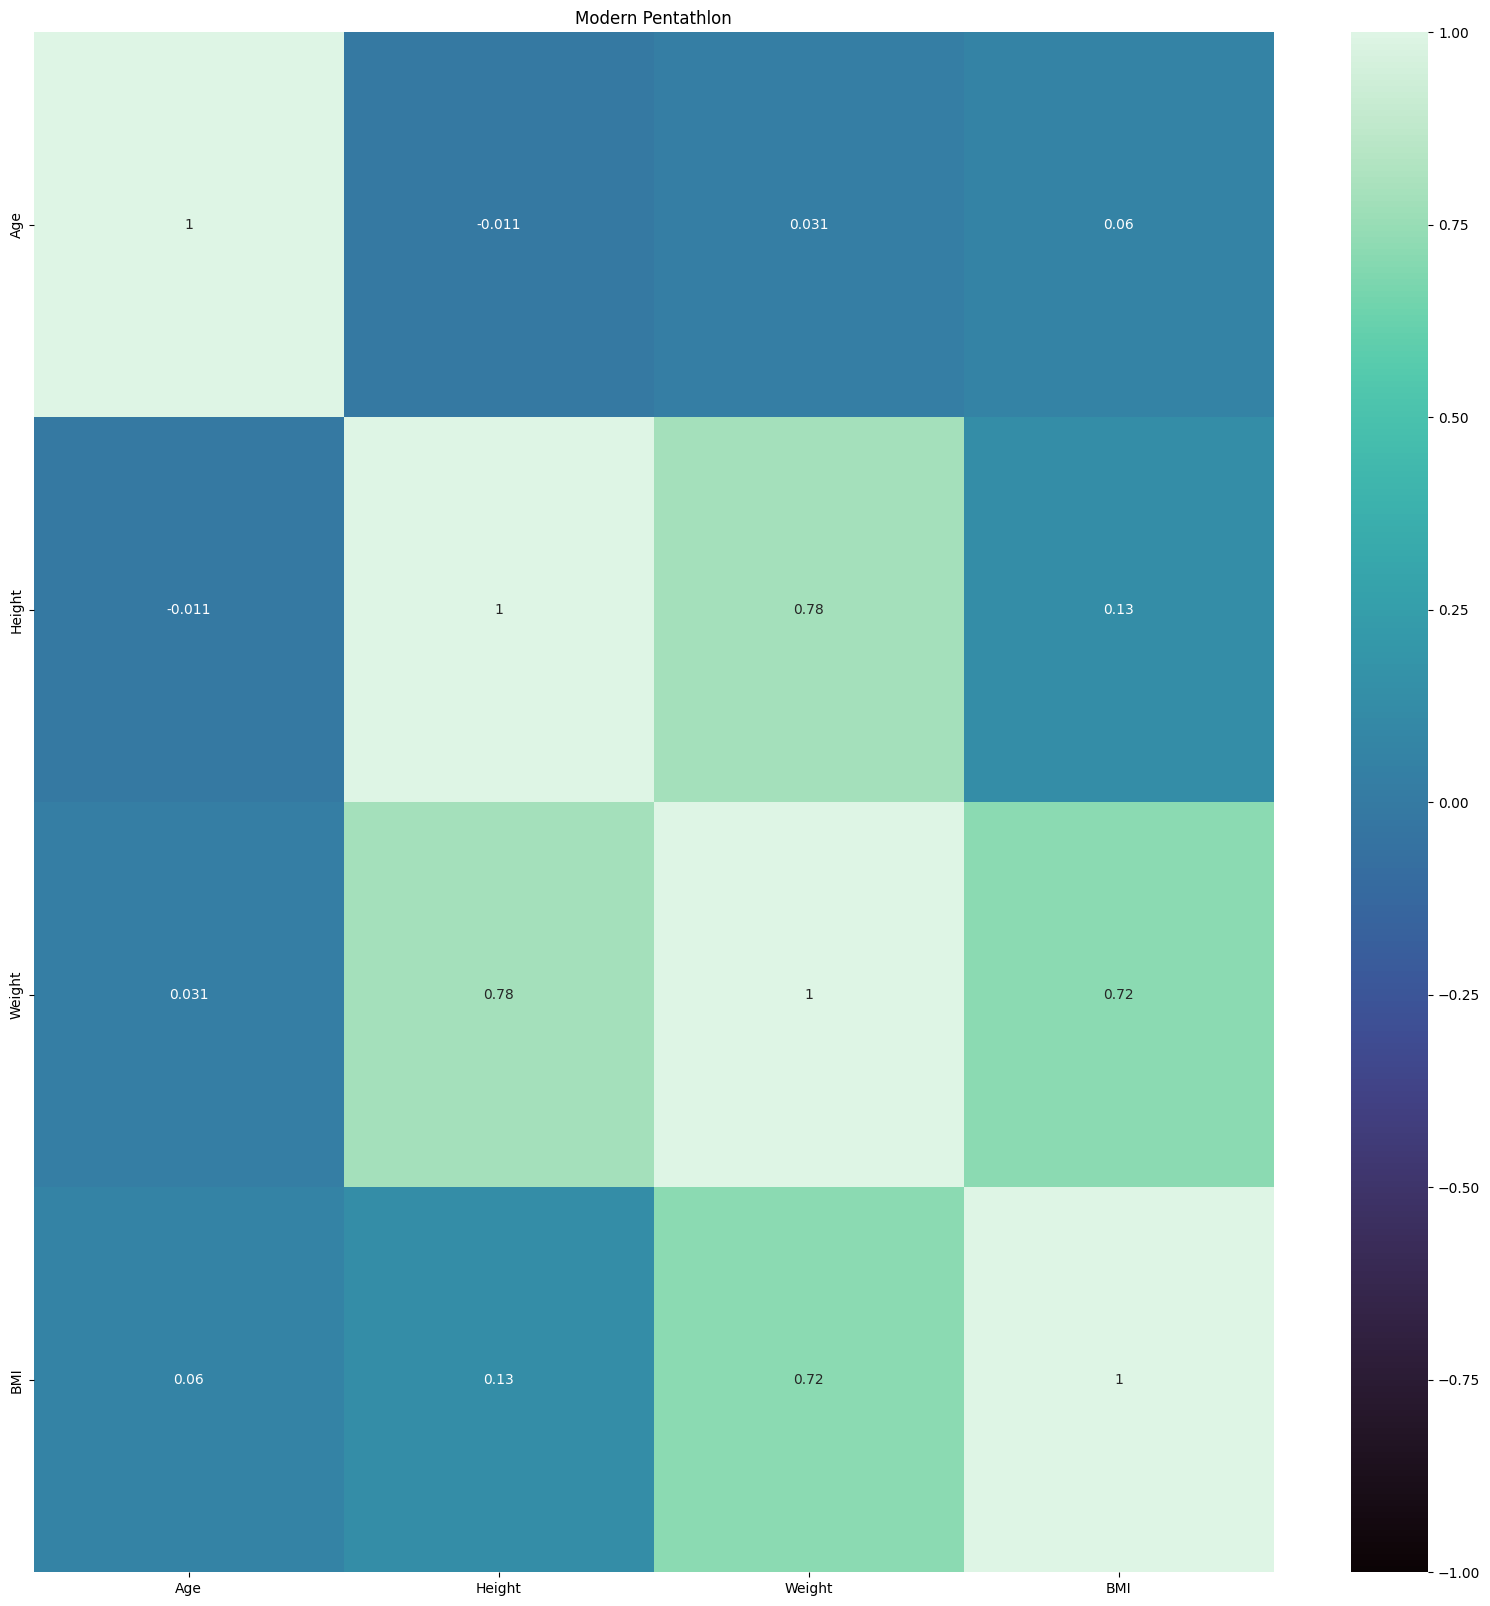

Rhythmic Gymnastics


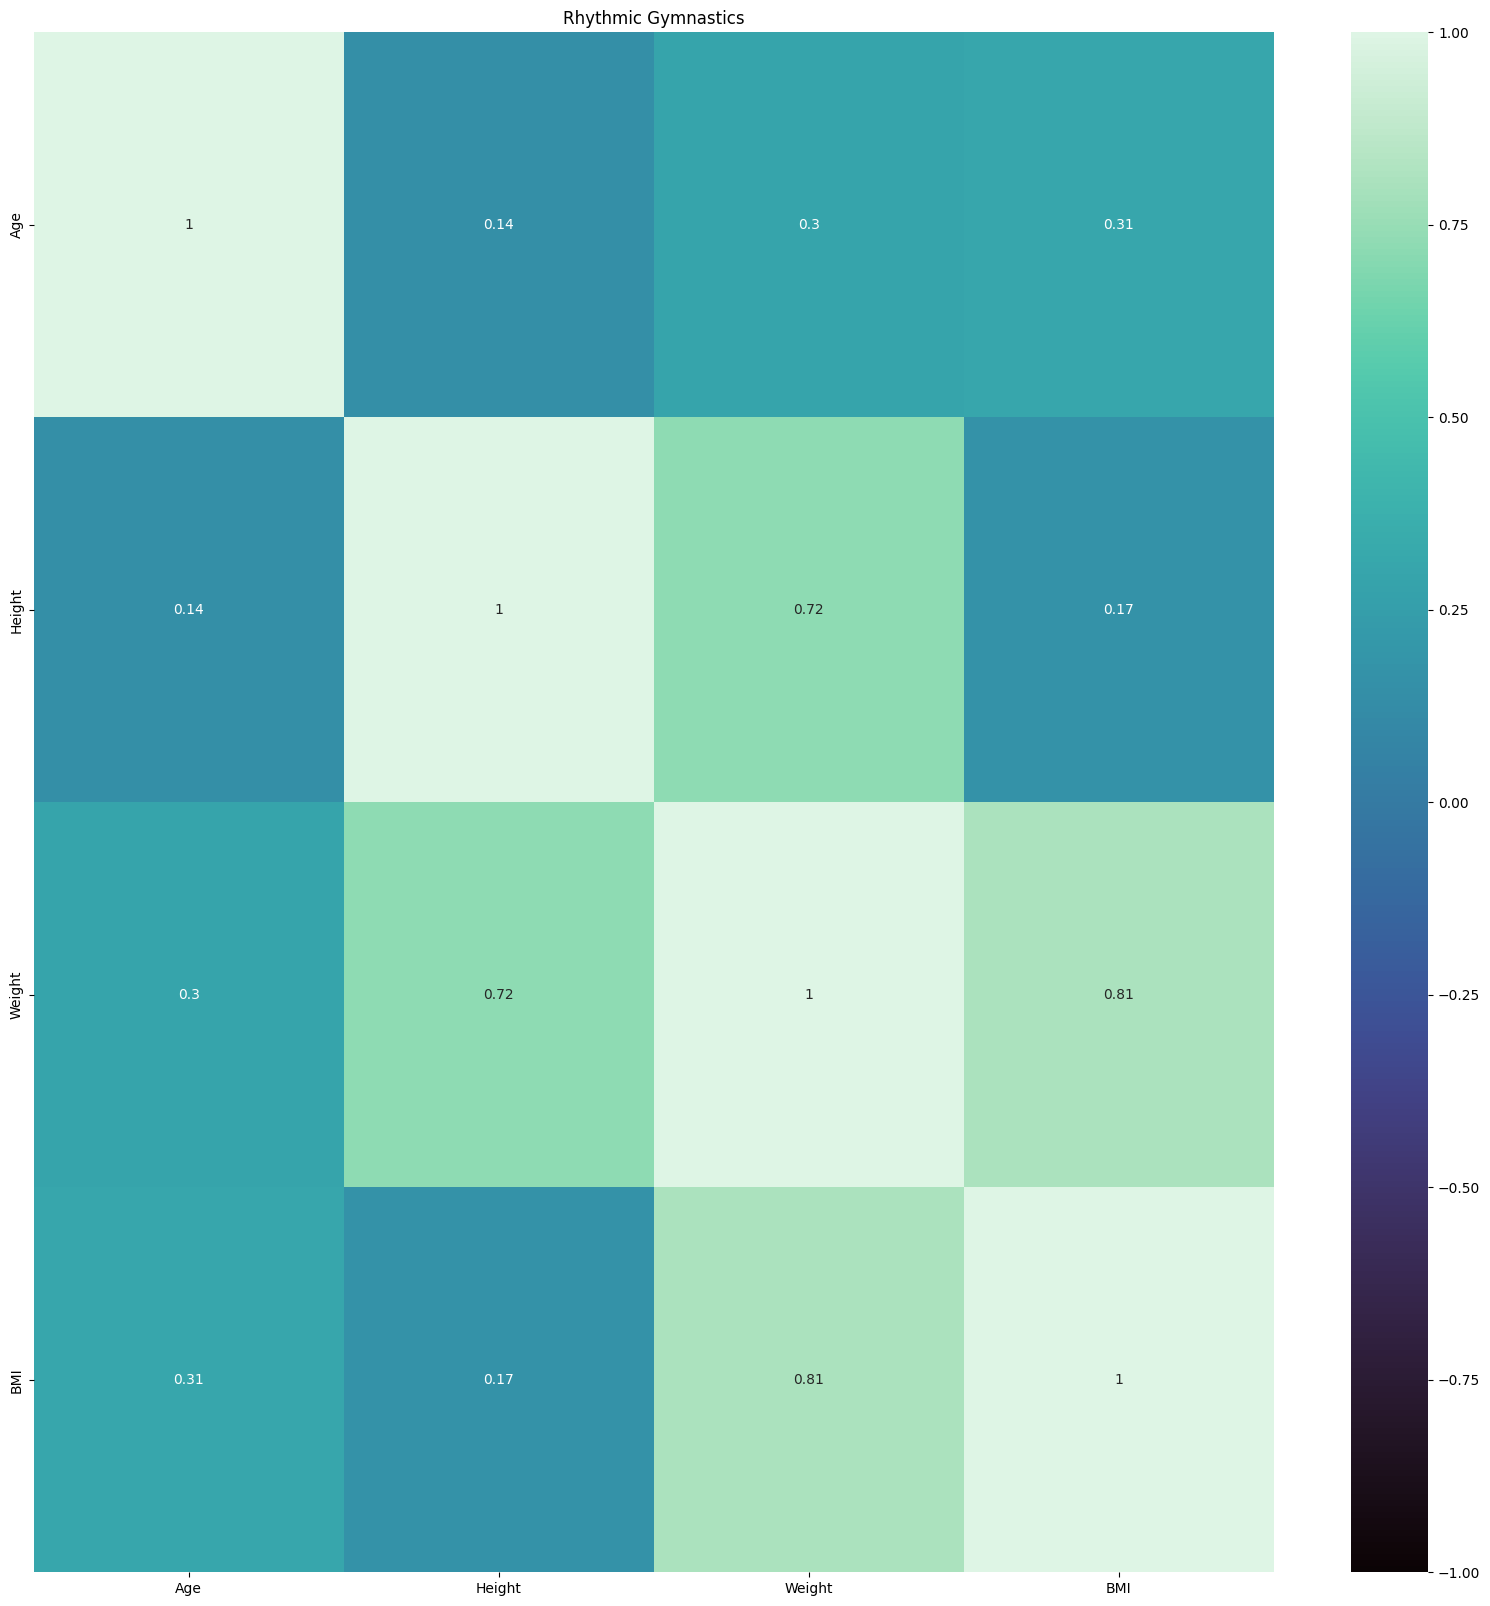

Rowing


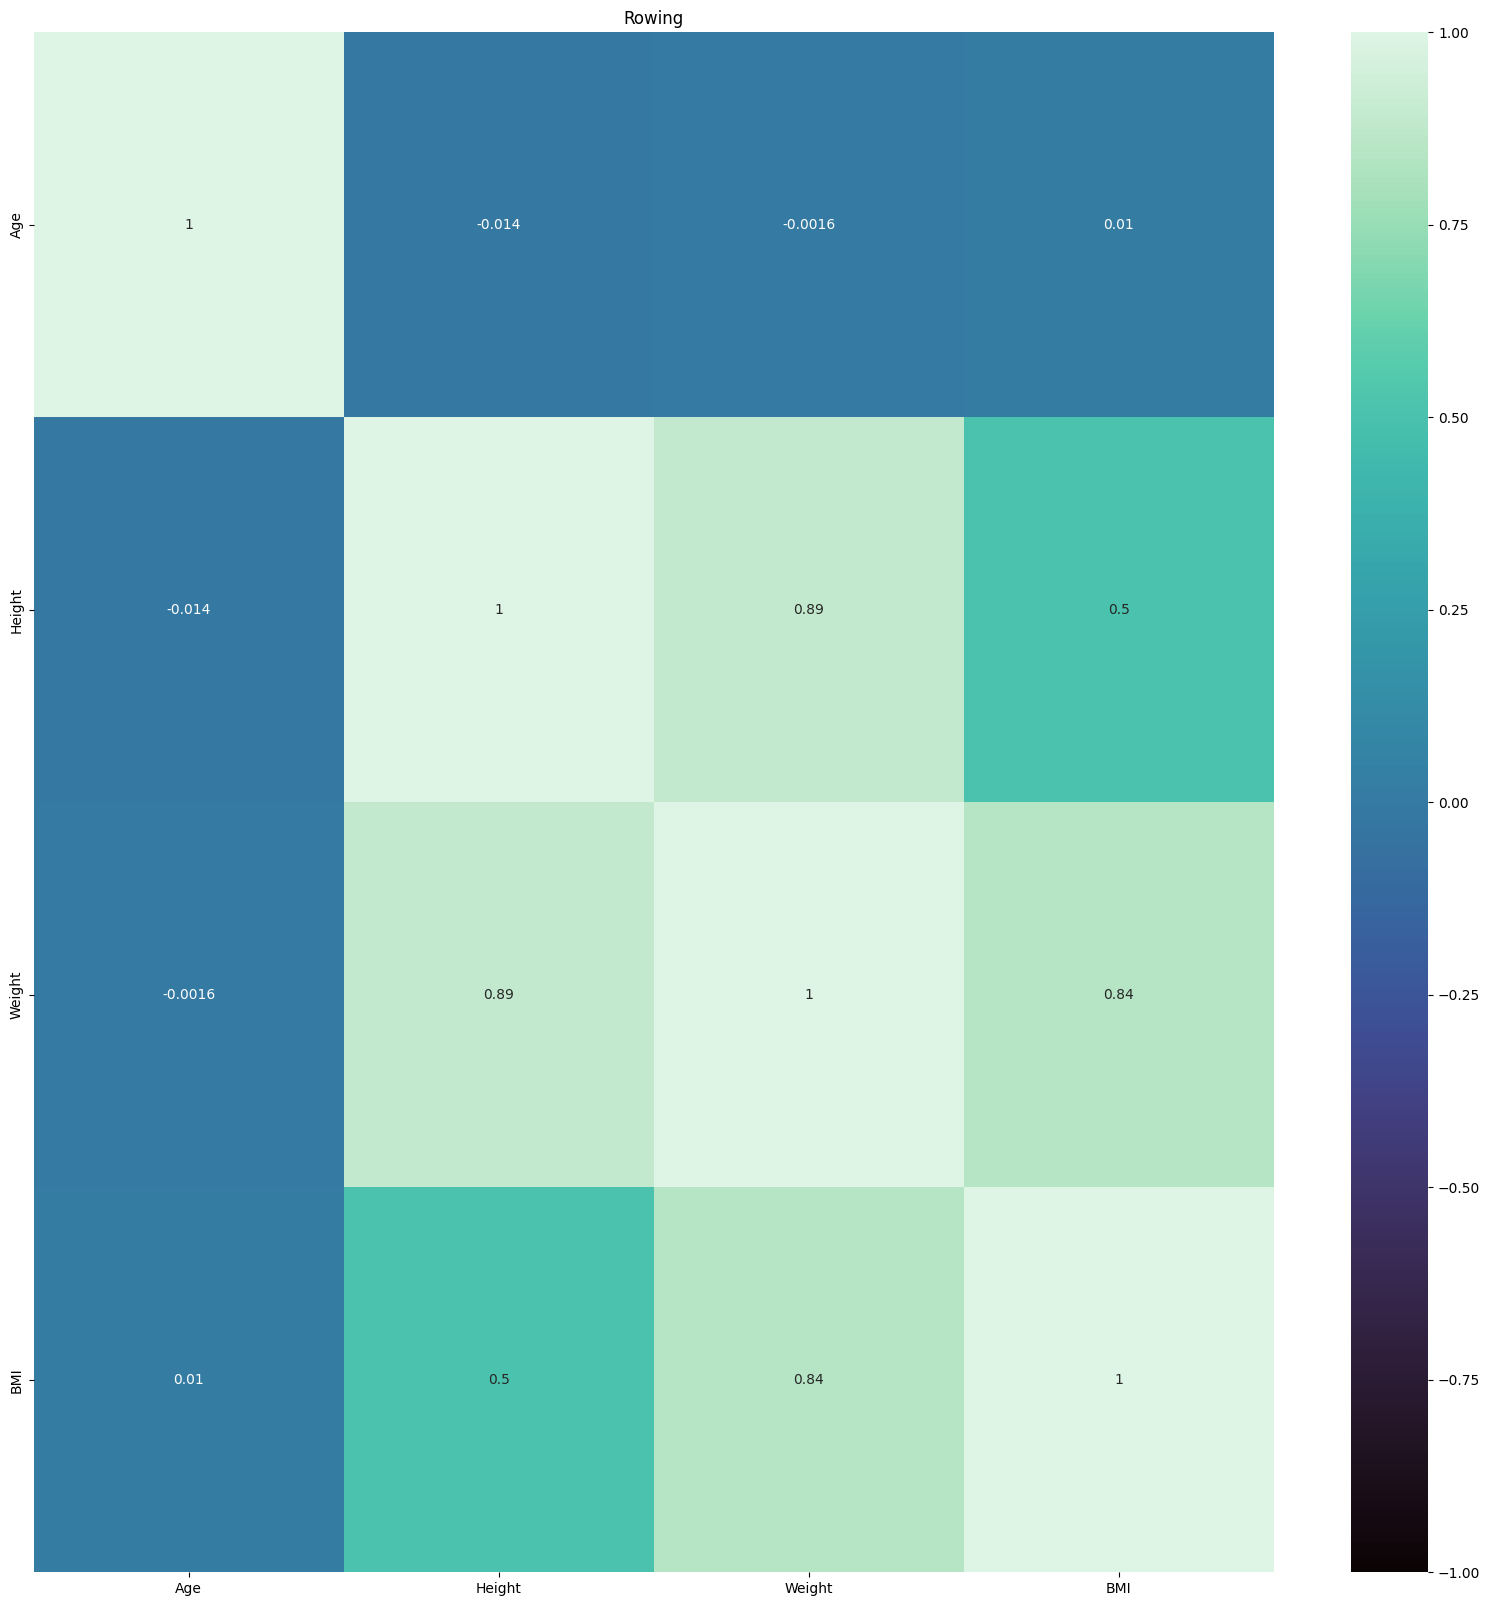

Rugby Sevens


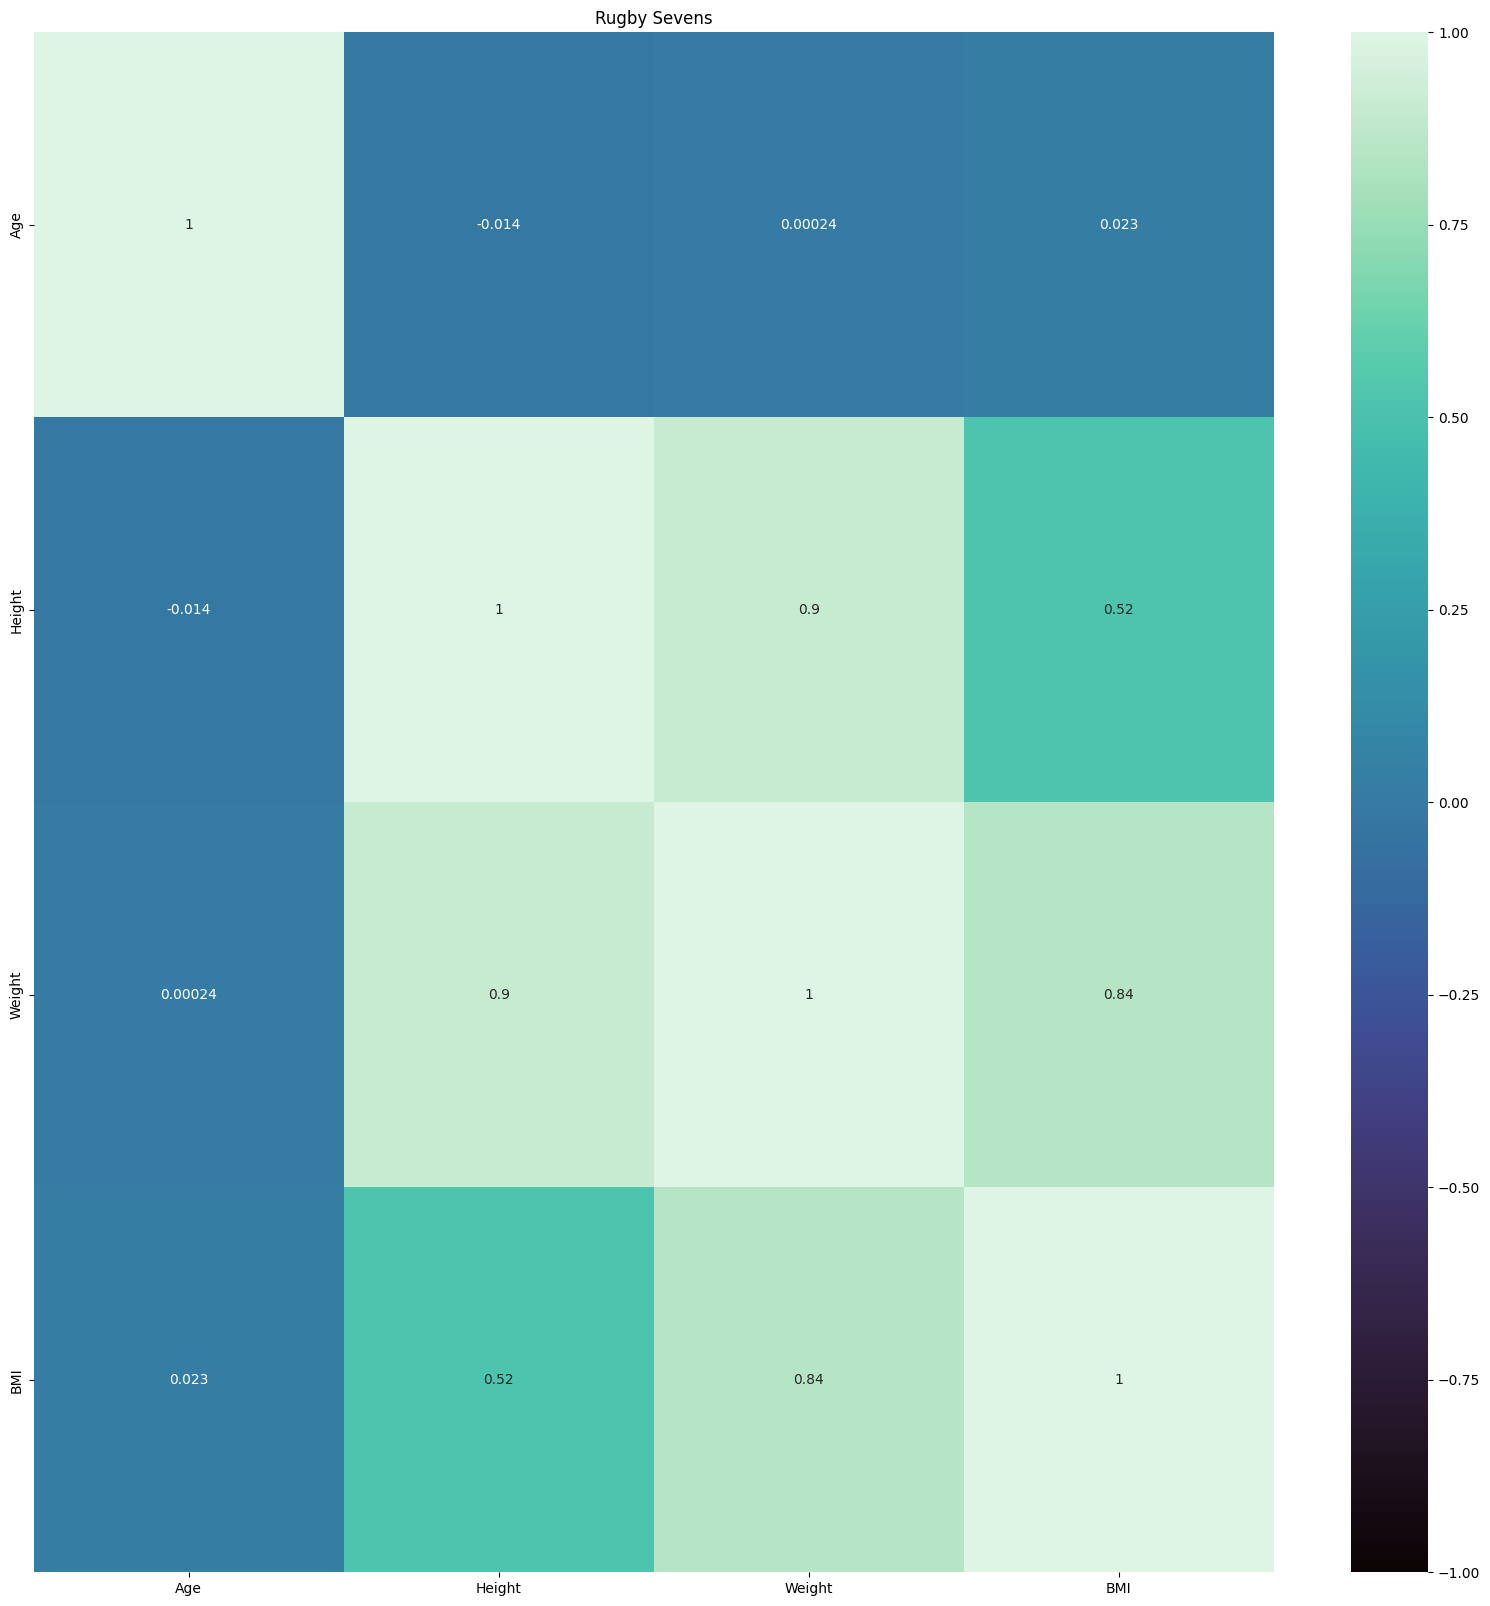

Sailing


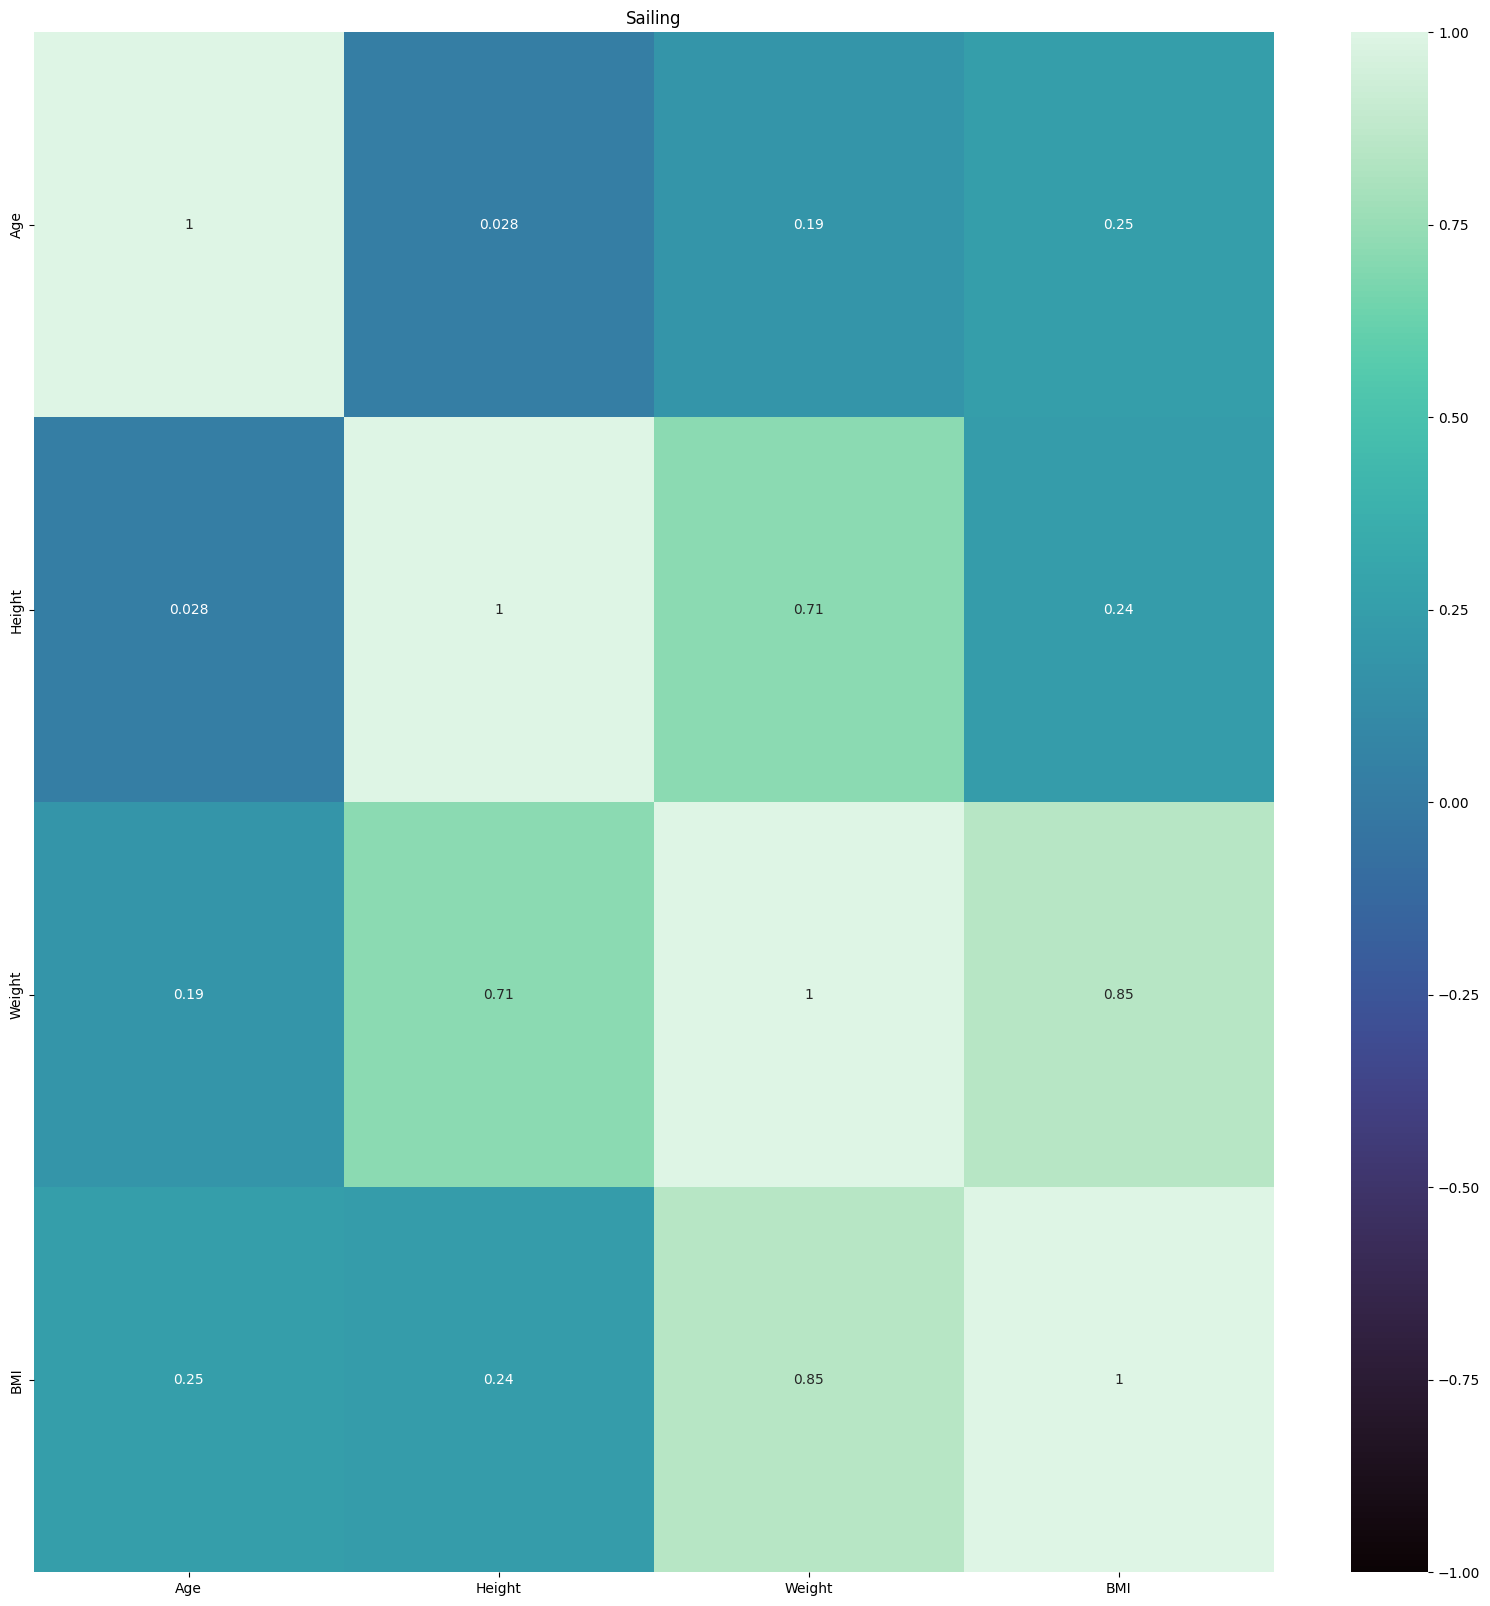

Shooting


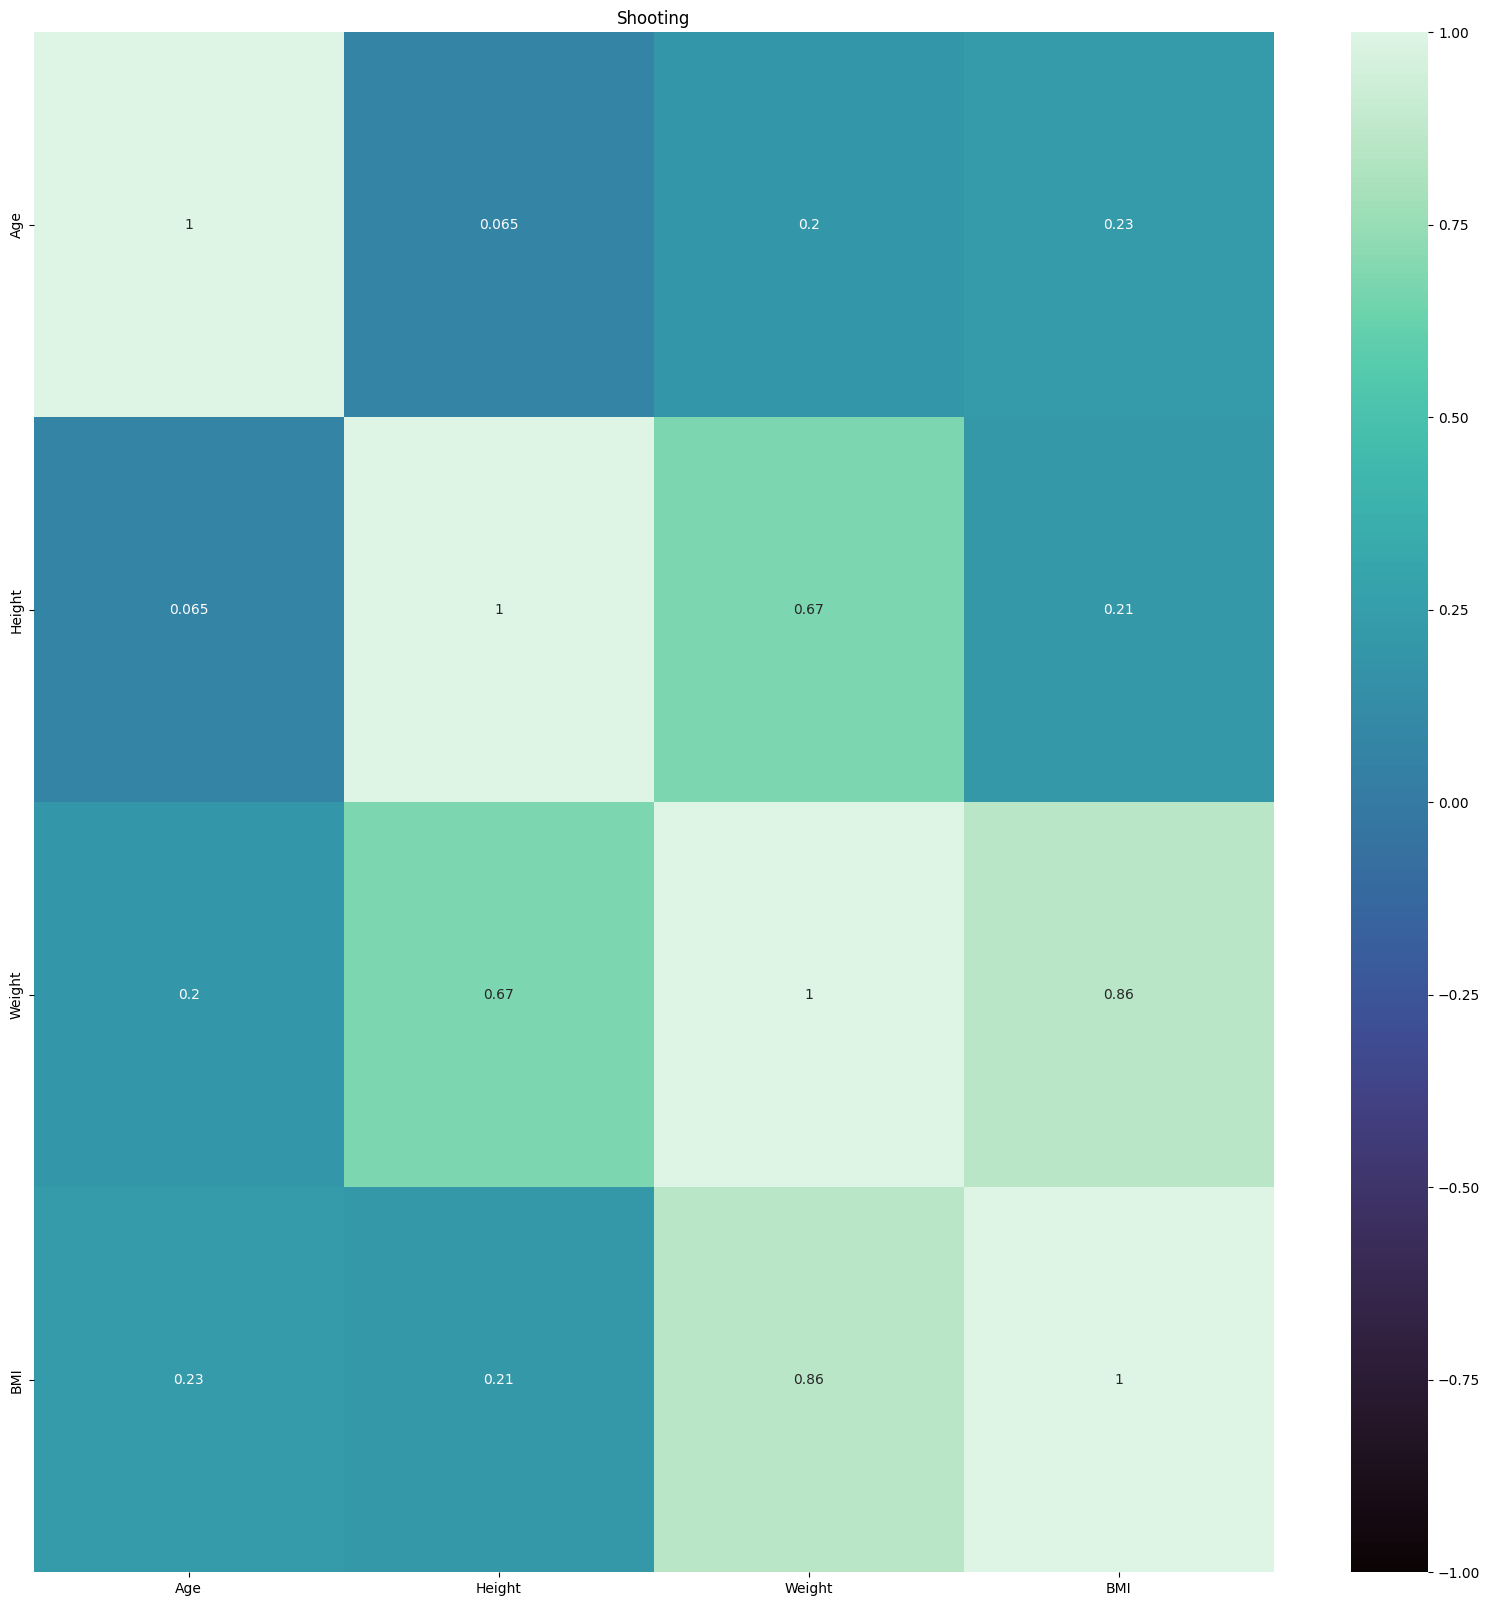

Softball


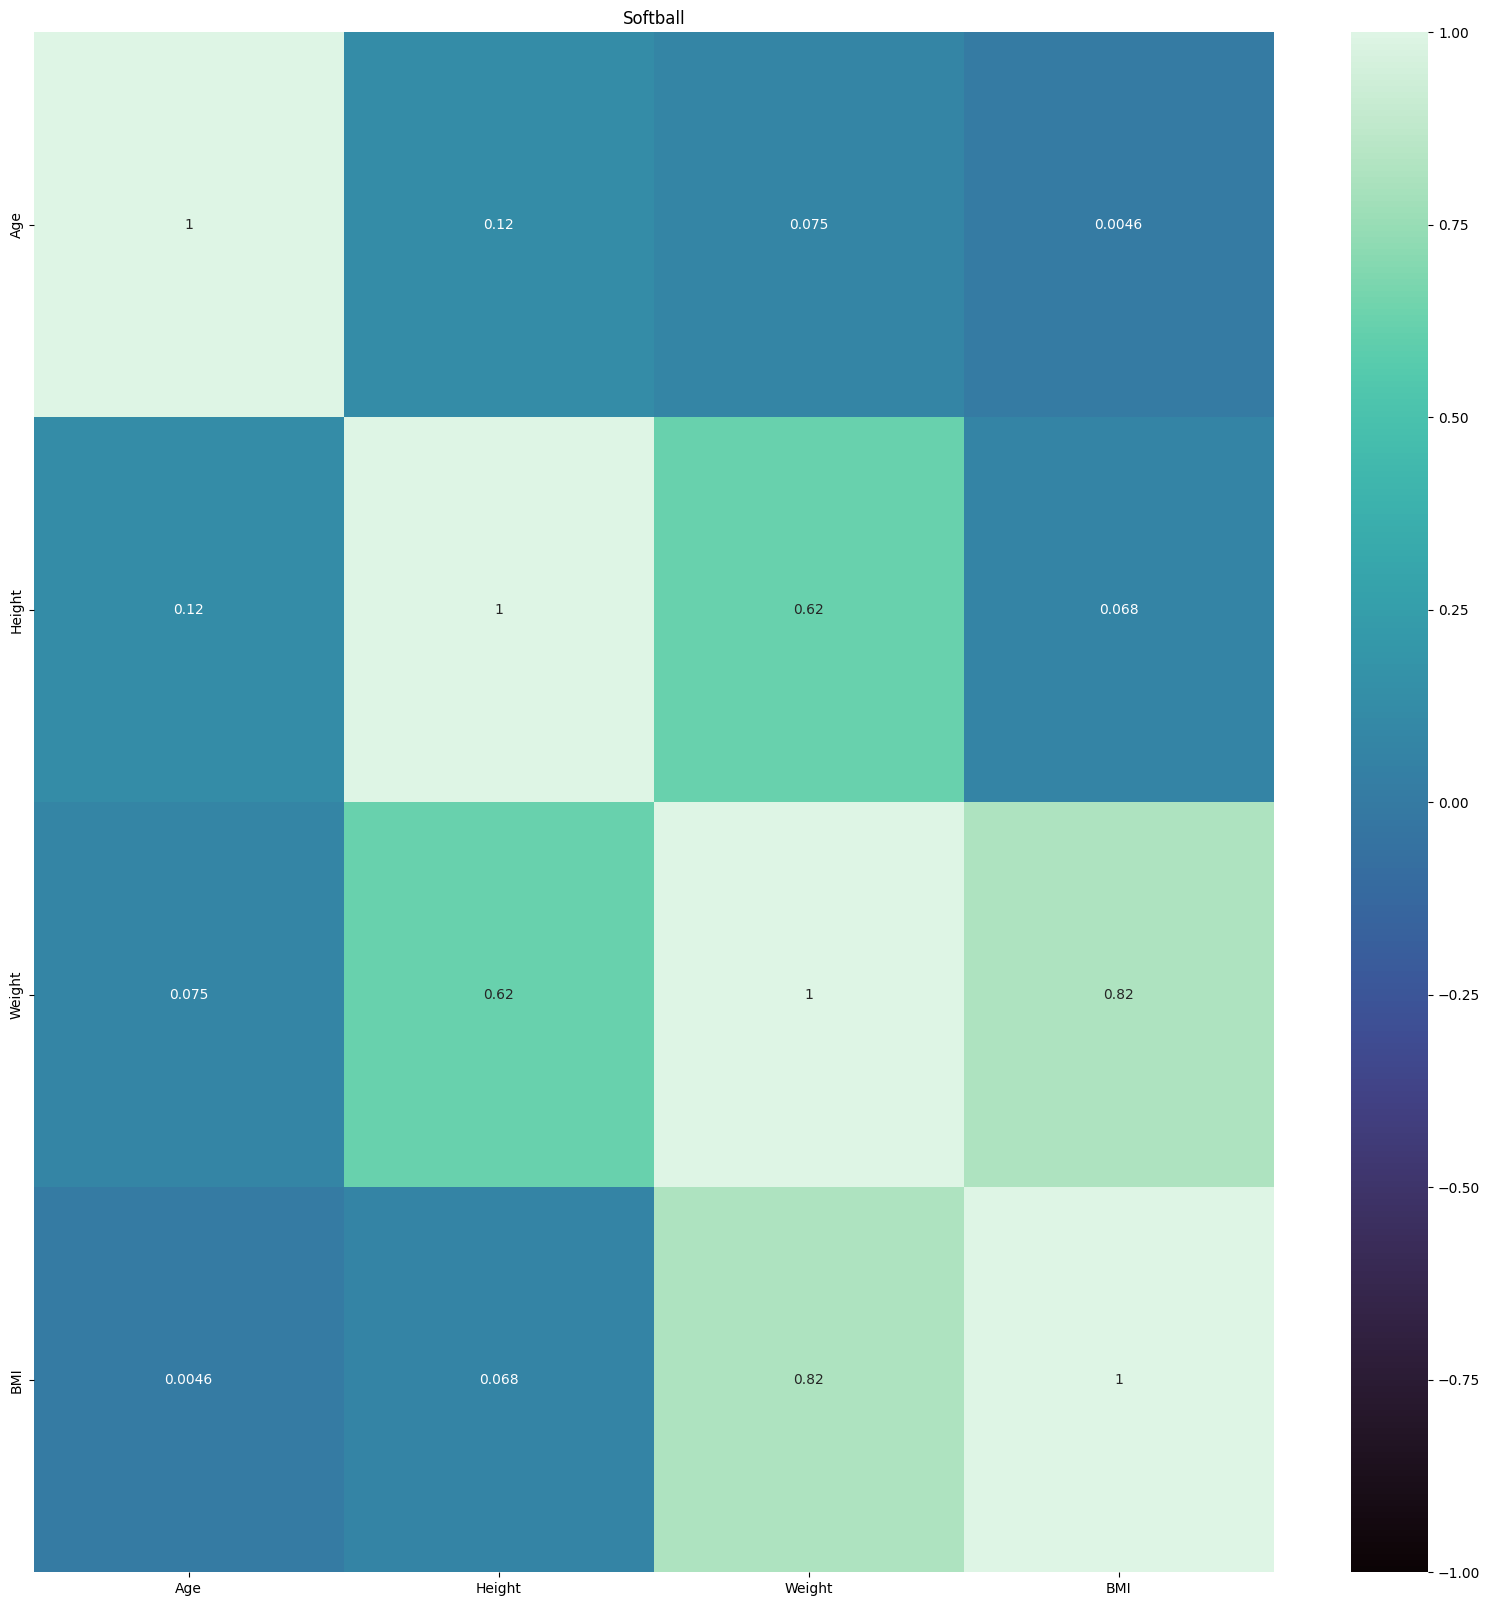

Swimming


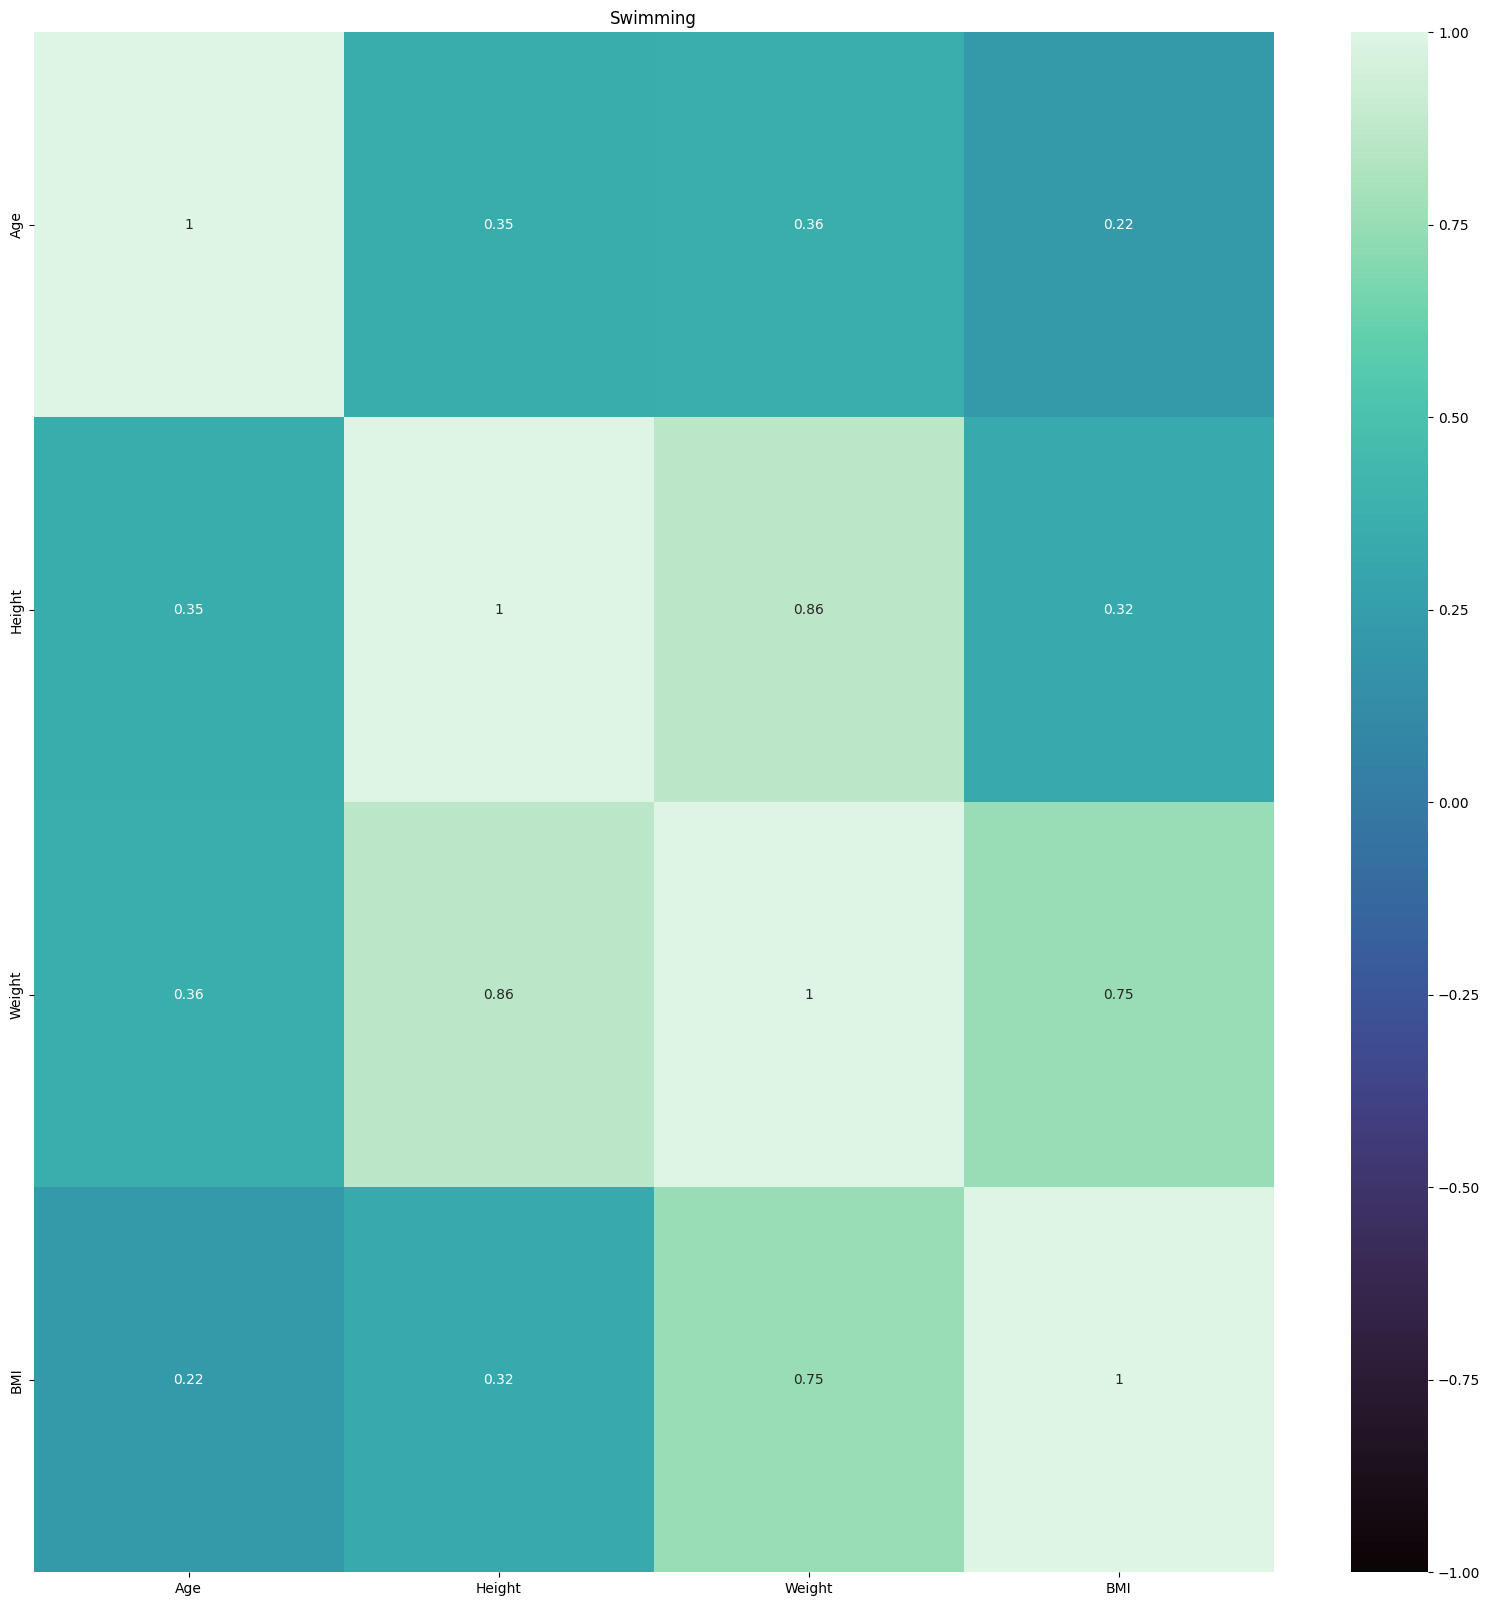

Synchronized Swimming


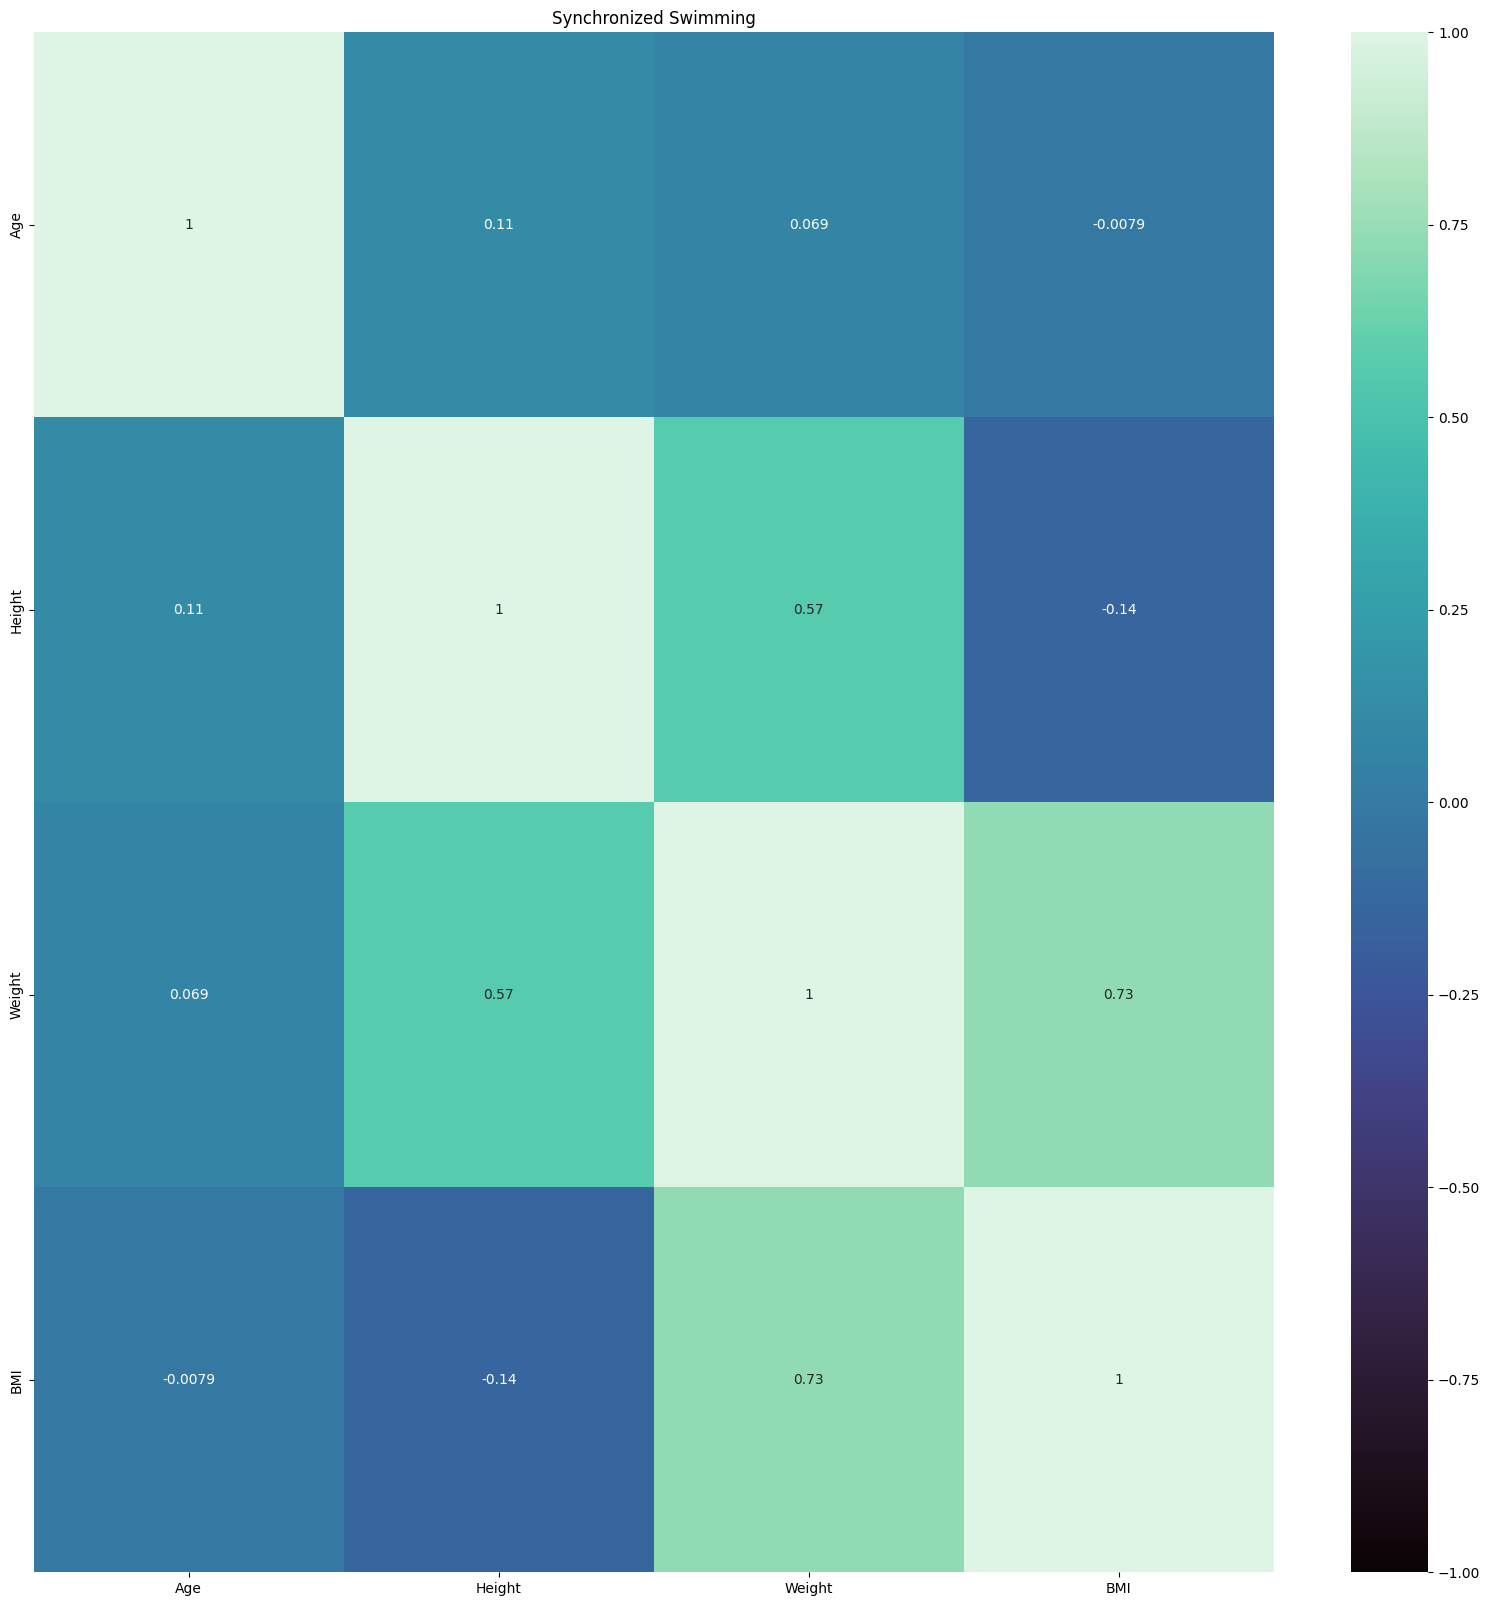

Table Tennis


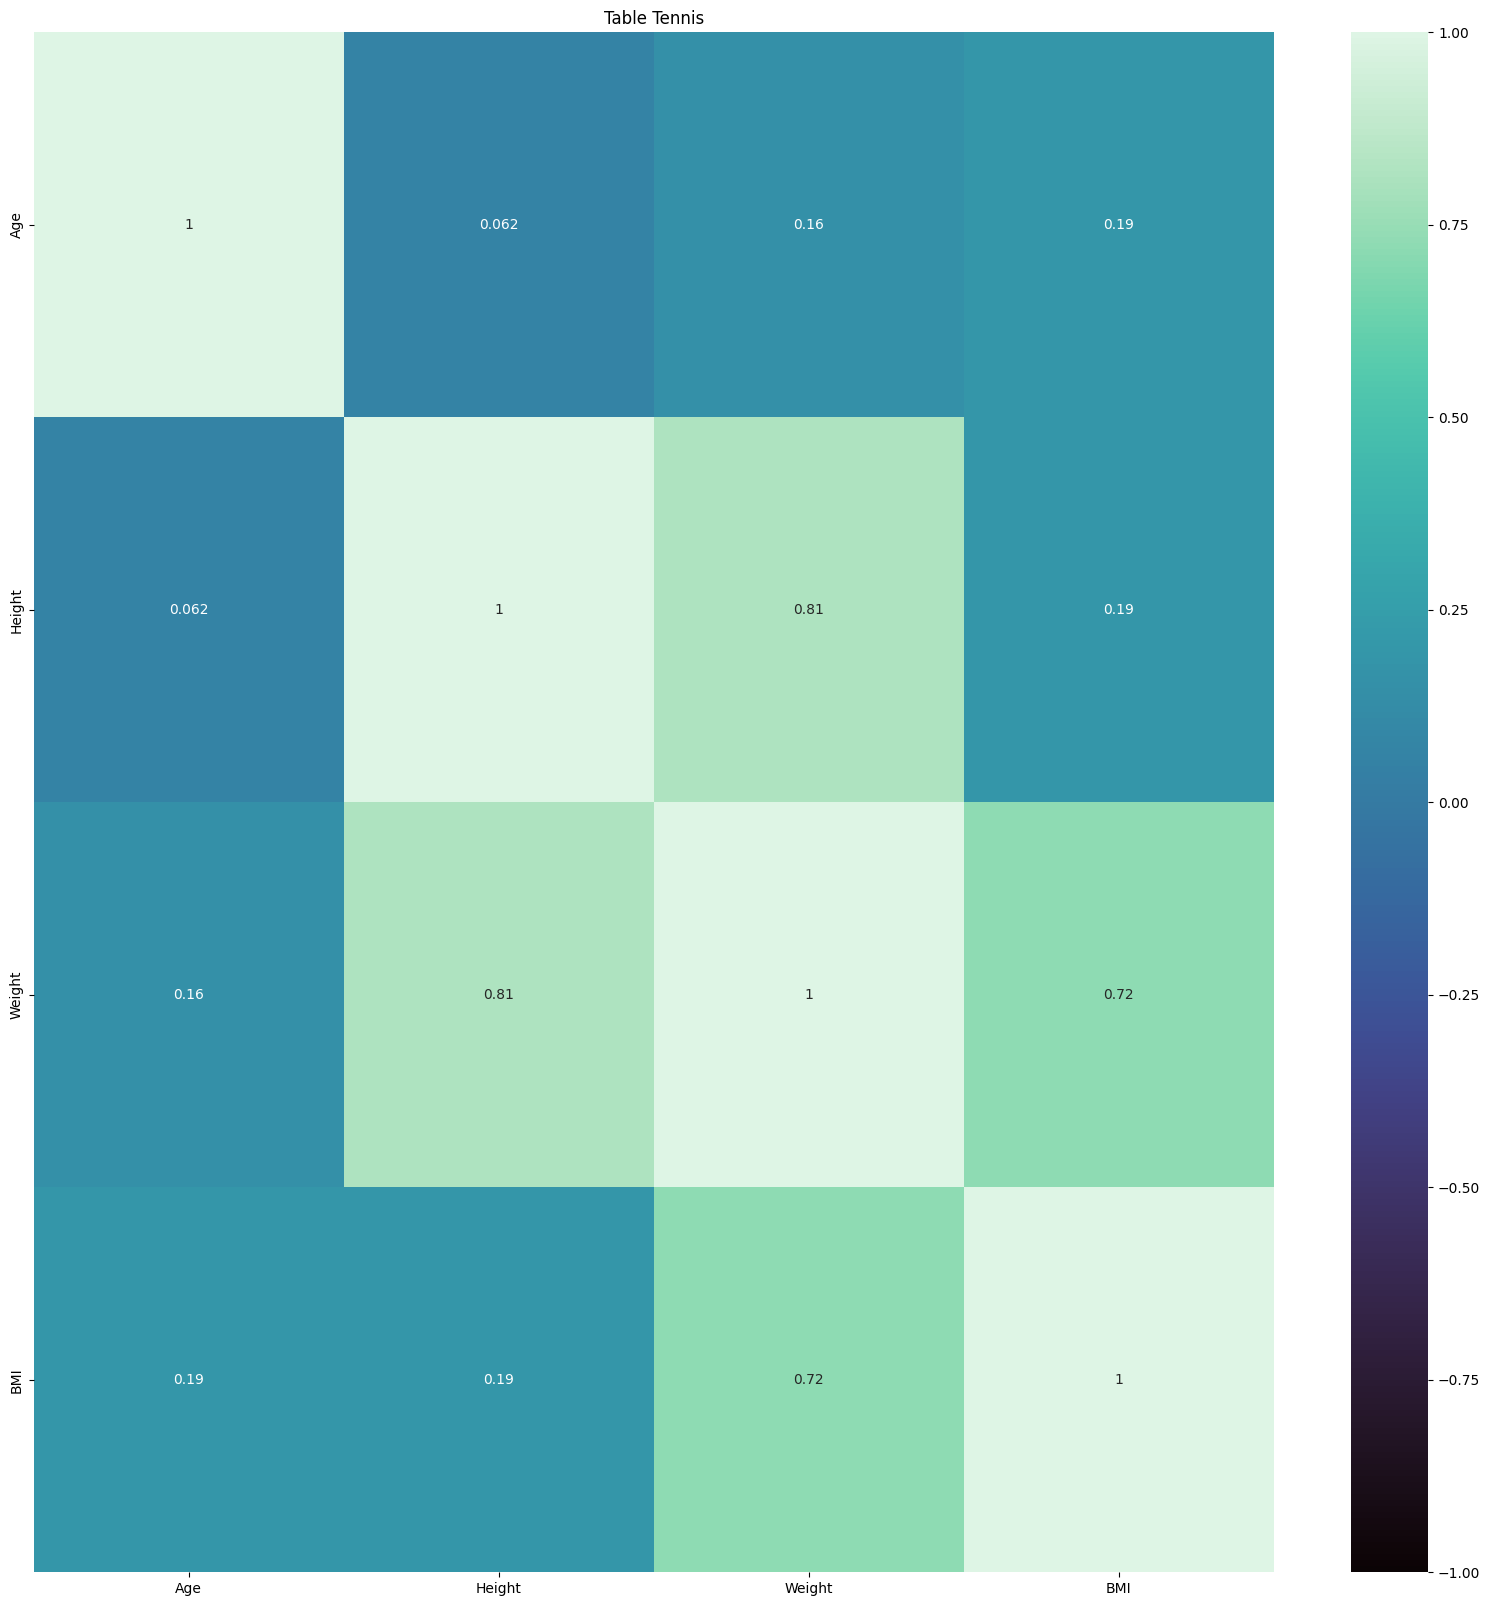

Taekwondo


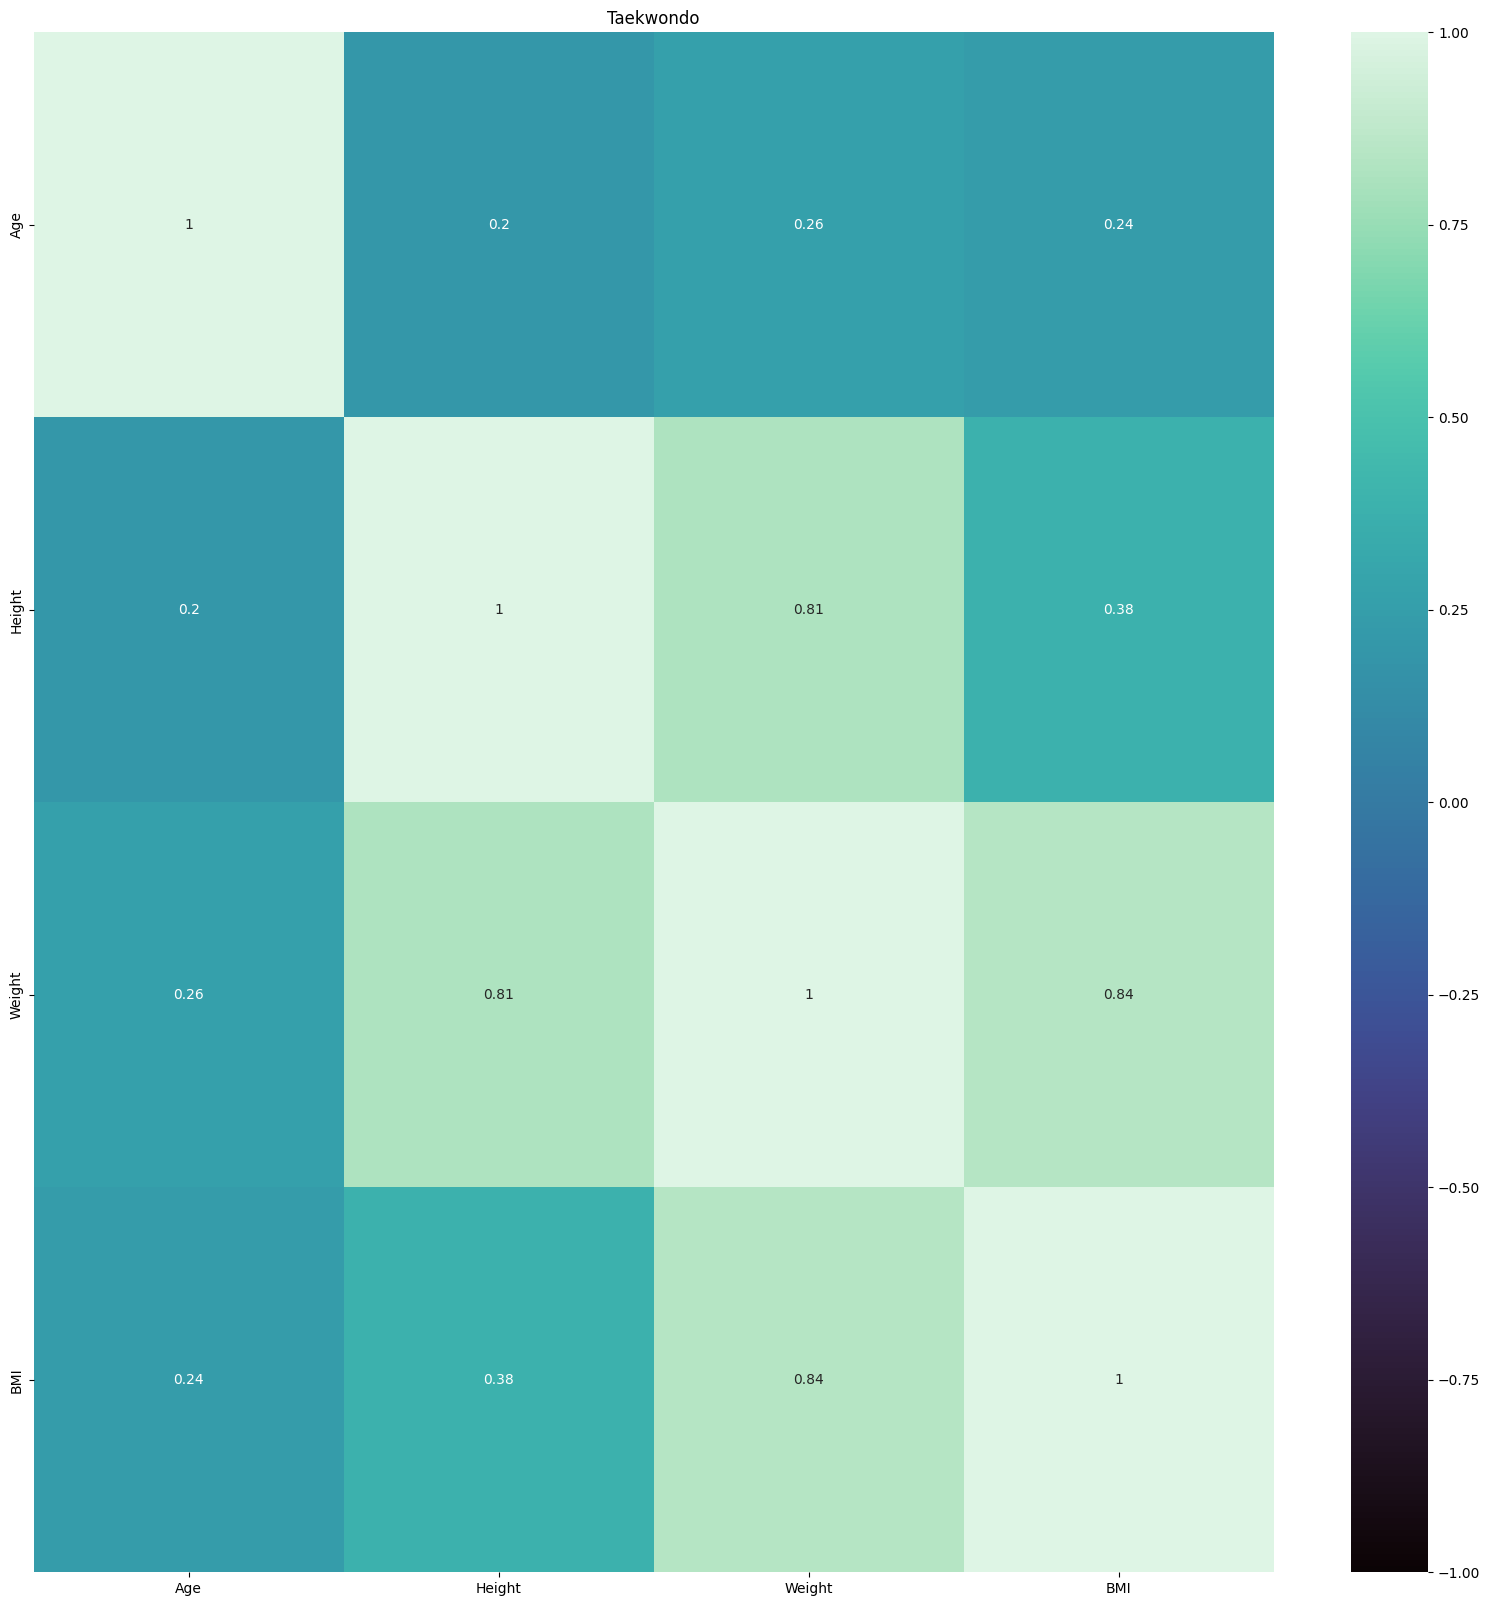

Tennis


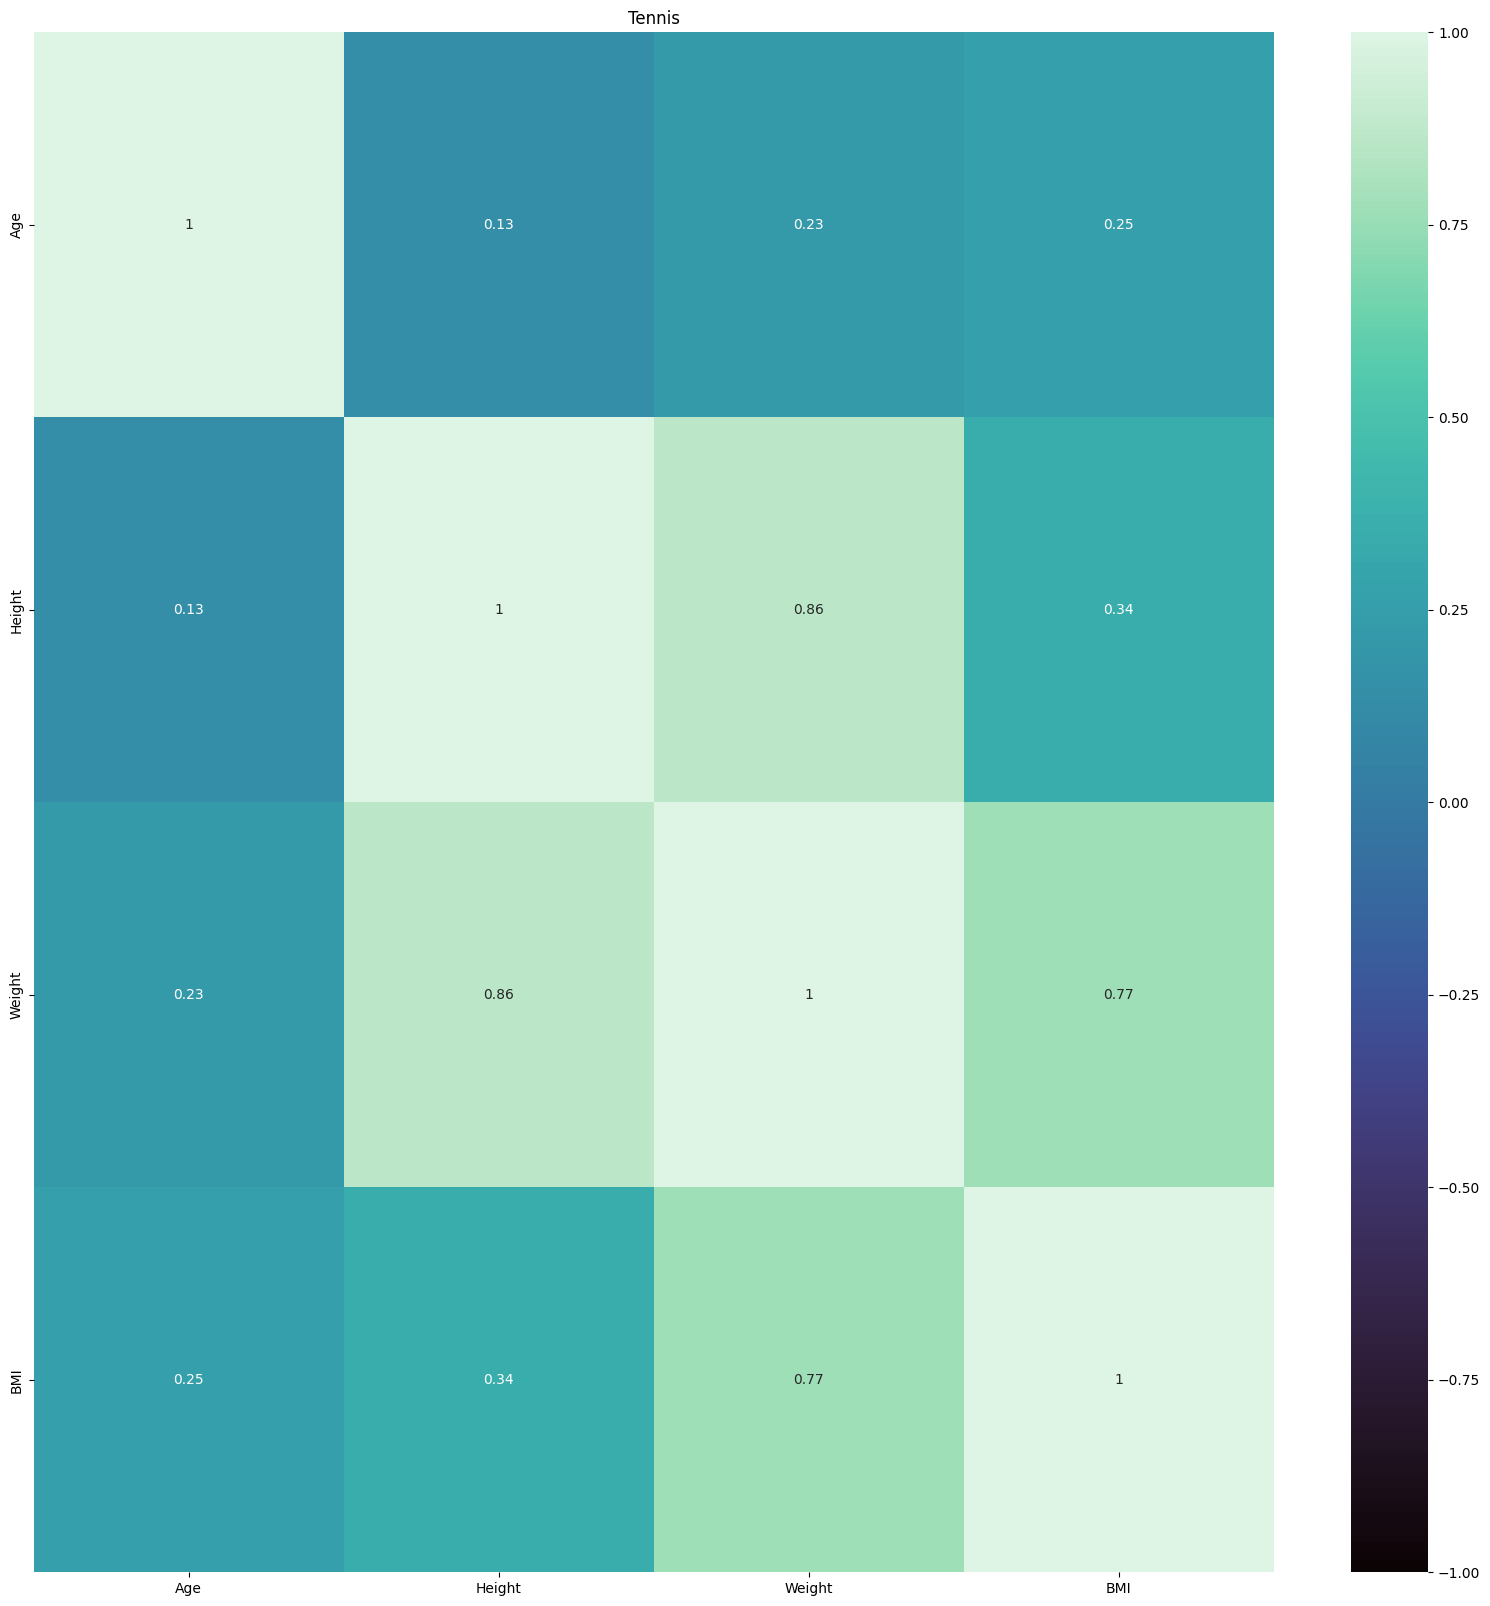

Trampolining


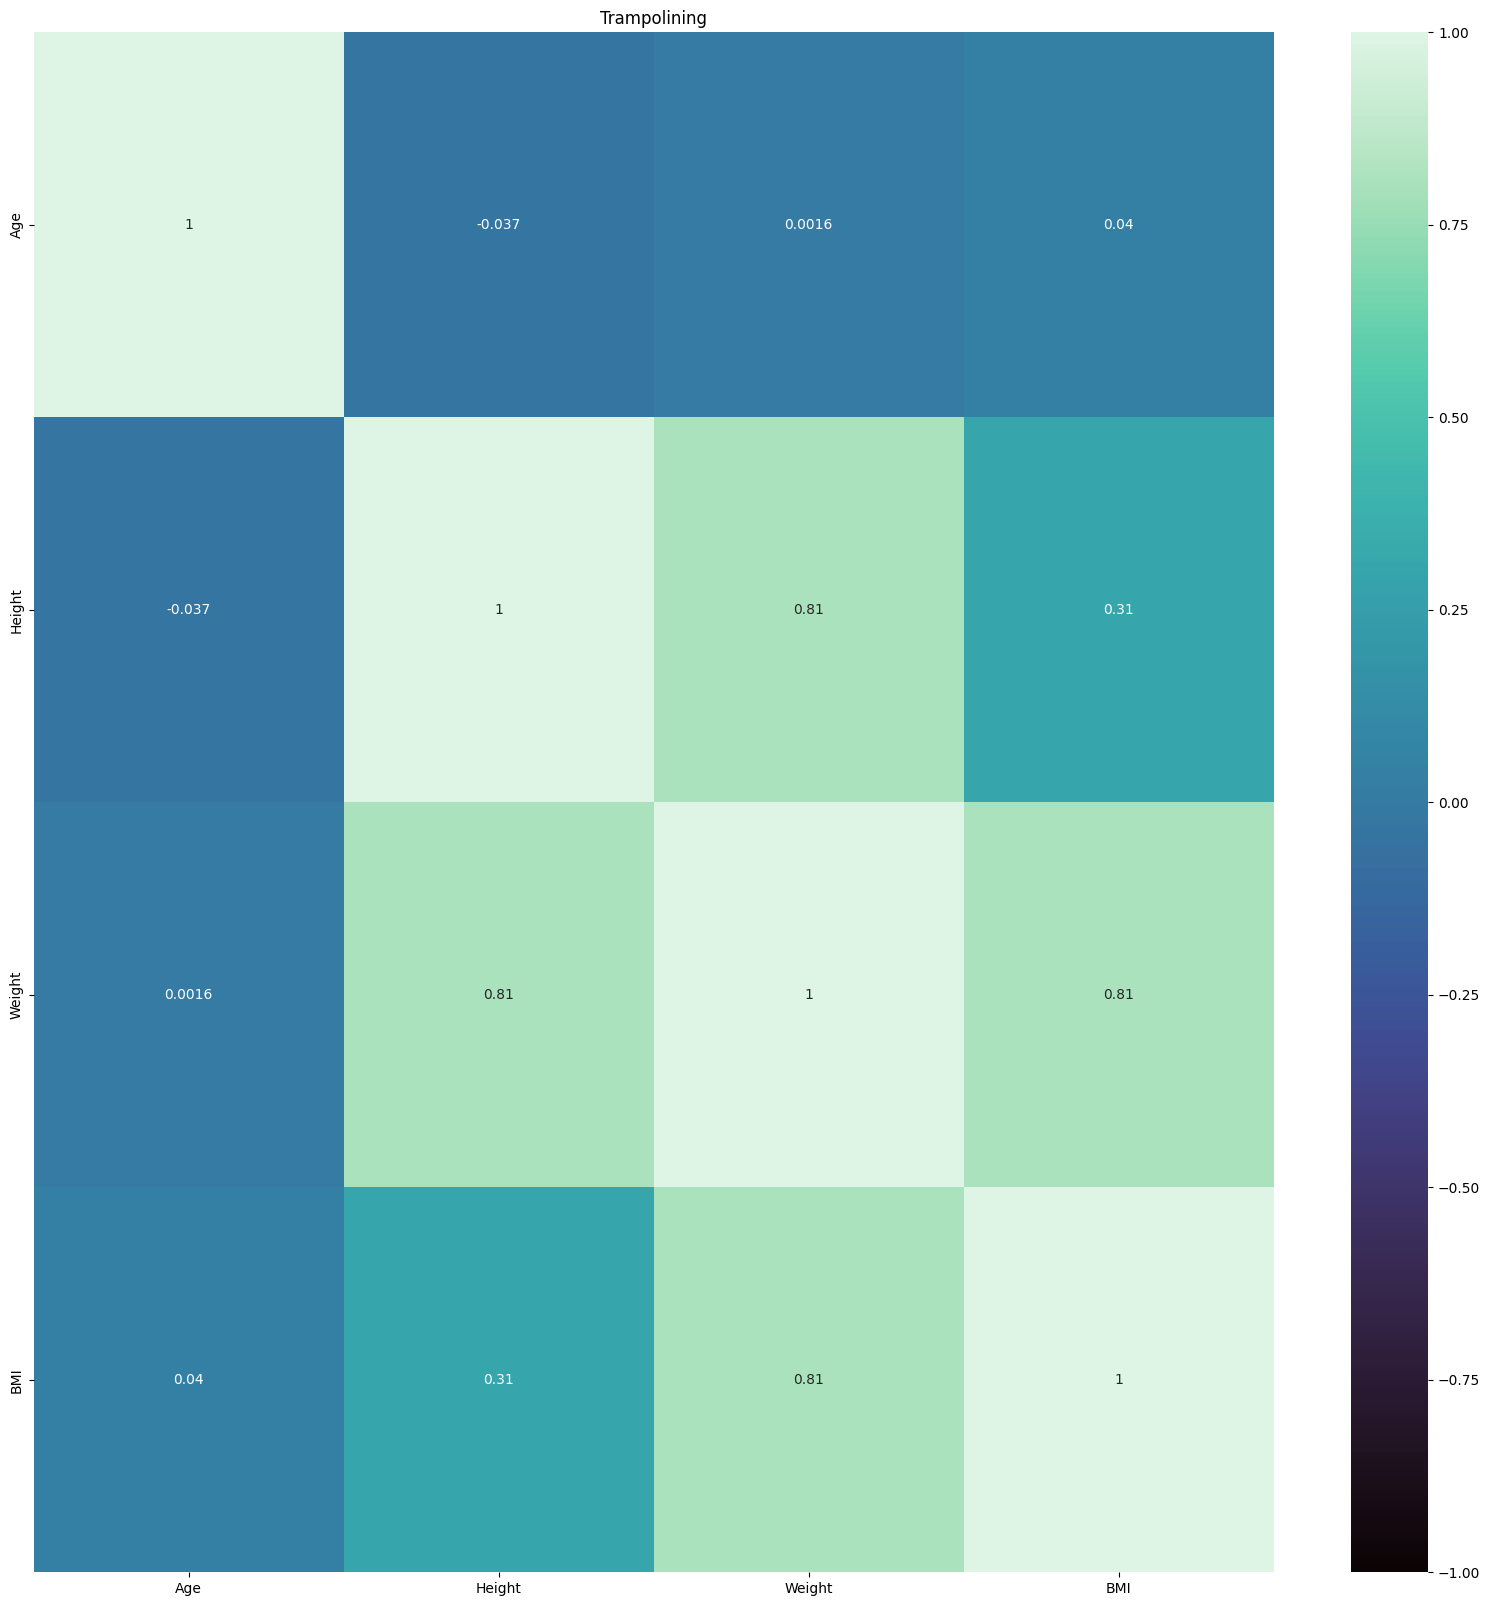

Triathlon


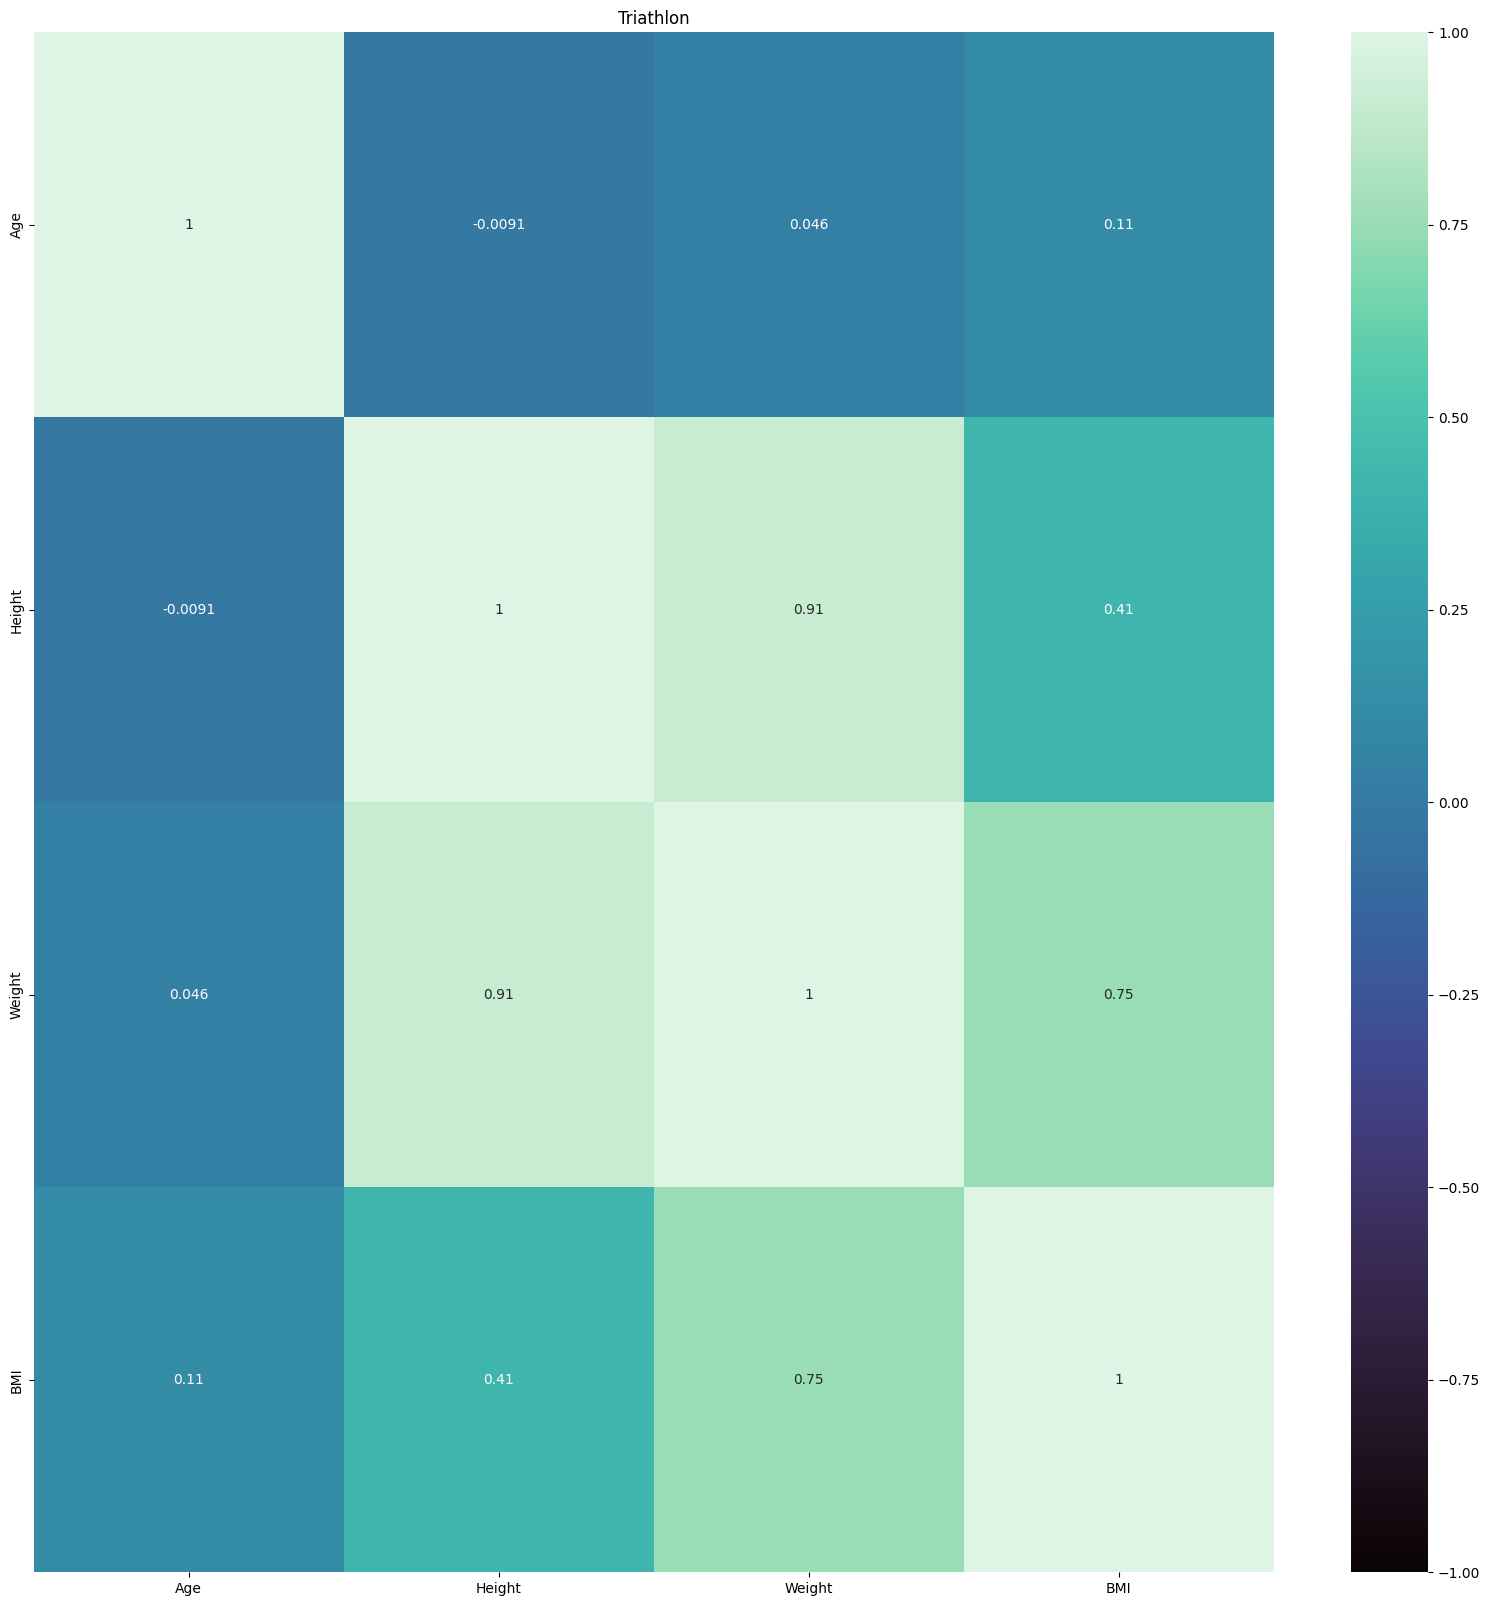

Volleyball


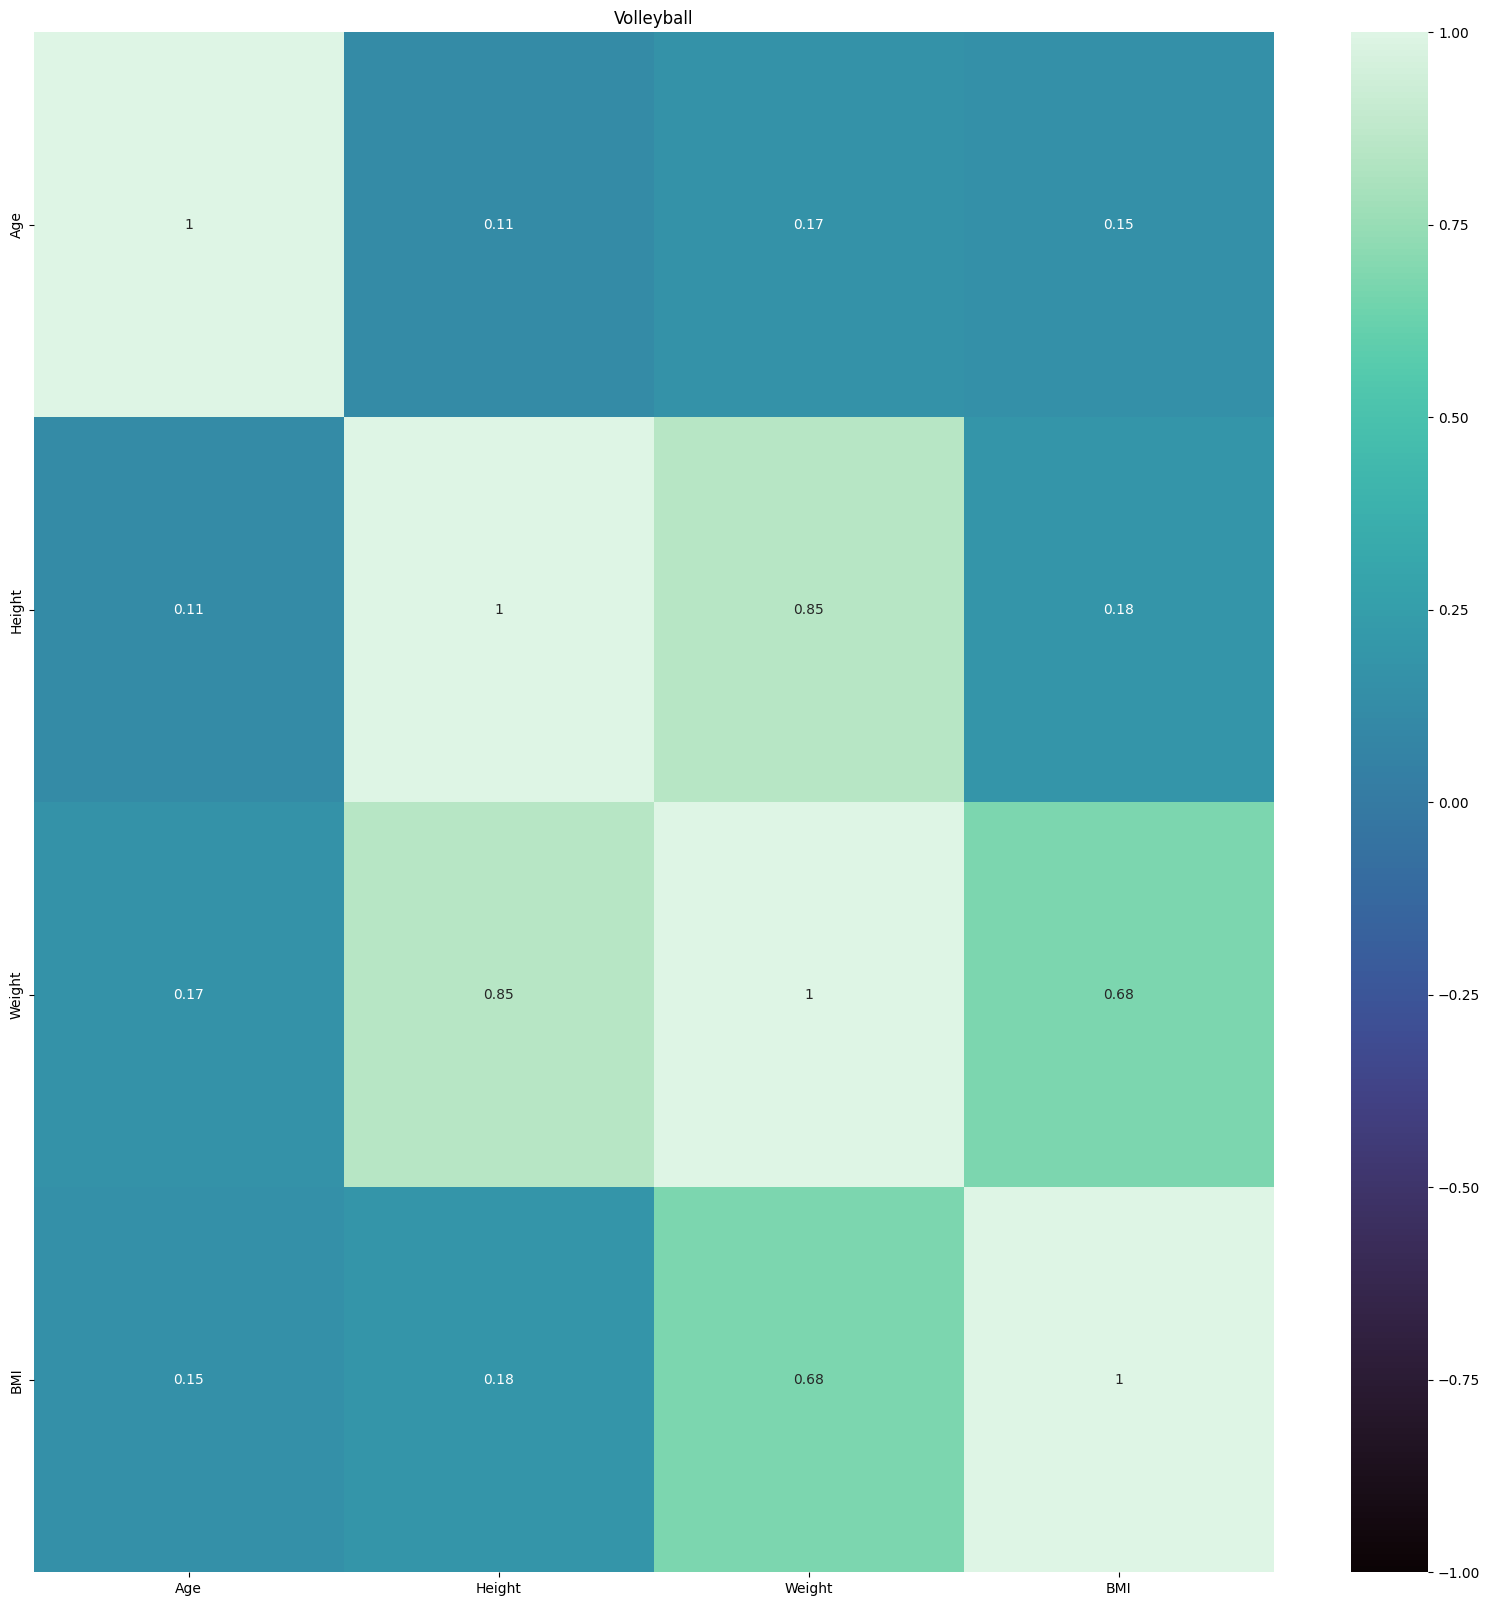

Water Polo


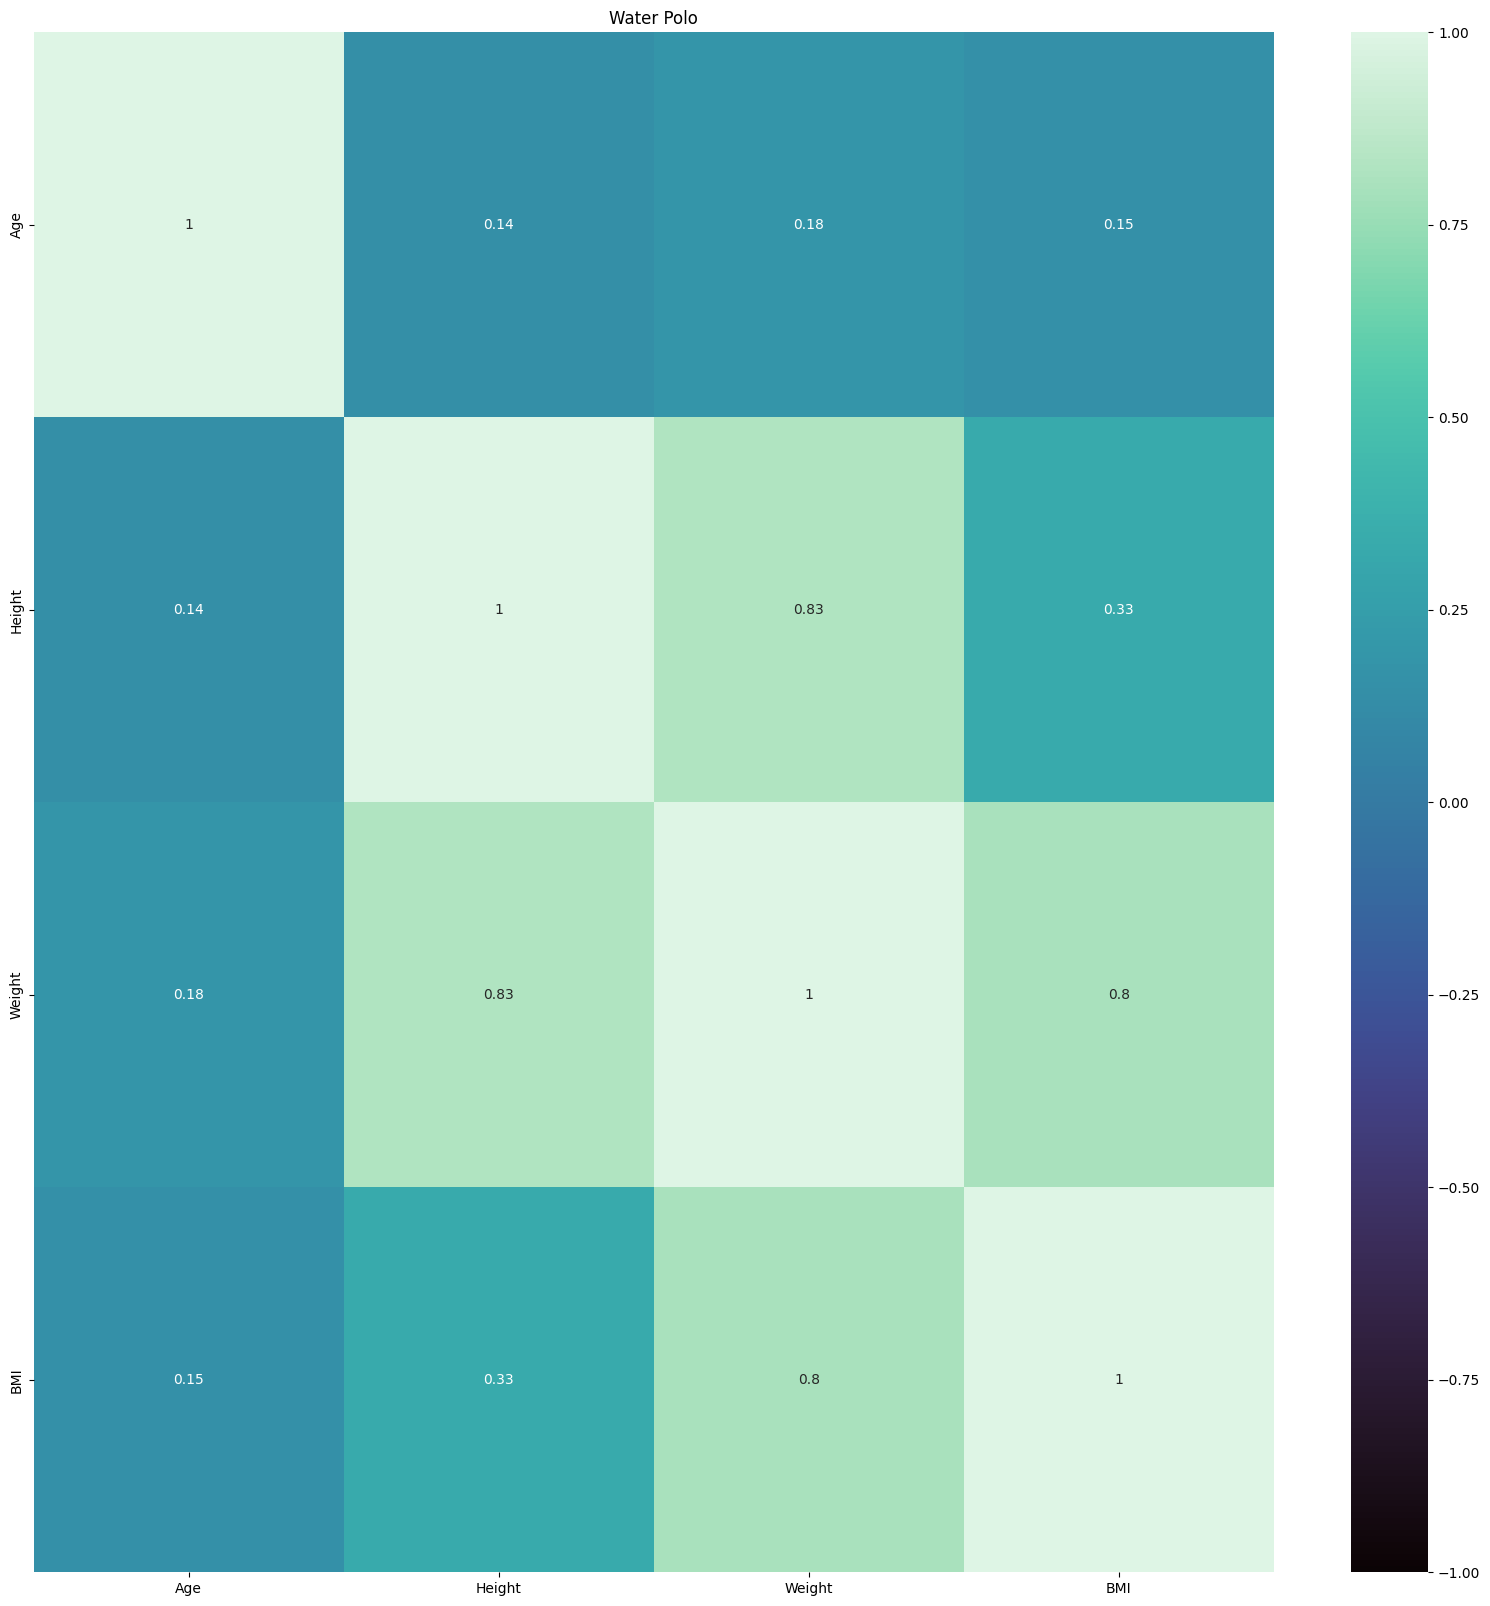

Weightlifting


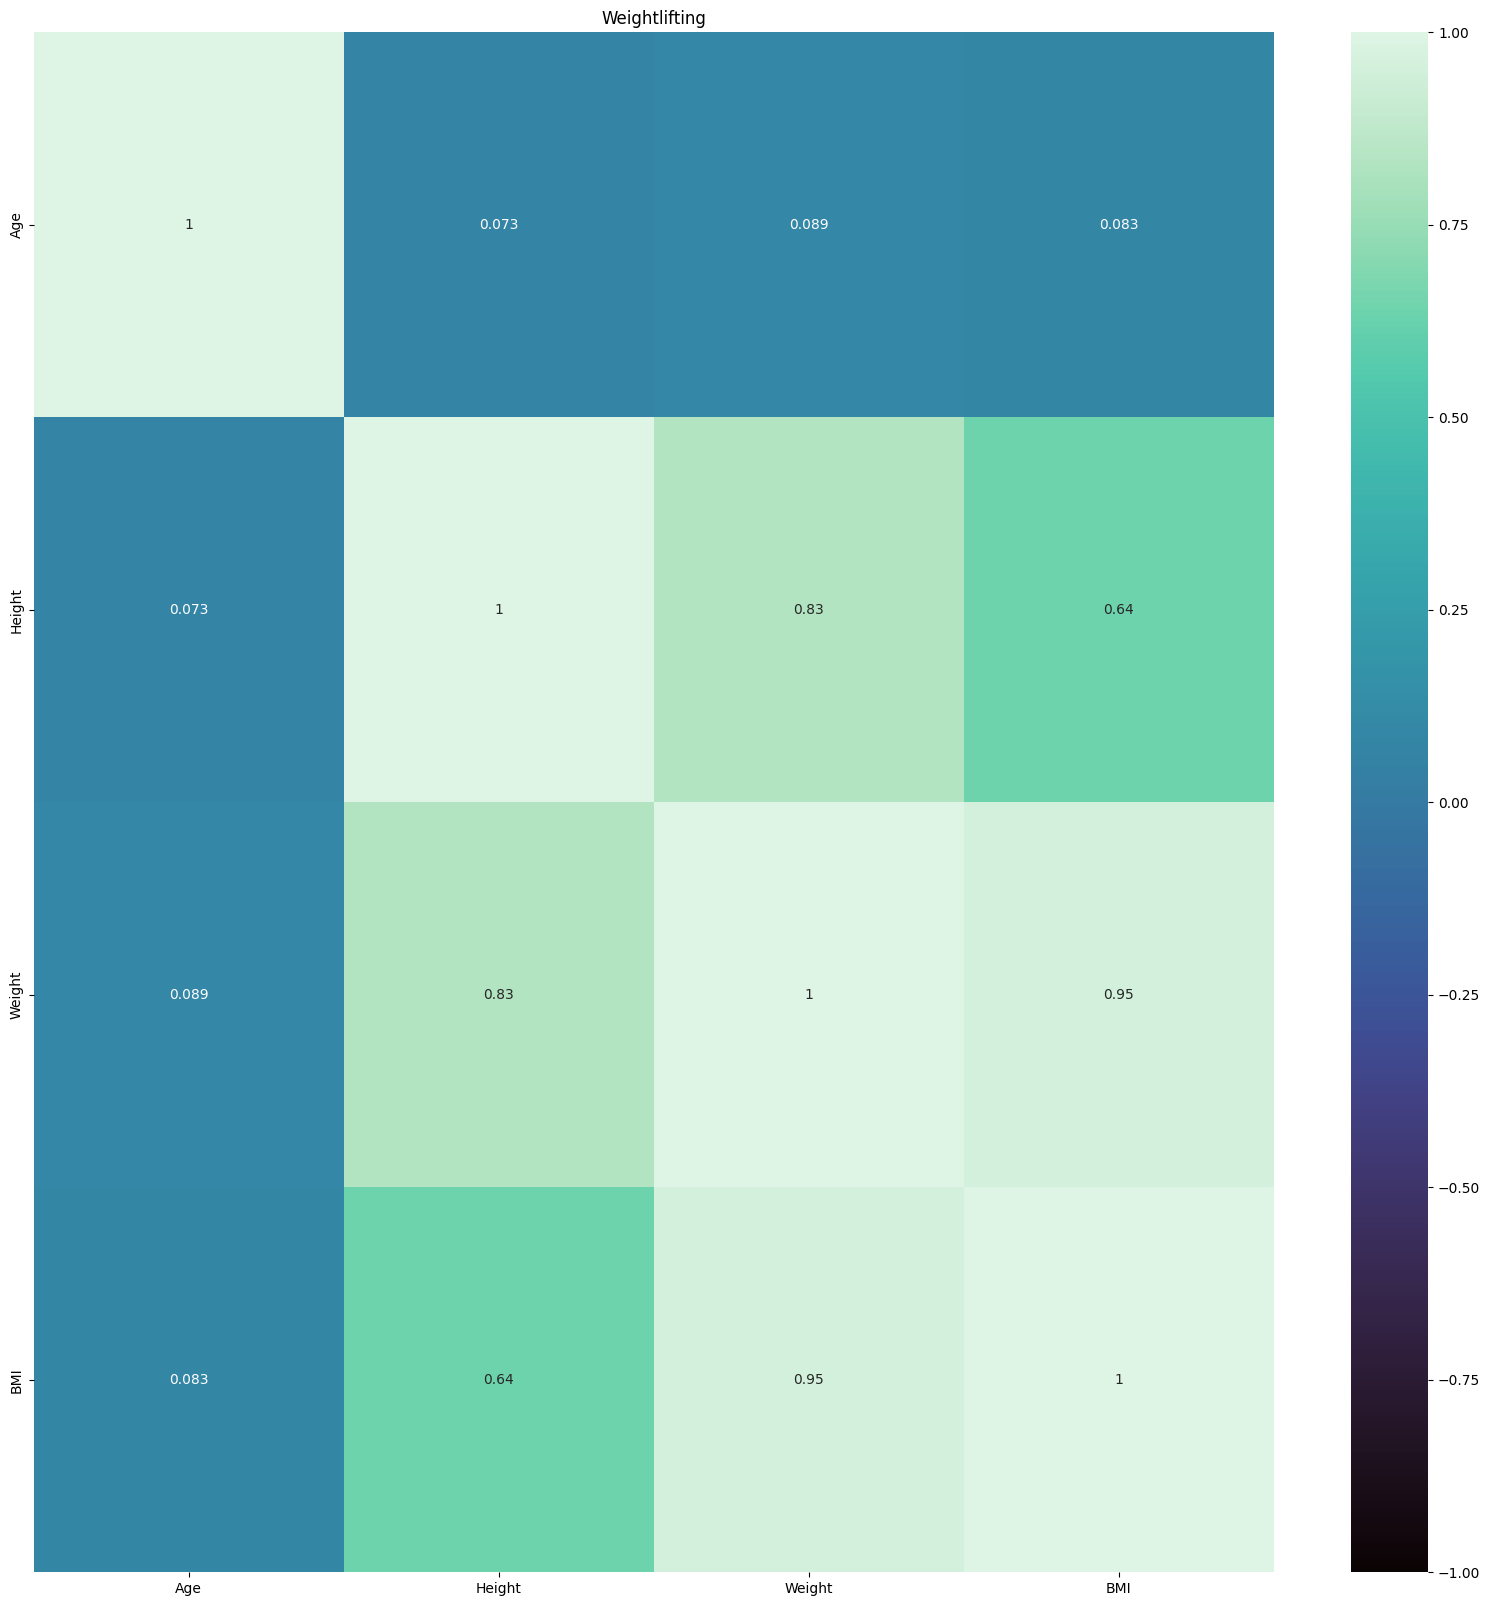

Wrestling


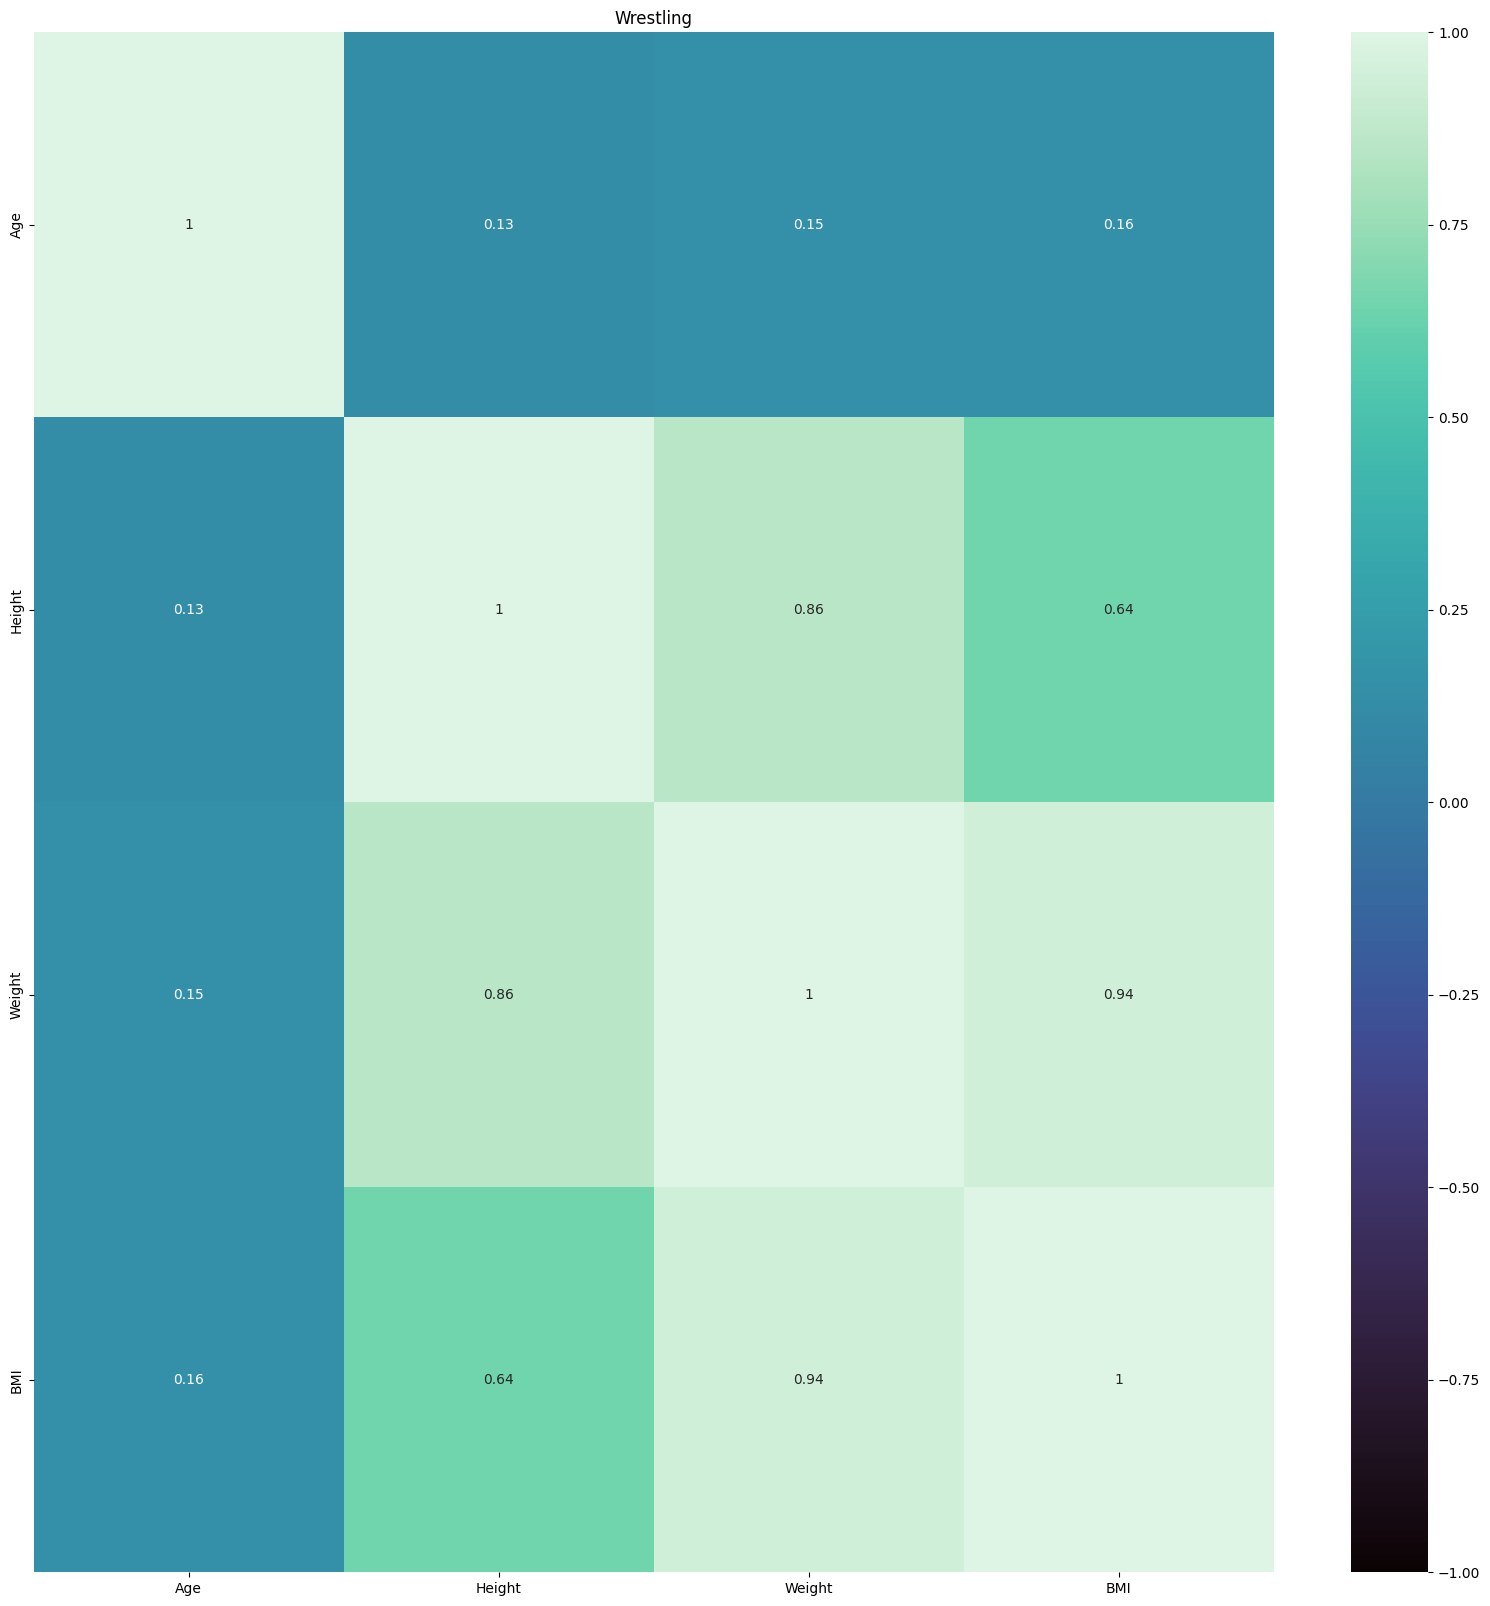

In [27]:
to_encode_df = df.drop(df.columns[0], axis=1)
to_encode_df = to_encode_df.drop(columns=['Season', 'ID', 'Year'])



df_grouped_by_sport = to_encode_df.groupby('Sport')

dict_df_grouped_by_sport = dfs = {group: data_frame.drop(columns='Sport').select_dtypes(include=['float64', 'int64']) for group, data_frame in df_grouped_by_sport}


for sport, sport_df in dict_df_grouped_by_sport.items():
    corr_matrix = sport_df.corr()
    
    print(sport)
    
    plt.figure(figsize=(20, 20))
    plt.title(sport)
    sns.heatmap(corr_matrix, annot=True, cmap='mako', vmin=-1, vmax=1)
    plt.show()

In [28]:
from IPython.display import display

for sport, sport_df in dict_df_grouped_by_sport.items():
    correlation_matrix = sport_df.corr()

    threshold = 0.51

    strong_correlations = correlation_matrix[(correlation_matrix.abs() > threshold)]

    correlation_tuples = [
        (col1, col2, strong_correlations.loc[col1, col2])
        for col1 in strong_correlations.columns
        for col2 in strong_correlations.index
        if not pd.isna(strong_correlations.loc[col1, col2])
    ]
    
    correlation_tuples = [(col1, col2, float(corr)) for col1,col2,corr in correlation_tuples if col1!=col2]
    
    unique_correlations = set()

    filtered_tuples = []
    for col1, col2, corr in correlation_tuples:
        # Create a sorted tuple of the column names to ensure ('A', 'B') == ('B', 'A')
        pair = tuple(sorted([col1, col2]))
        
        # If the pair is not in the set, add it and include the original tuple in the result
        if pair not in unique_correlations:
            unique_correlations.add(pair)
            filtered_tuples.append((col1, col2, corr))

    # Convert to DataFrame
    correlation_df = pd.DataFrame(filtered_tuples, columns=['Column 1', 'Column 2', 'Correlation'])
    
    print(sport)
    display(correlation_df)

Archery


Column 1 Column 2  Correlation
0   Height   Weight     0.687384
1   Weight      BMI     0.856029

Athletics


Column 1 Column 2  Correlation
0   Height   Weight     0.753208
1   Weight      BMI     0.899633

Badminton


Column 1 Column 2  Correlation
0   Height   Weight     0.837241
1   Weight      BMI     0.716371

Baseball


Column 1 Column 2  Correlation
0   Height   Weight     0.630151
1   Weight      BMI     0.758479

Basketball


Column 1 Column 2  Correlation
0   Height   Weight     0.873753
1   Weight      BMI     0.760136

Beach Volleyball


Column 1 Column 2  Correlation
0   Height   Weight     0.877121
1   Weight      BMI     0.817464

Boxing


Column 1 Column 2  Correlation
0   Height   Weight     0.803401
1   Weight      BMI     0.839465

Canoeing


Column 1 Column 2  Correlation
0   Height   Weight     0.828667
1   Weight      BMI     0.724710

Cycling


Column 1 Column 2  Correlation
0   Height   Weight     0.706611
1   Weight      BMI     0.745322

Diving


Column 1 Column 2  Correlation
0   Height   Weight     0.847227
1   Weight      BMI     0.828810

Equestrianism


Column 1 Column 2  Correlation
0   Height   Weight     0.713882
1   Weight      BMI     0.719171

Fencing


Column 1 Column 2  Correlation
0   Height   Weight     0.809812
1   Weight      BMI     0.755754

Football


Column 1 Column 2  Correlation
0   Height   Weight     0.819168
1   Weight      BMI     0.672617

Golf


Column 1 Column 2  Correlation
0   Height   Weight     0.735817
1   Weight      BMI     0.805286

Gymnastics


Column 1 Column 2  Correlation
0      Age   Weight     0.578612
1      Age      BMI     0.543867
2   Height   Weight     0.868560
3   Height      BMI     0.525286
4   Weight      BMI     0.873211

Handball


Column 1 Column 2  Correlation
0   Height   Weight     0.878143
1   Weight      BMI     0.815852

Hockey


Column 1 Column 2  Correlation
0   Height   Weight     0.824851
1   Weight      BMI     0.724913

Judo


Column 1 Column 2  Correlation
0   Height   Weight     0.797753
1   Height      BMI     0.516221
2   Weight      BMI     0.922168

Modern Pentathlon


Column 1 Column 2  Correlation
0   Height   Weight     0.782142
1   Weight      BMI     0.716913

Rhythmic Gymnastics


Column 1 Column 2  Correlation
0   Height   Weight     0.719027
1   Weight      BMI     0.805968

Rowing


Column 1 Column 2  Correlation
0   Height   Weight     0.887441
1   Weight      BMI     0.839584

Rugby Sevens


Column 1 Column 2  Correlation
0   Height   Weight     0.900833
1   Height      BMI     0.521606
2   Weight      BMI     0.836652

Sailing


Column 1 Column 2  Correlation
0   Height   Weight     0.712013
1   Weight      BMI     0.846434

Shooting


Column 1 Column 2  Correlation
0   Height   Weight     0.673301
1   Weight      BMI     0.858037

Softball


Column 1 Column 2  Correlation
0   Height   Weight     0.623293
1   Weight      BMI     0.819314

Swimming


Column 1 Column 2  Correlation
0   Height   Weight     0.864154
1   Weight      BMI     0.751184

Synchronized Swimming


Column 1 Column 2  Correlation
0   Height   Weight     0.566712
1   Weight      BMI     0.733322

Table Tennis


Column 1 Column 2  Correlation
0   Height   Weight     0.813262
1   Weight      BMI     0.723764

Taekwondo


Column 1 Column 2  Correlation
0   Height   Weight     0.813743
1   Weight      BMI     0.843689

Tennis


Column 1 Column 2  Correlation
0   Height   Weight     0.860384
1   Weight      BMI     0.771751

Trampolining


Column 1 Column 2  Correlation
0   Height   Weight     0.811879
1   Weight      BMI     0.805188

Triathlon


Column 1 Column 2  Correlation
0   Height   Weight     0.908373
1   Weight      BMI     0.752997

Volleyball


Column 1 Column 2  Correlation
0   Height   Weight     0.846771
1   Weight      BMI     0.675195

Water Polo


Column 1 Column 2  Correlation
0   Height   Weight     0.825699
1   Weight      BMI     0.804226

Weightlifting


Column 1 Column 2  Correlation
0   Height   Weight     0.832926
1   Height      BMI     0.639078
2   Weight      BMI     0.952929

Wrestling


Column 1 Column 2  Correlation
0   Height   Weight     0.857497
1   Height      BMI     0.644967
2   Weight      BMI     0.941482

Archery


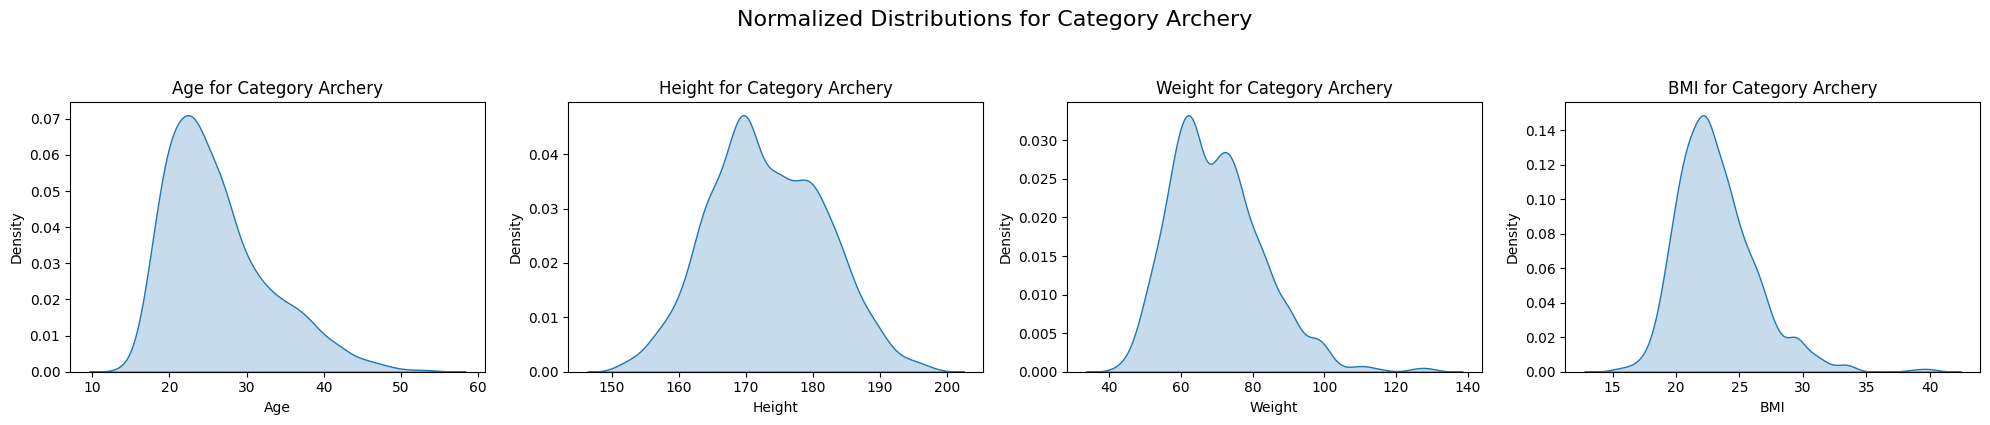

Athletics


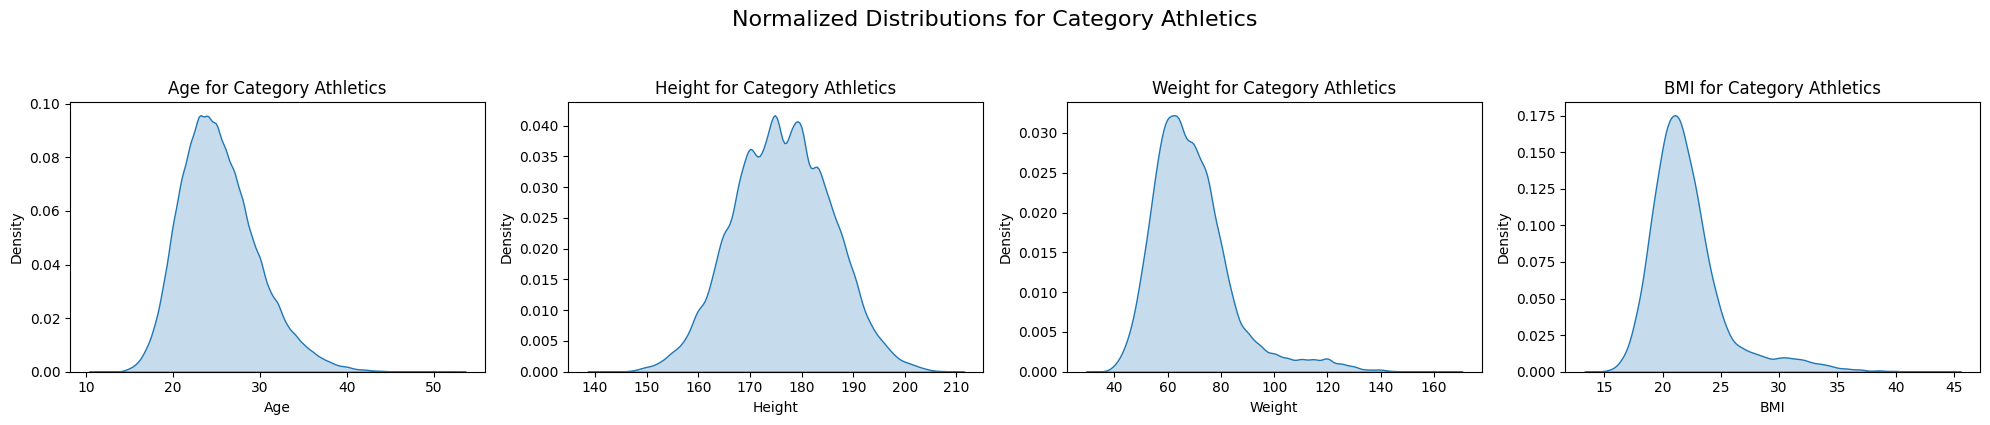

Badminton


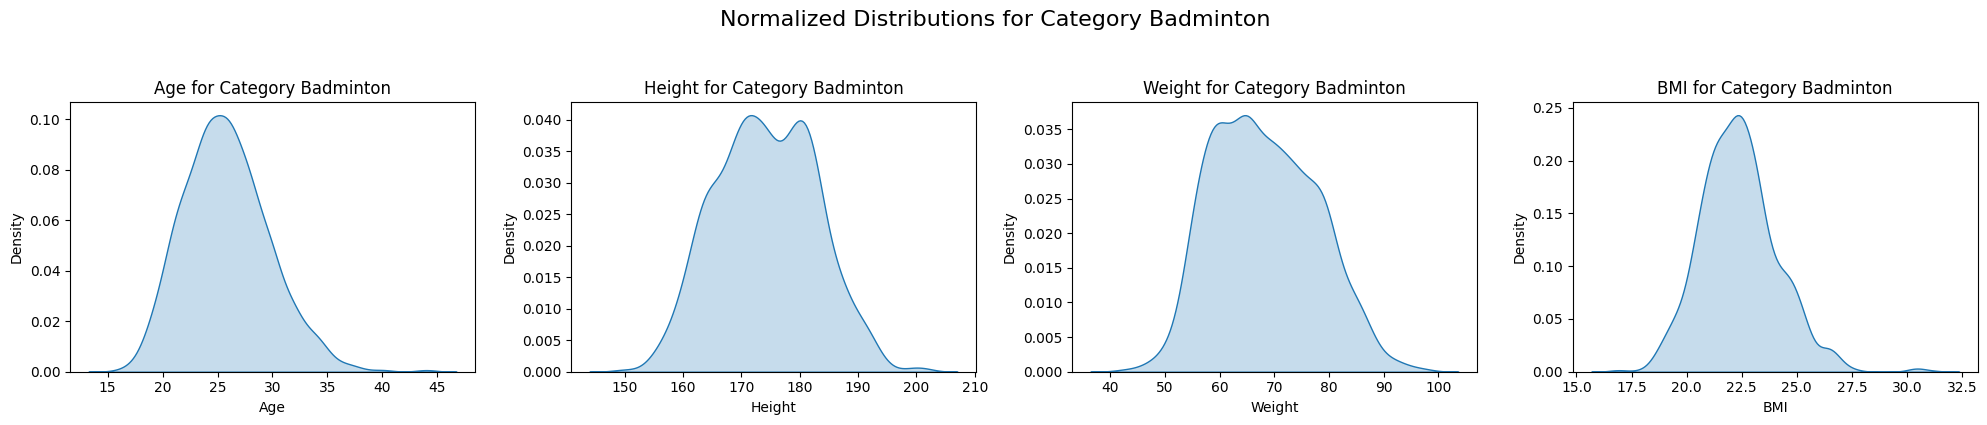

Baseball


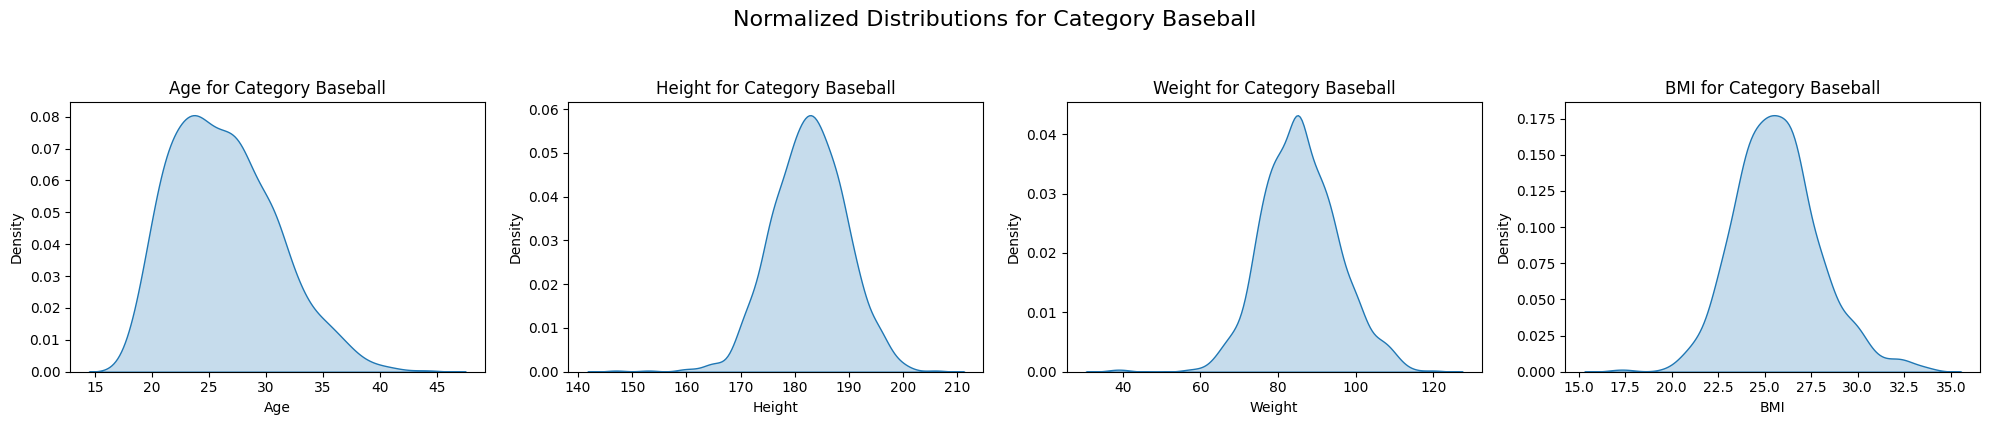

Basketball


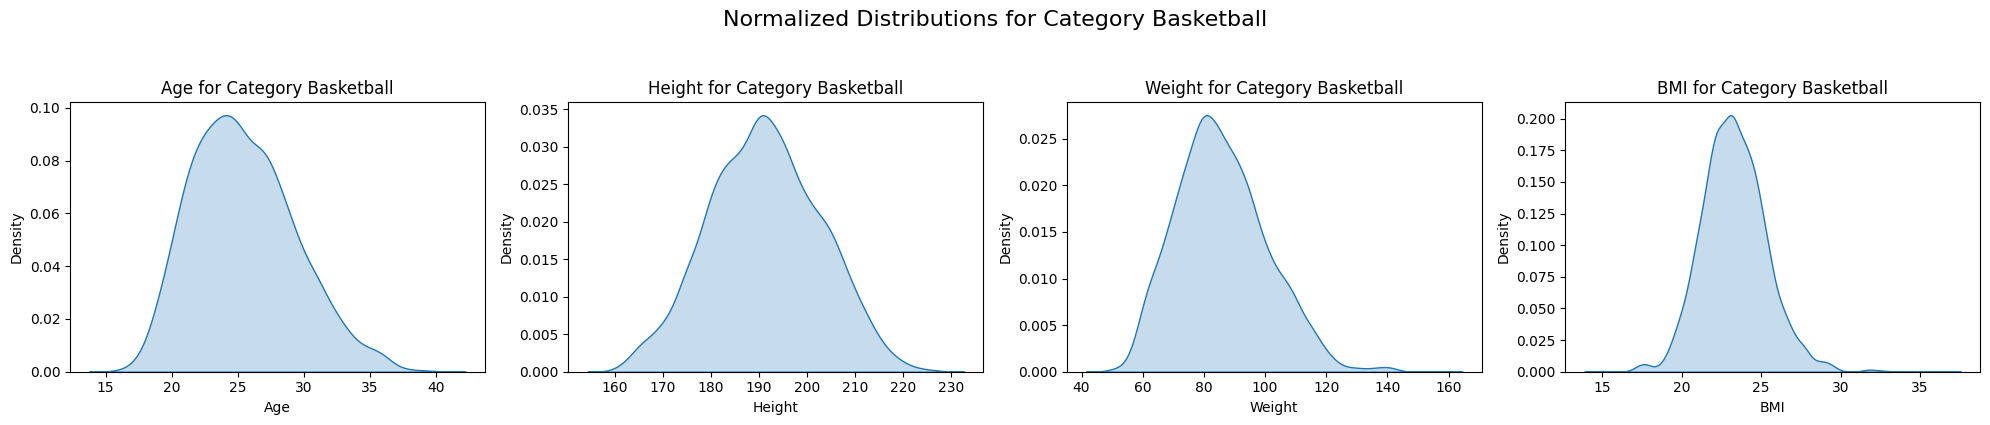

Beach Volleyball


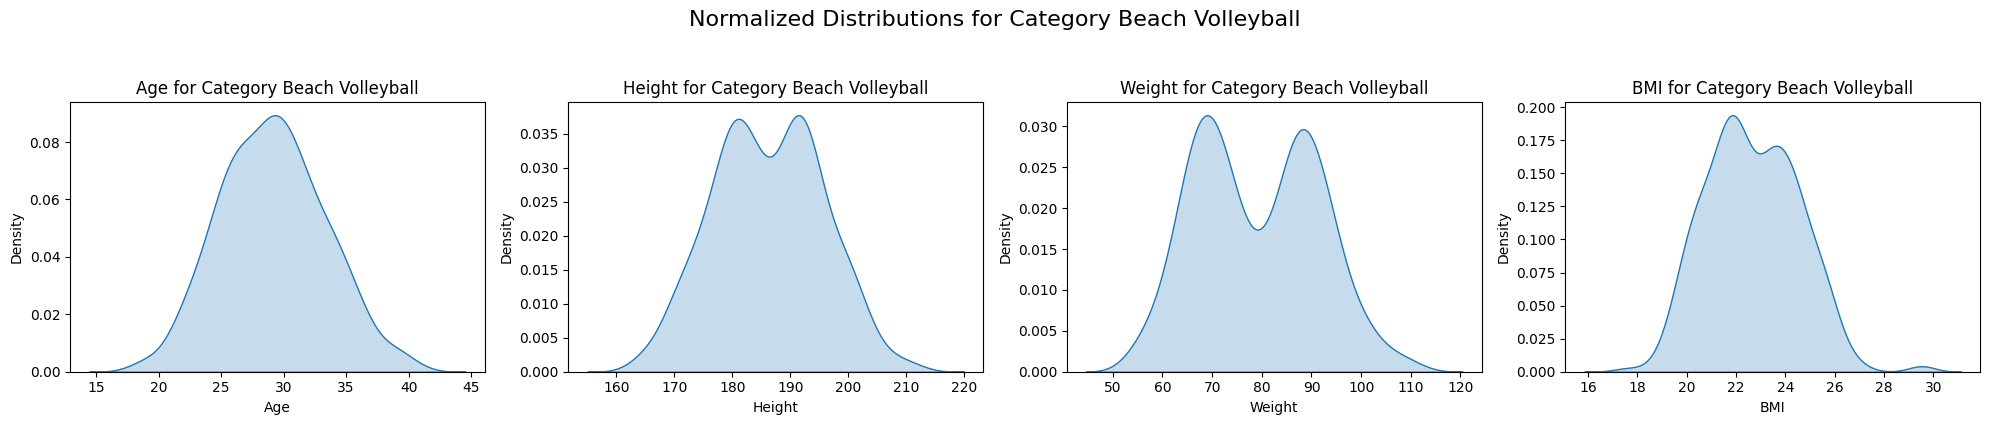

Boxing


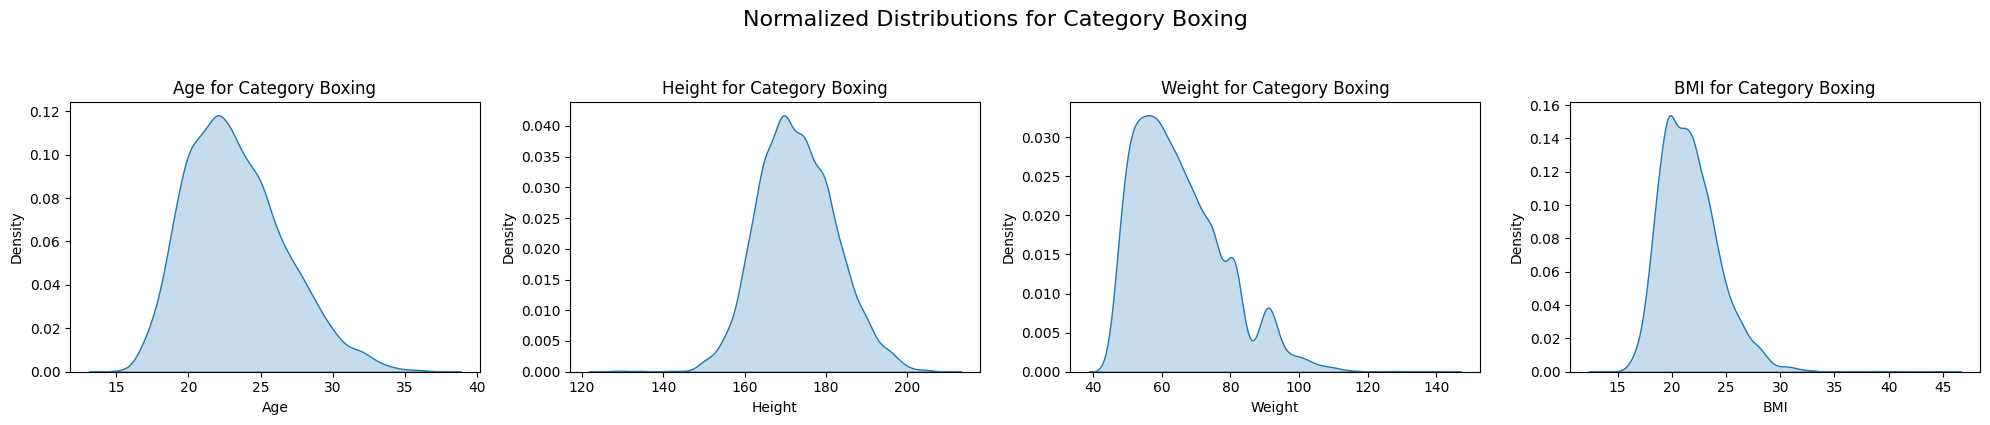

Canoeing


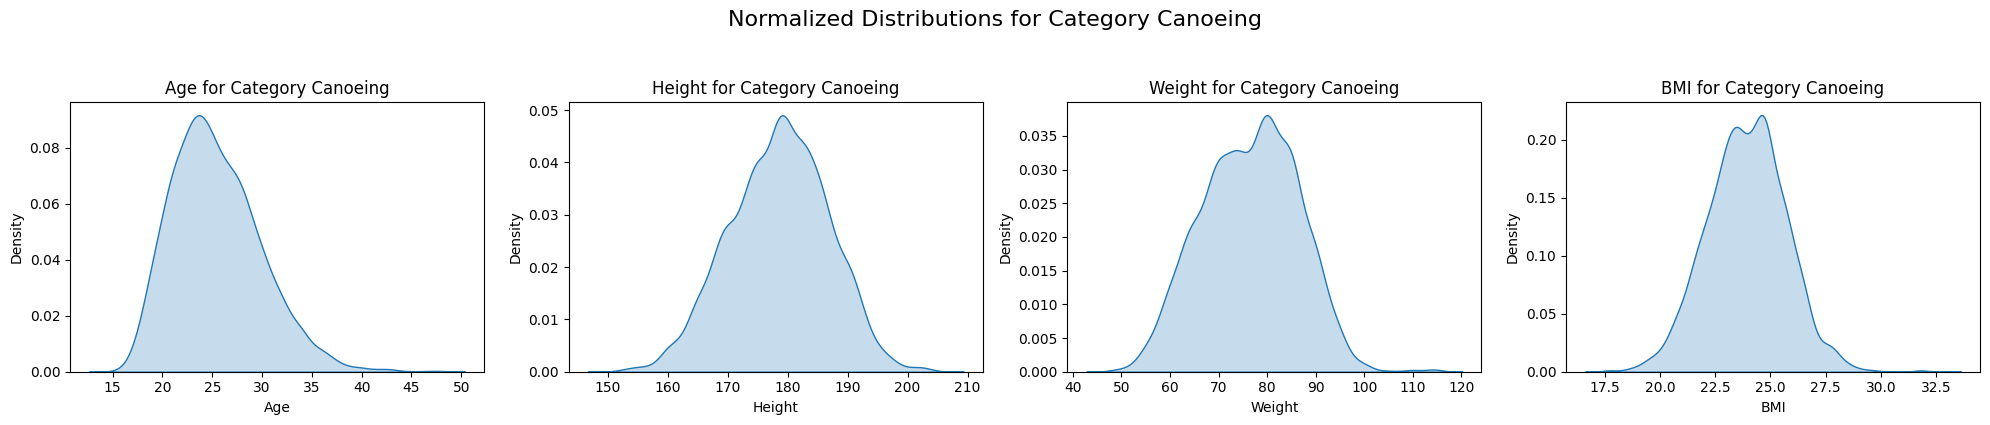

Cycling


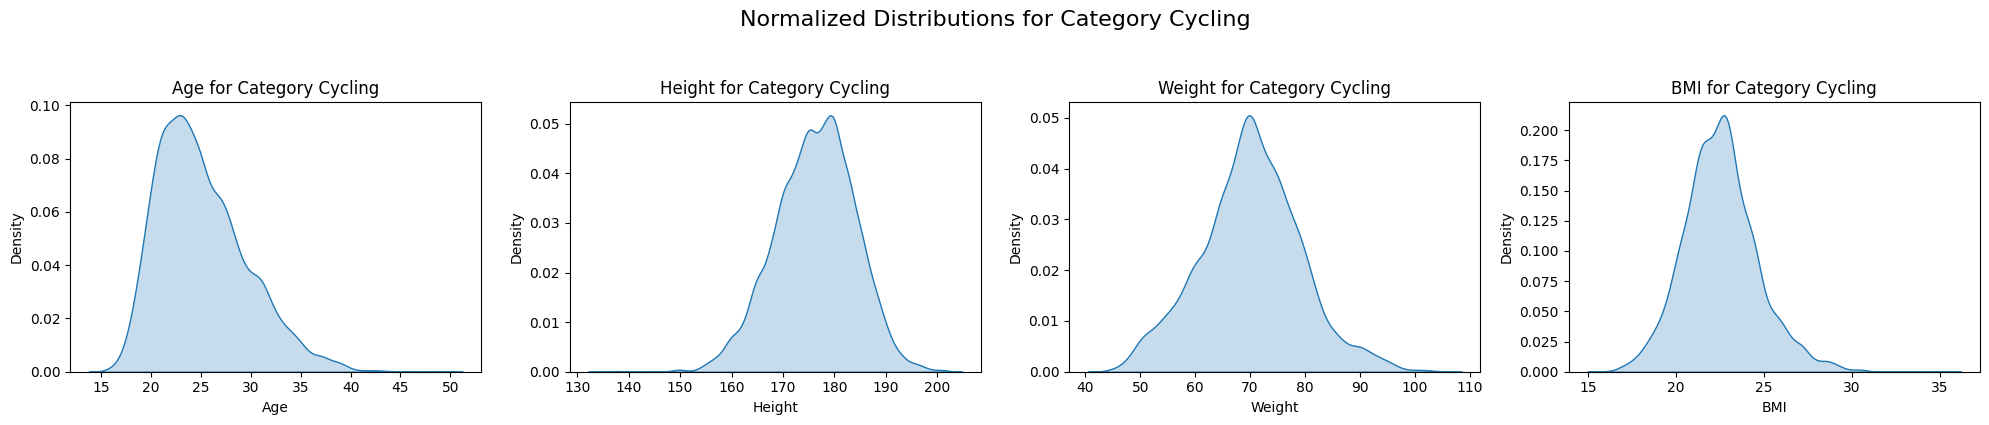

Diving


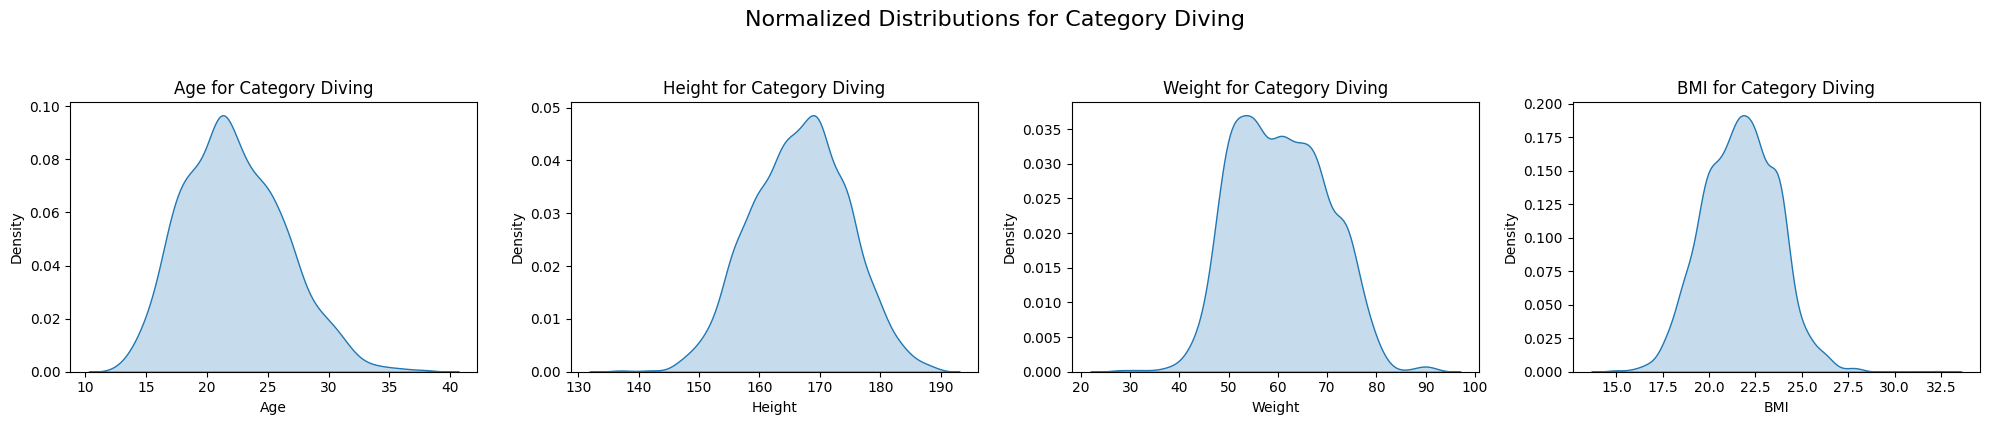

Equestrianism


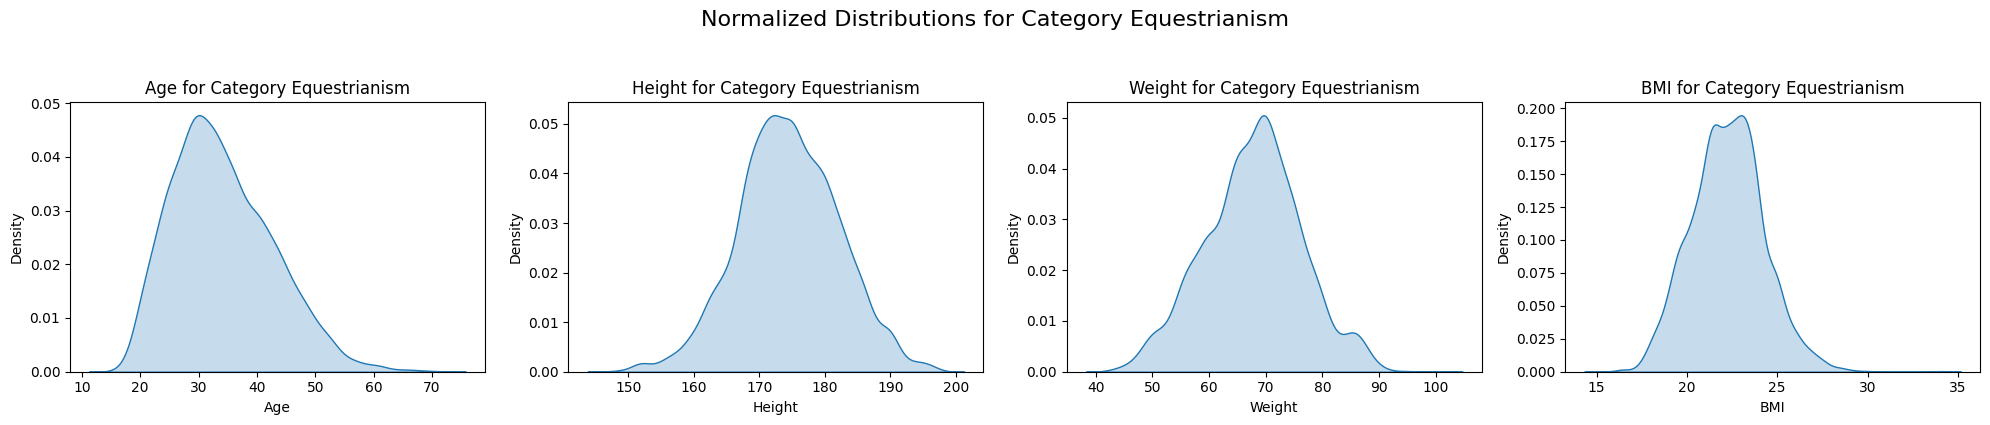

Fencing


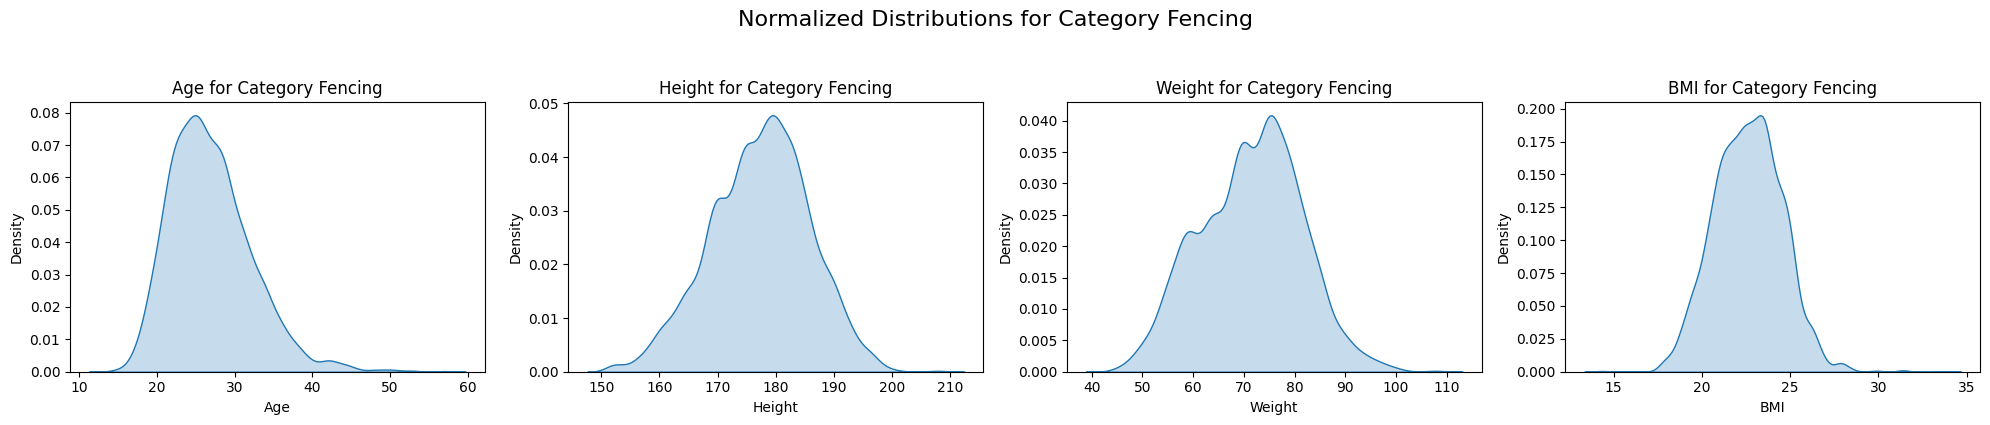

Football


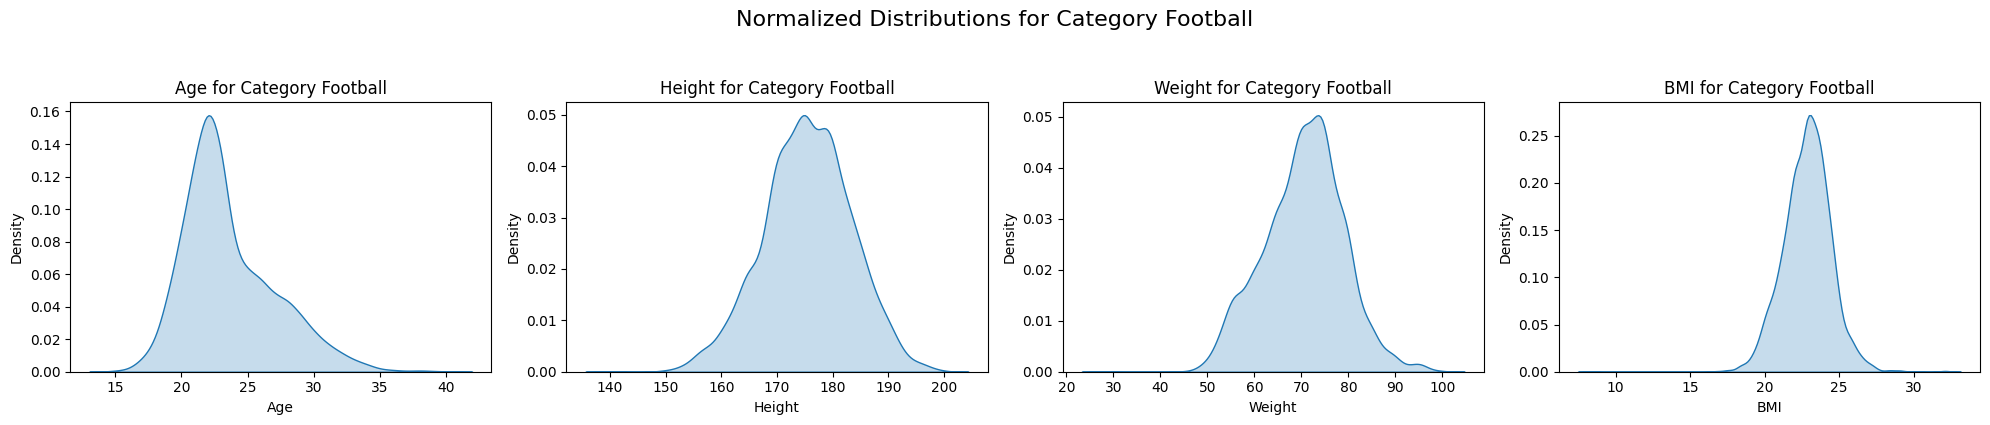

Golf


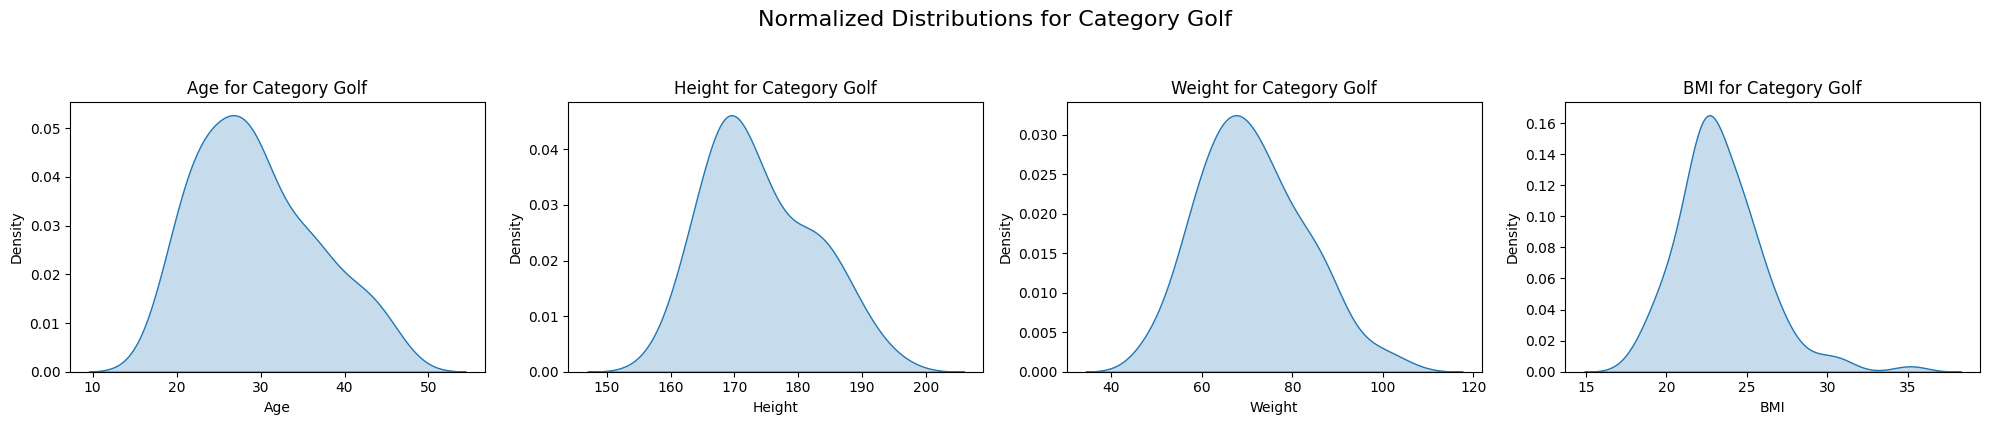

Gymnastics


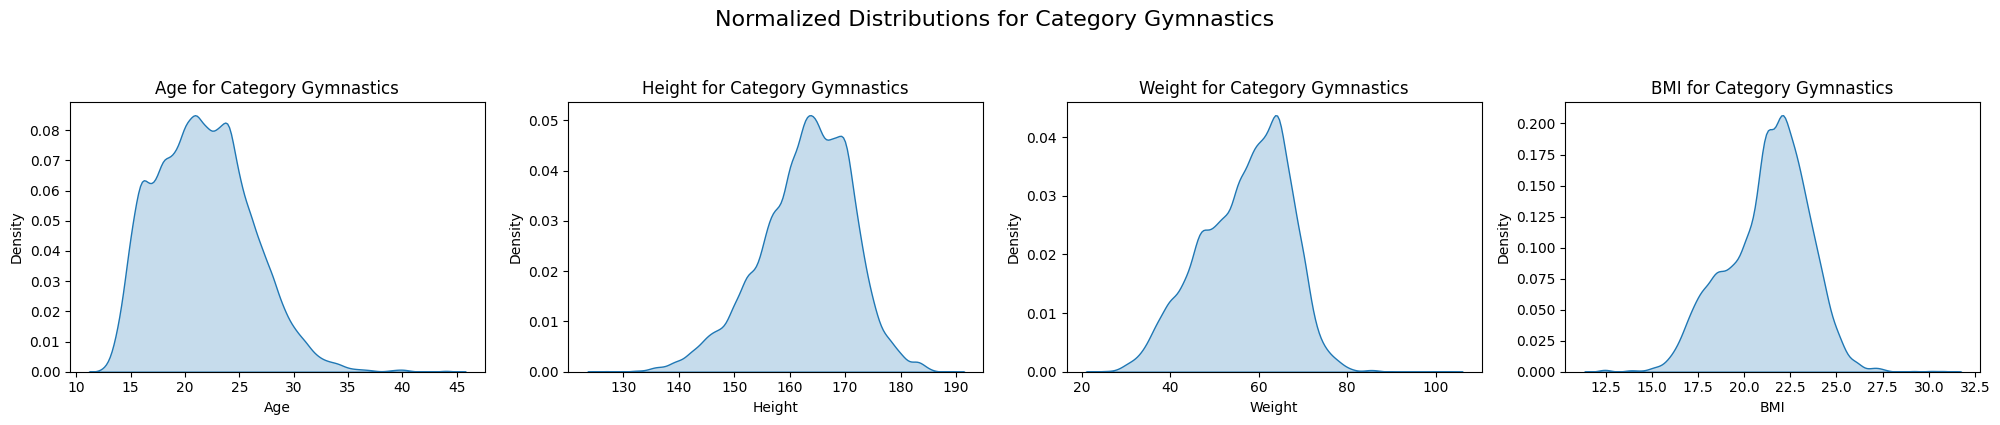

Handball


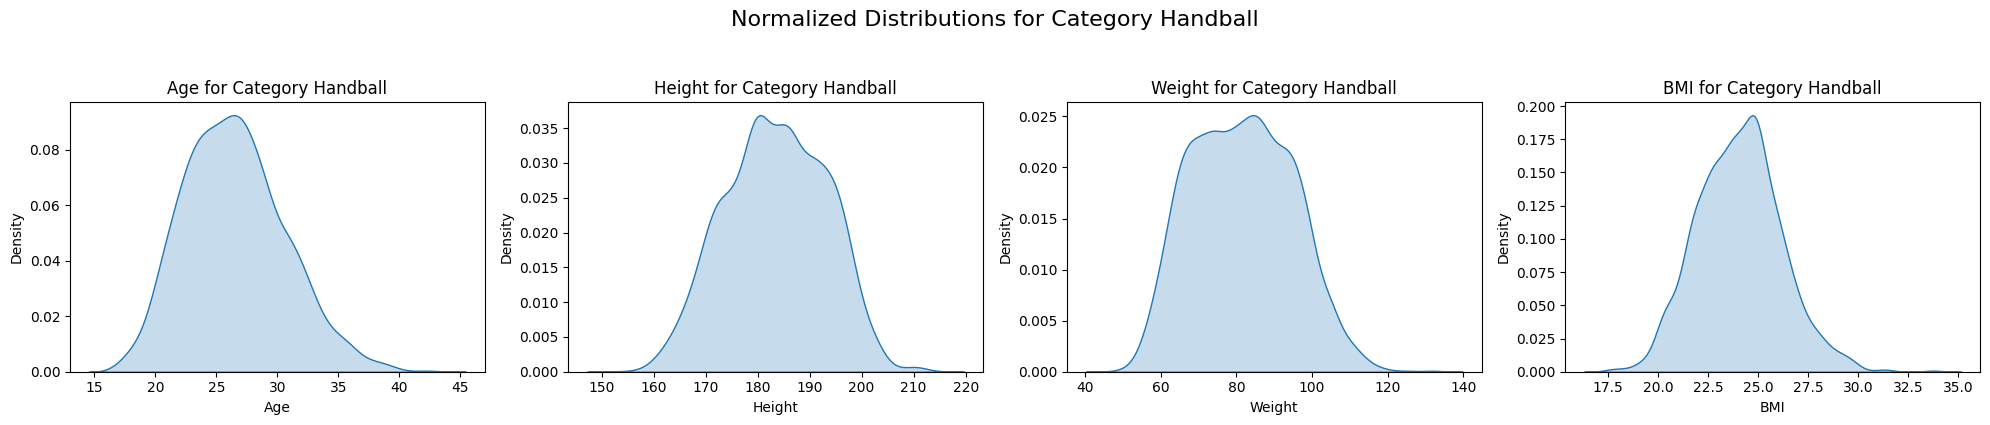

Hockey


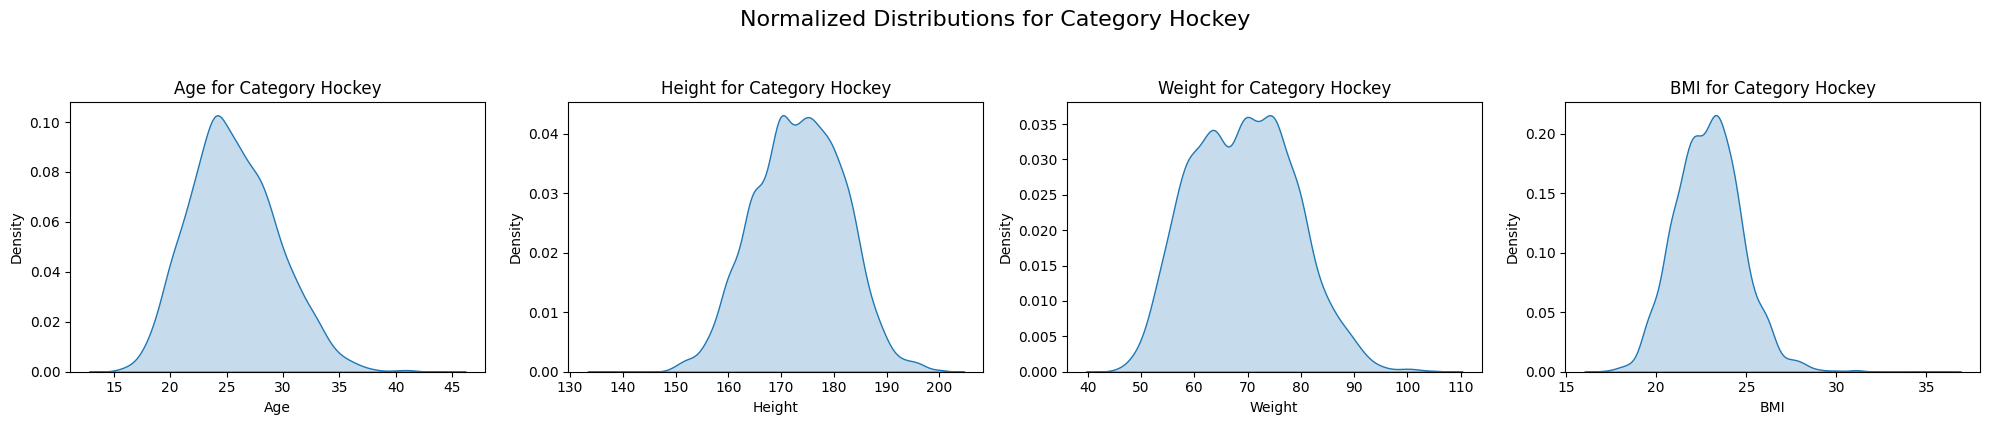

Judo


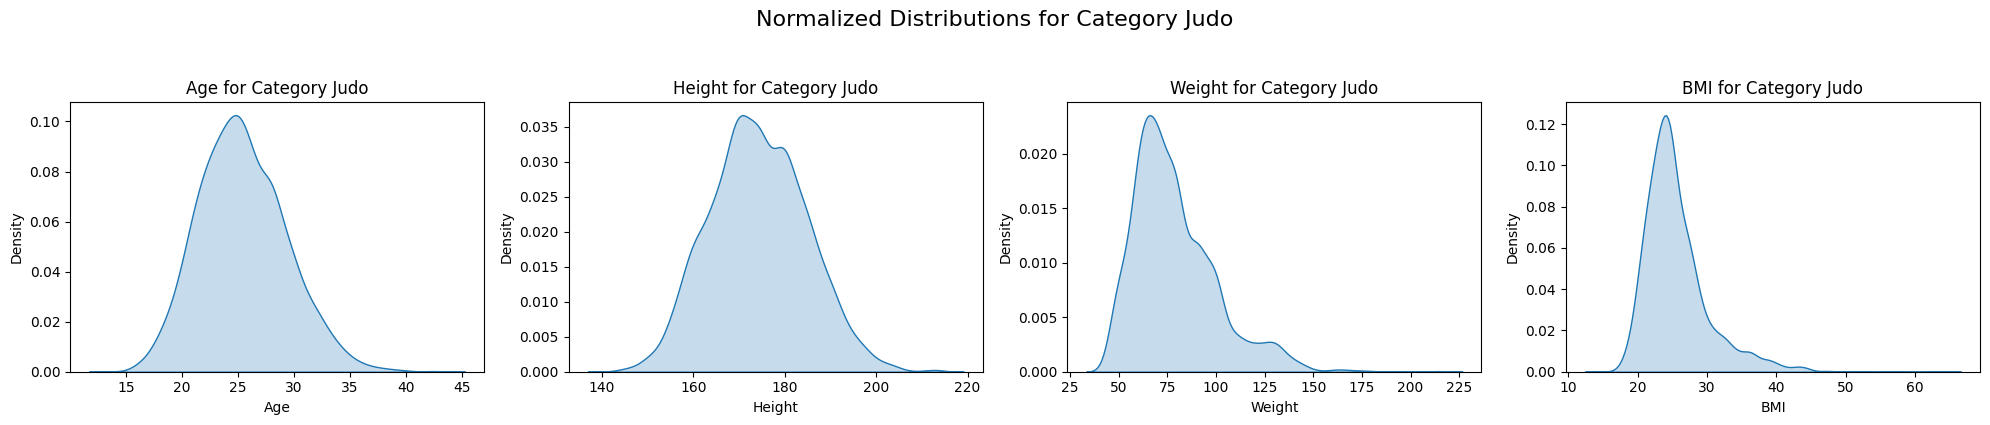

Modern Pentathlon


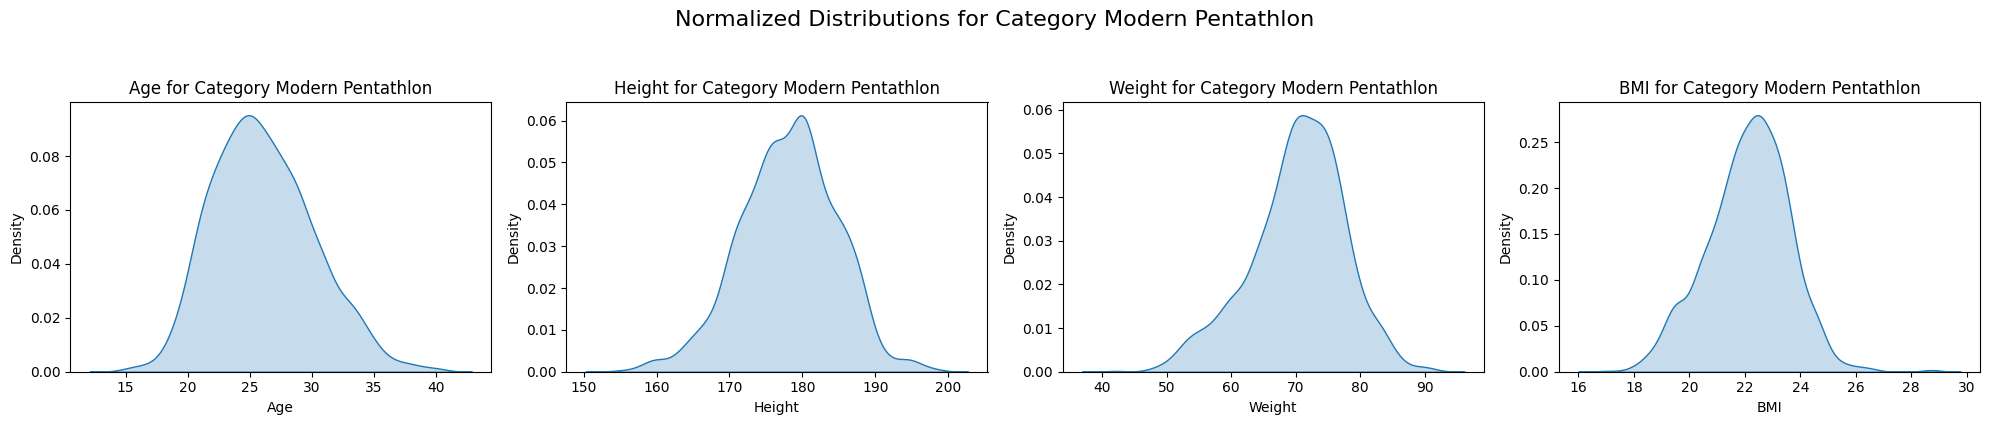

Rhythmic Gymnastics


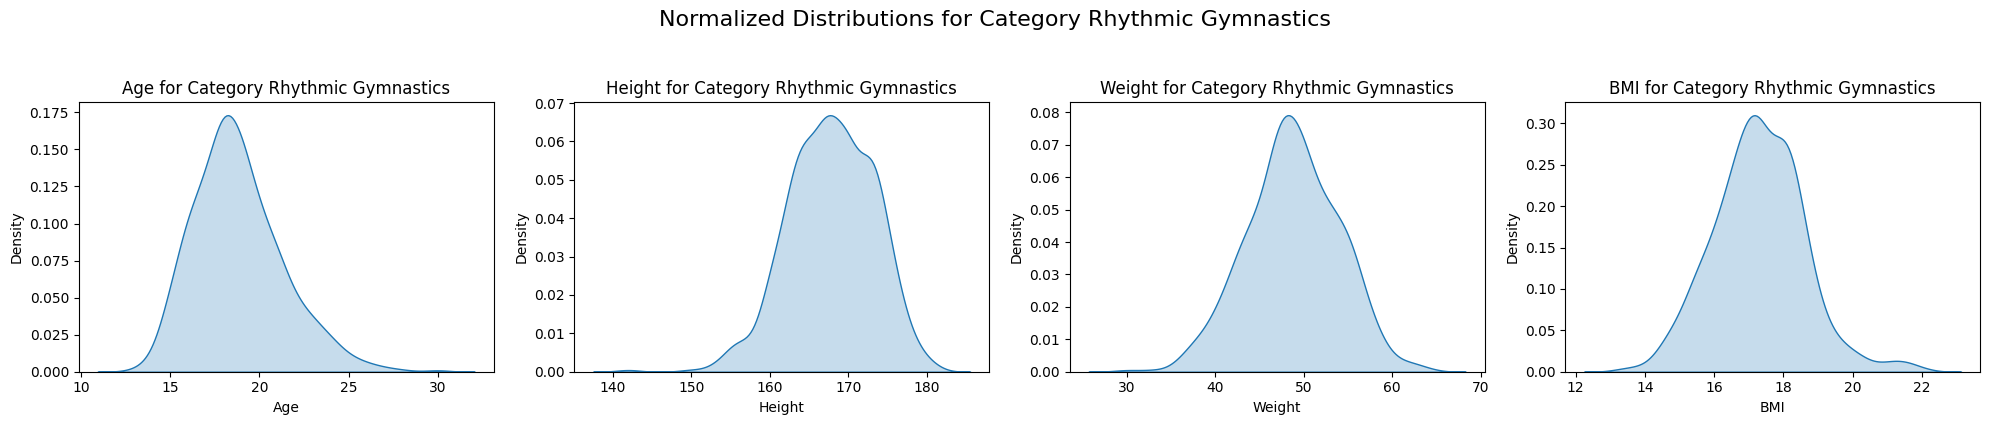

Rowing


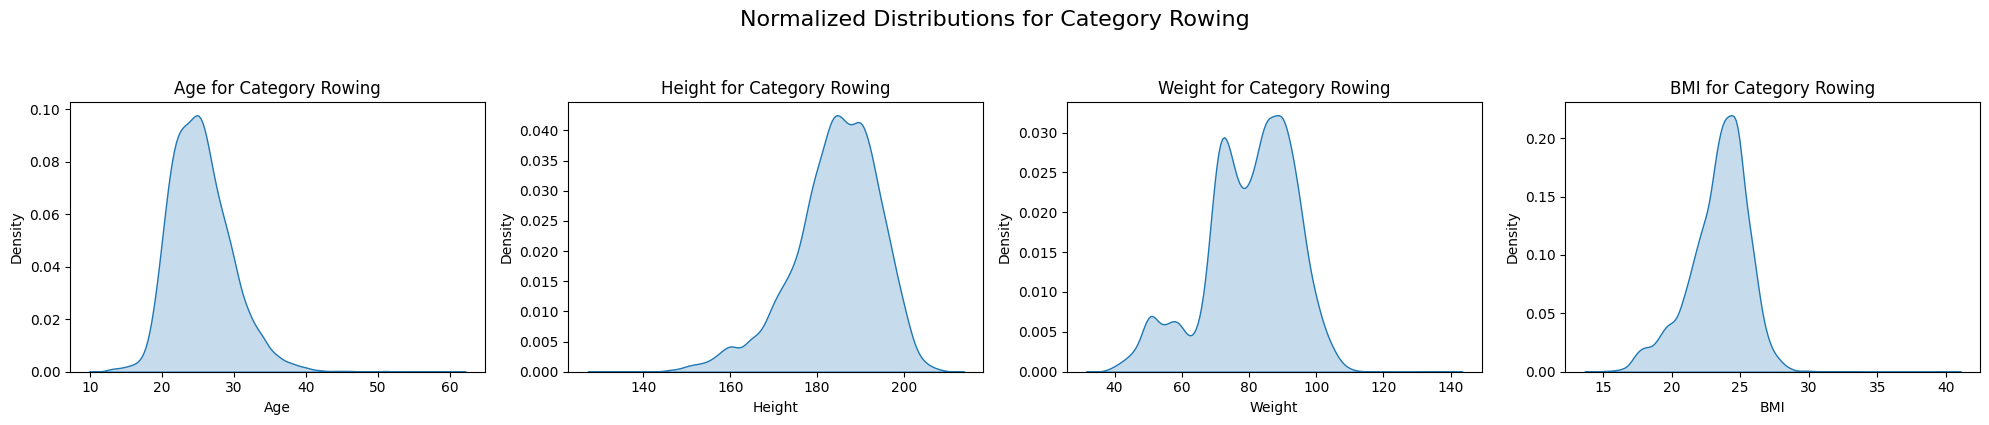

Rugby Sevens


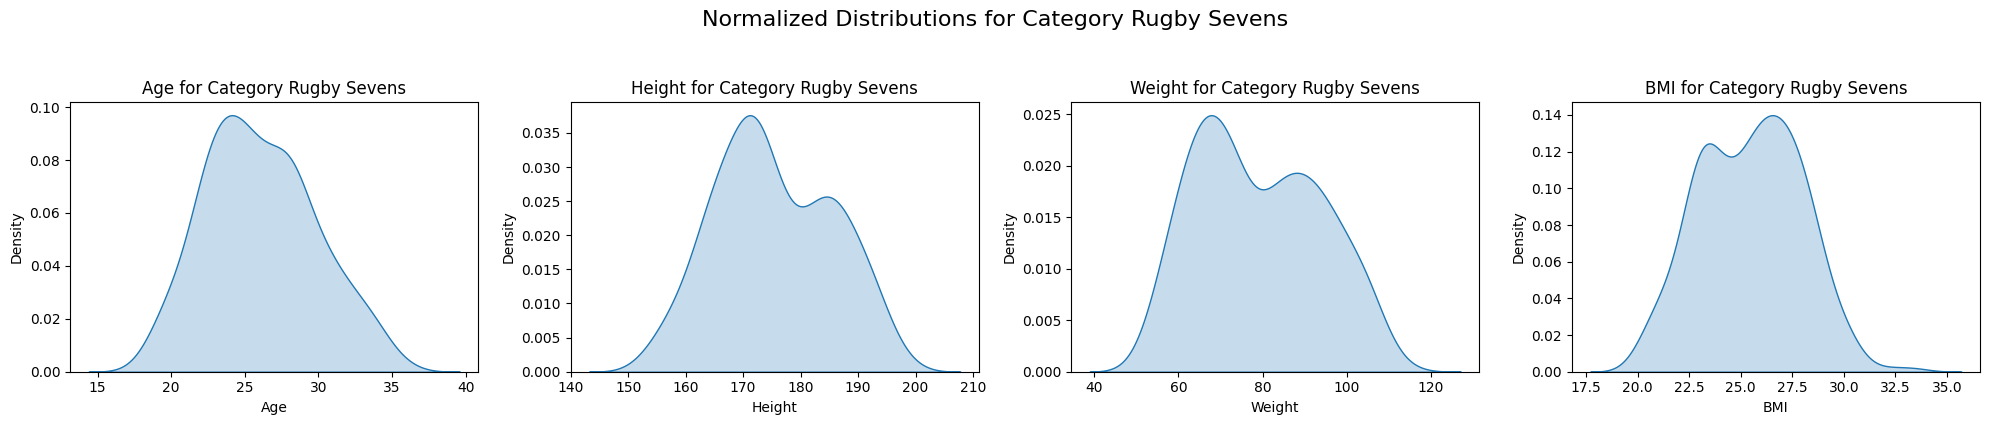

Sailing


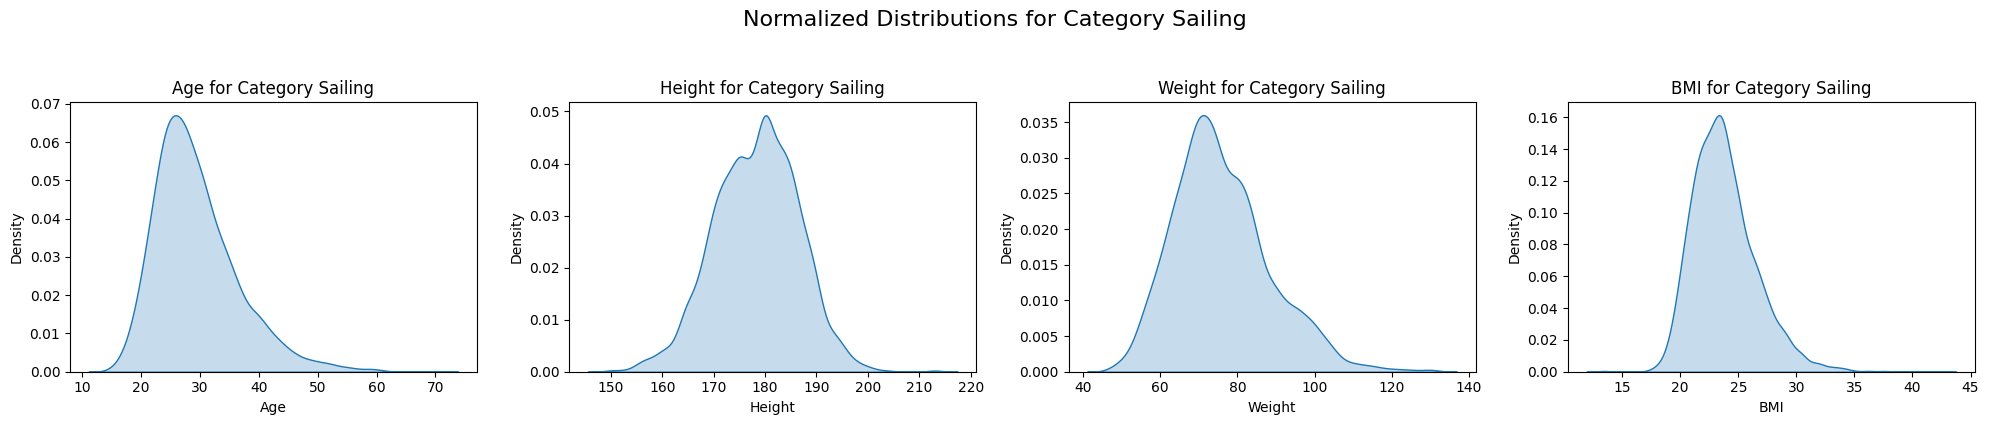

Shooting


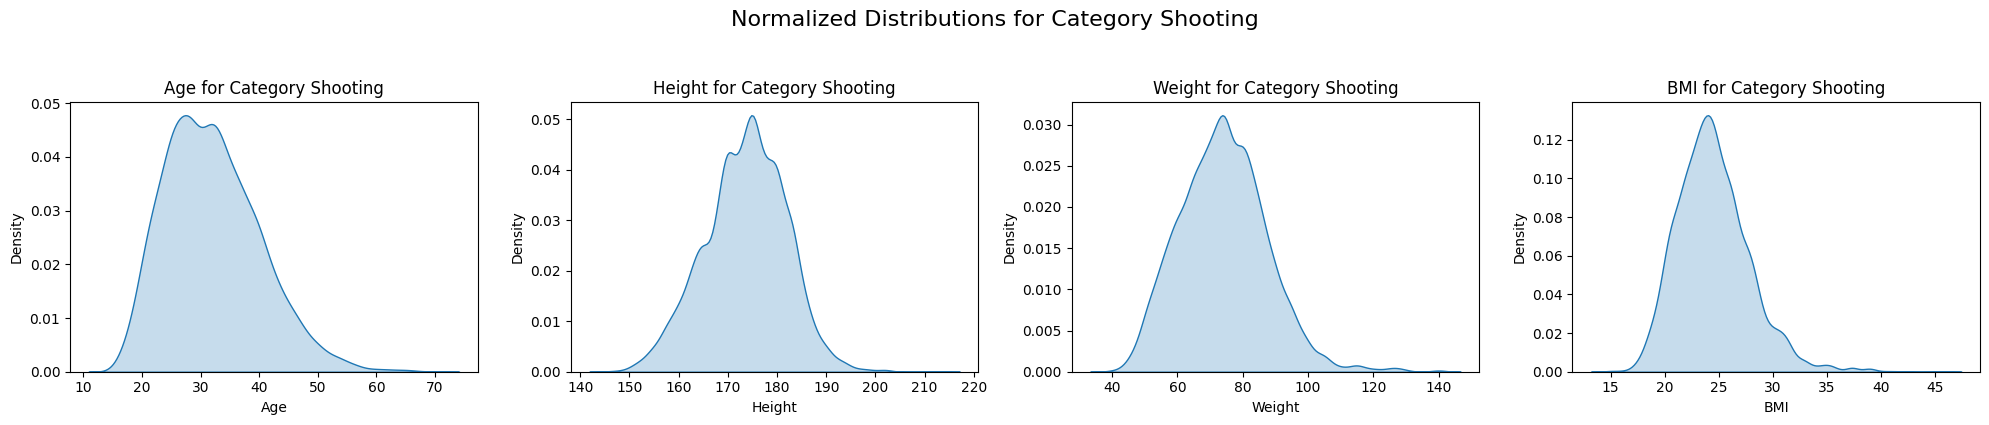

Softball


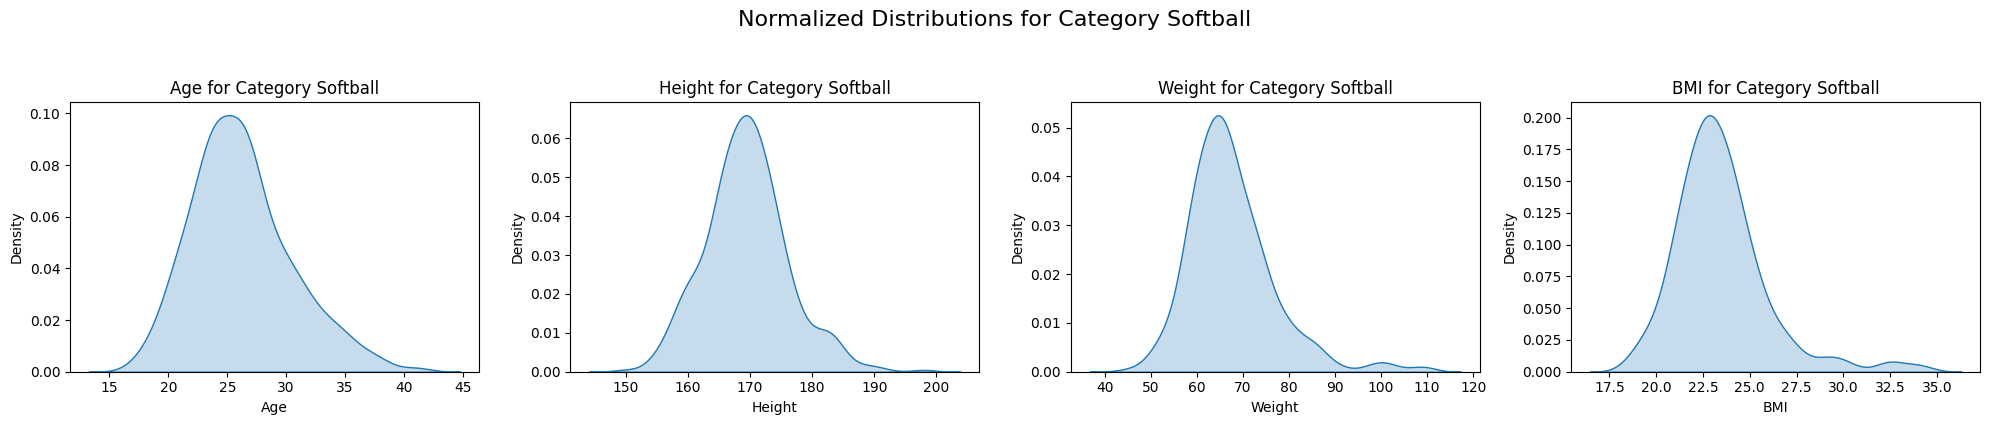

Swimming


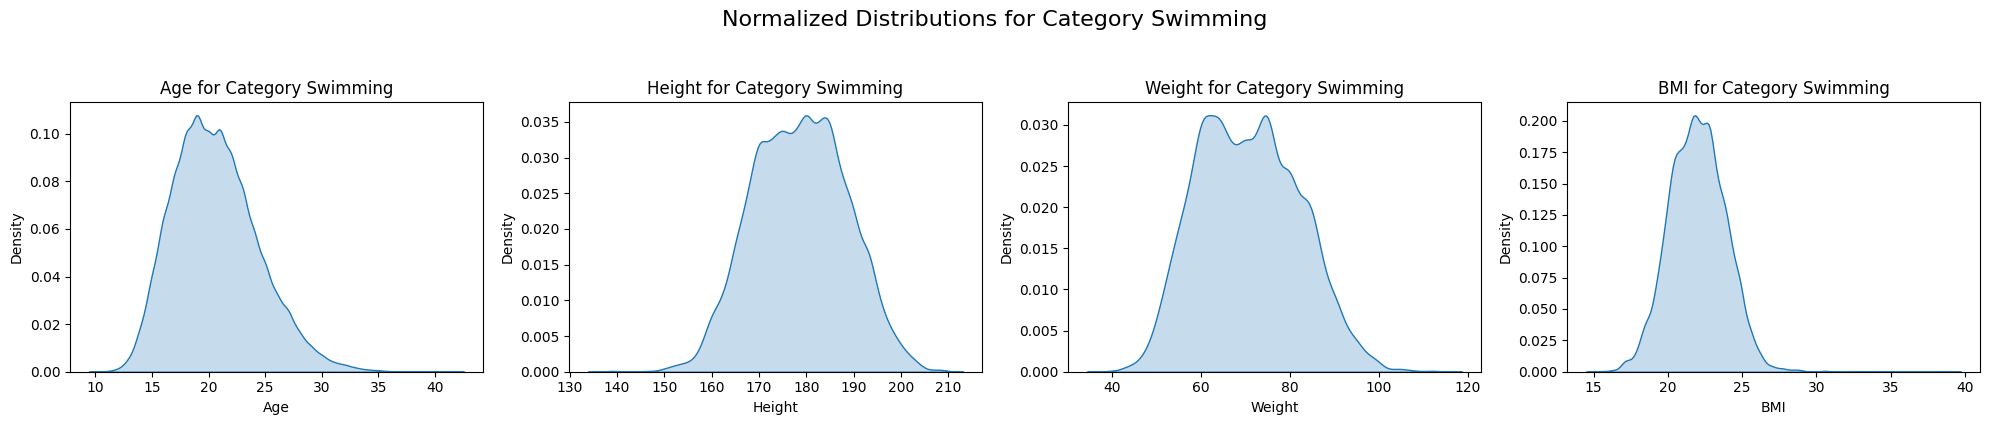

Synchronized Swimming


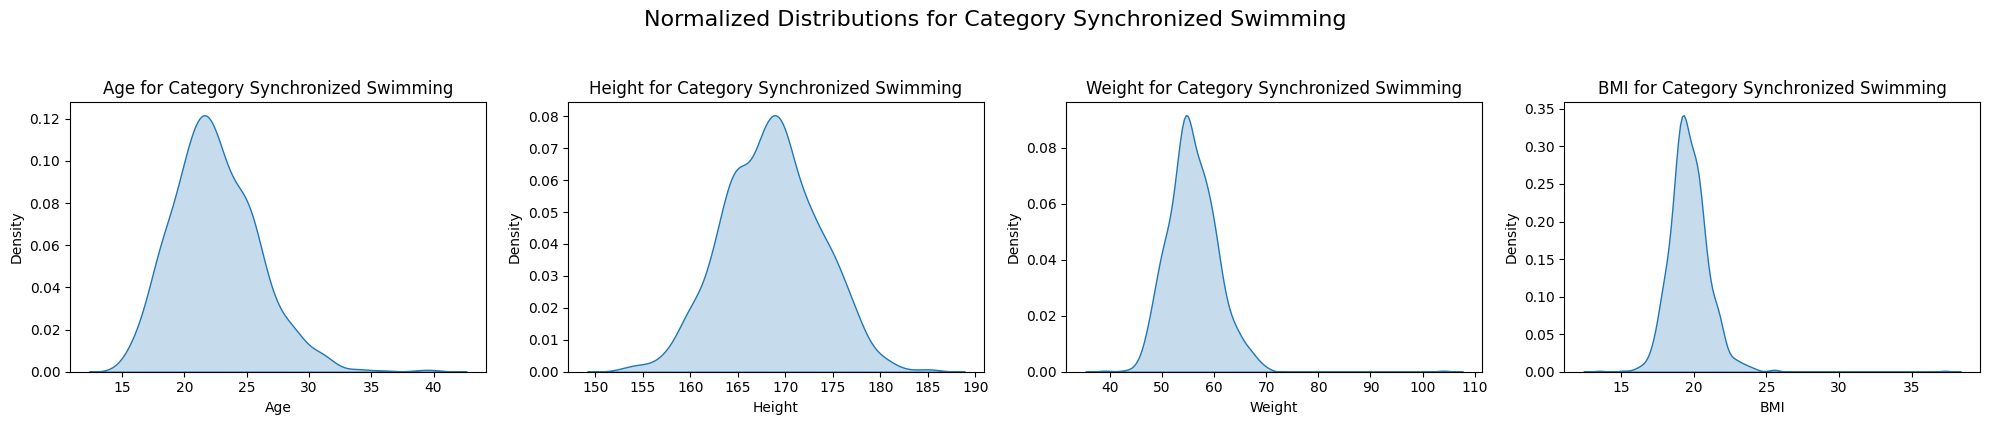

Table Tennis


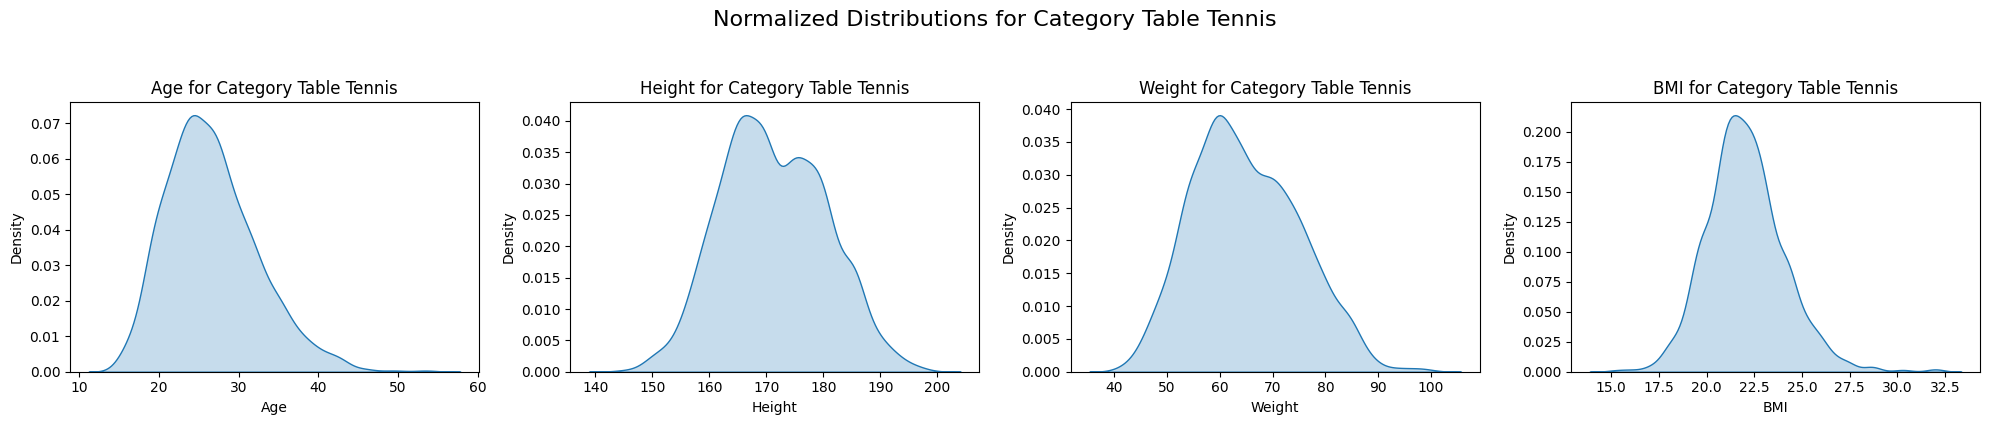

Taekwondo


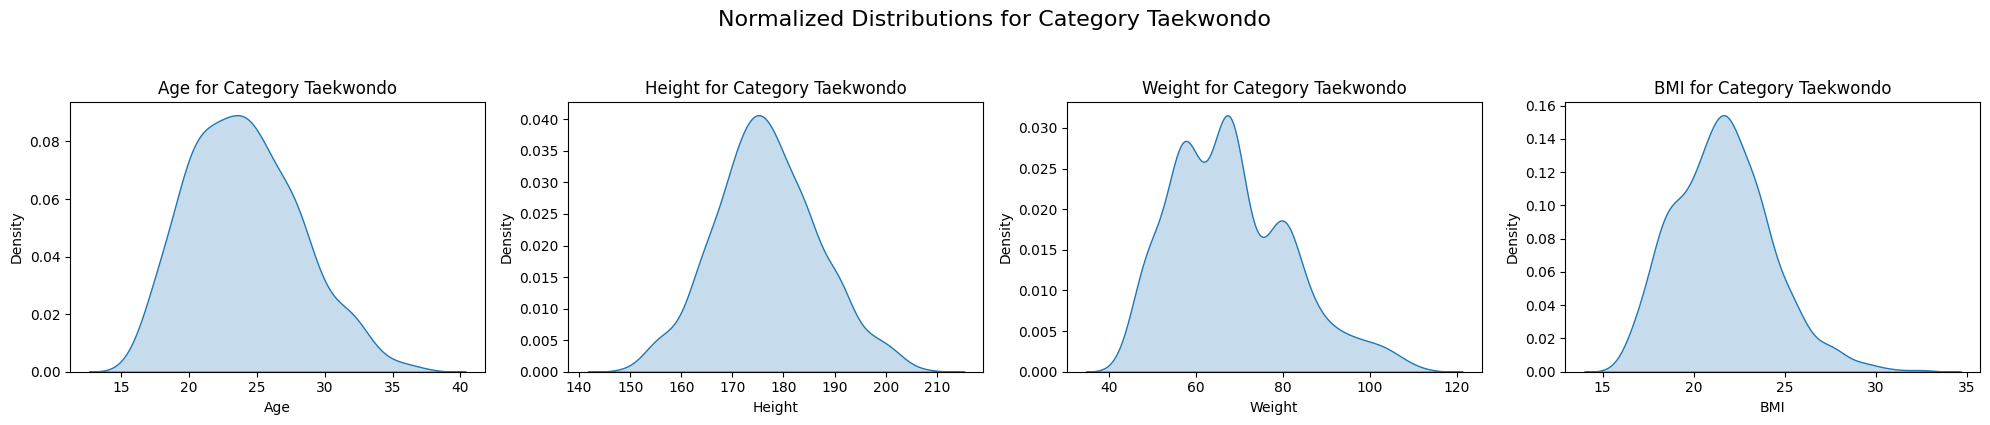

Tennis


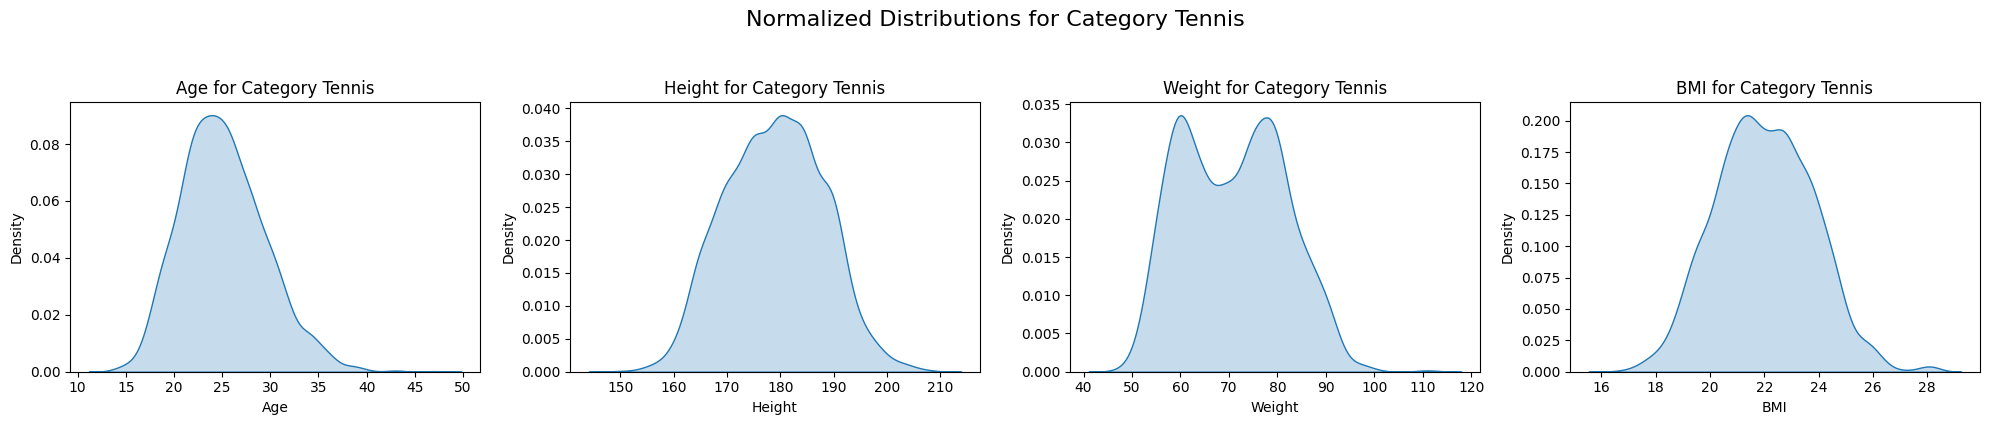

Trampolining


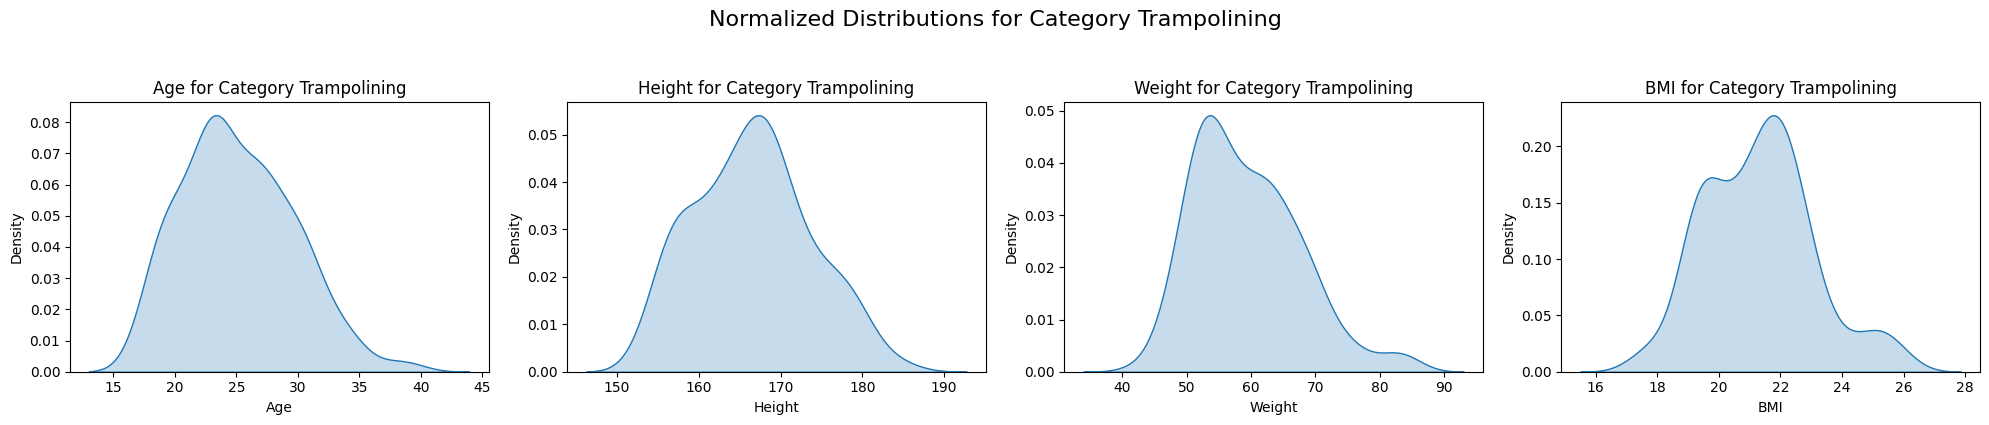

Triathlon


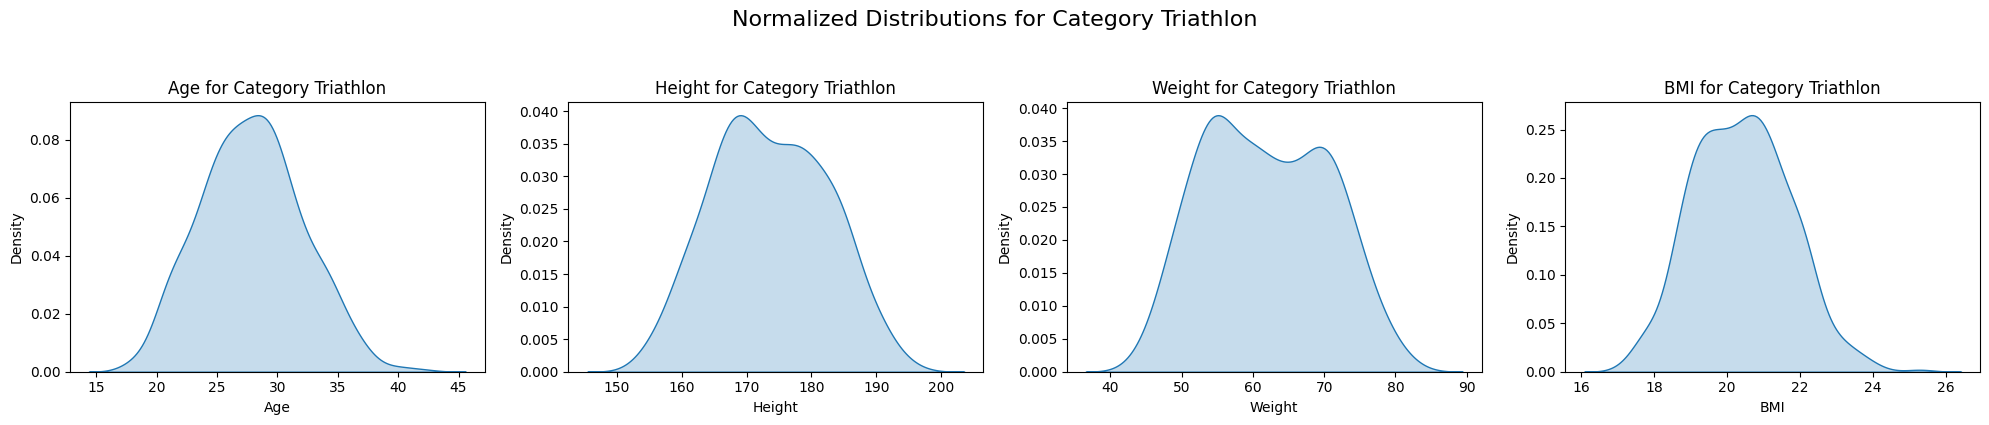

Volleyball


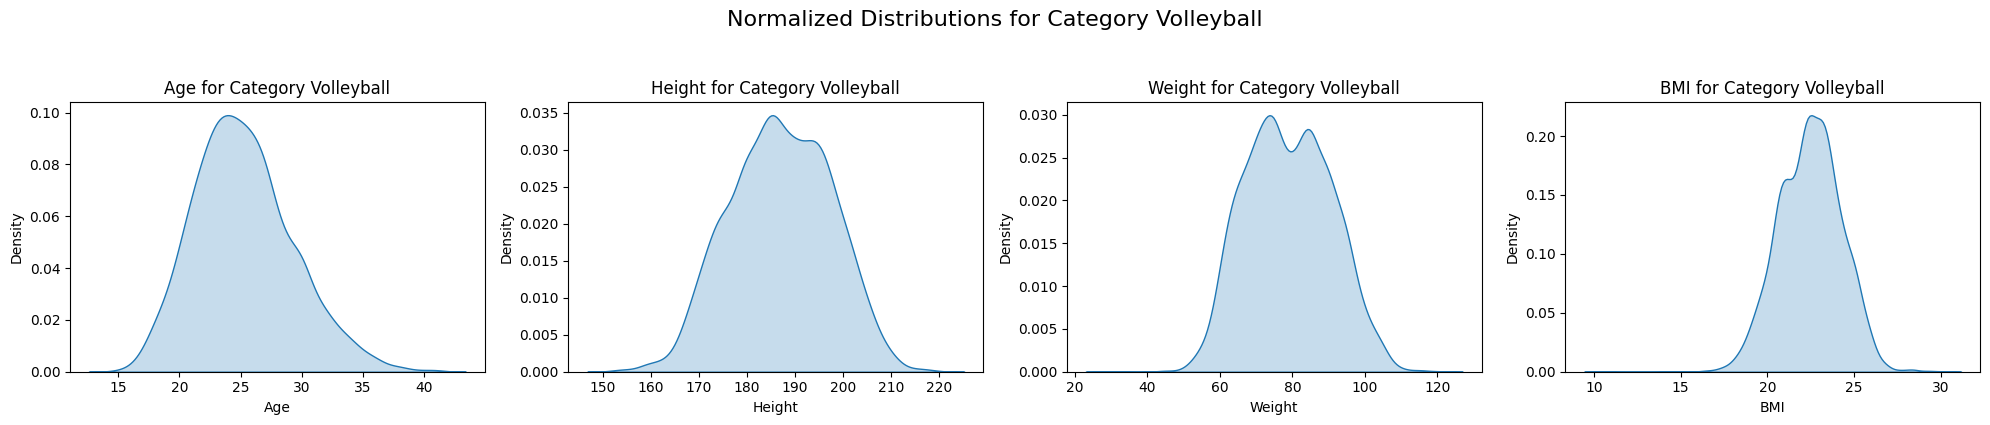

Water Polo


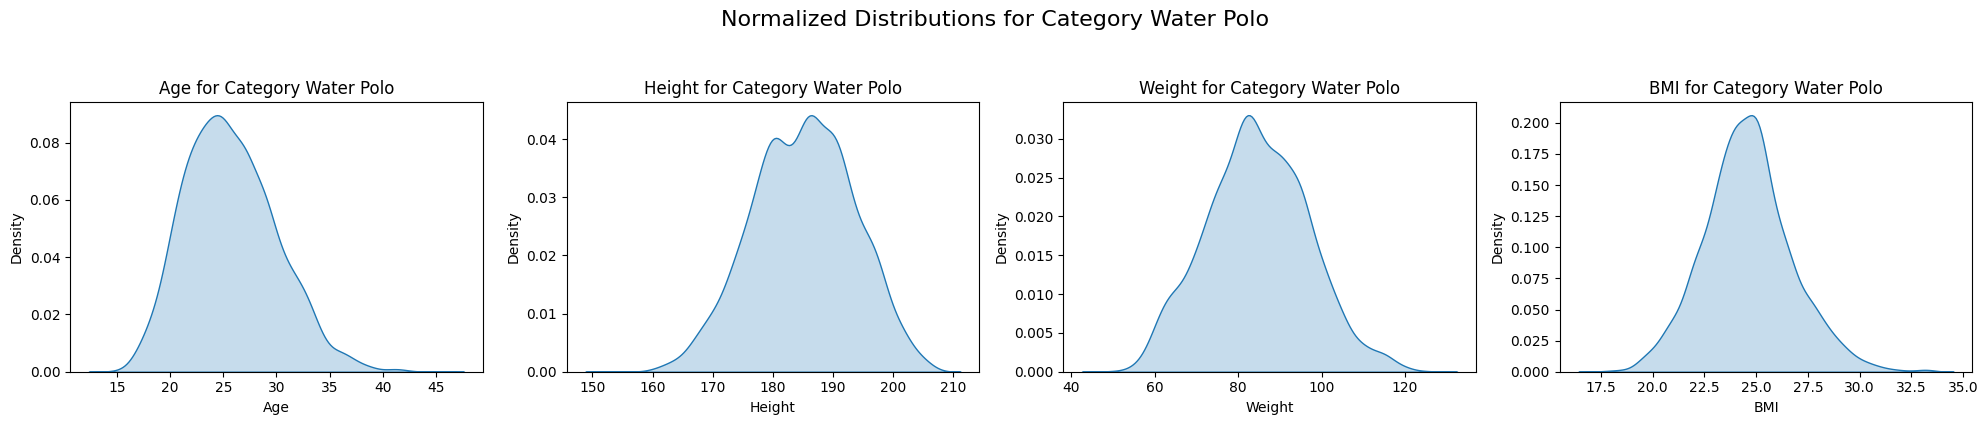

Weightlifting


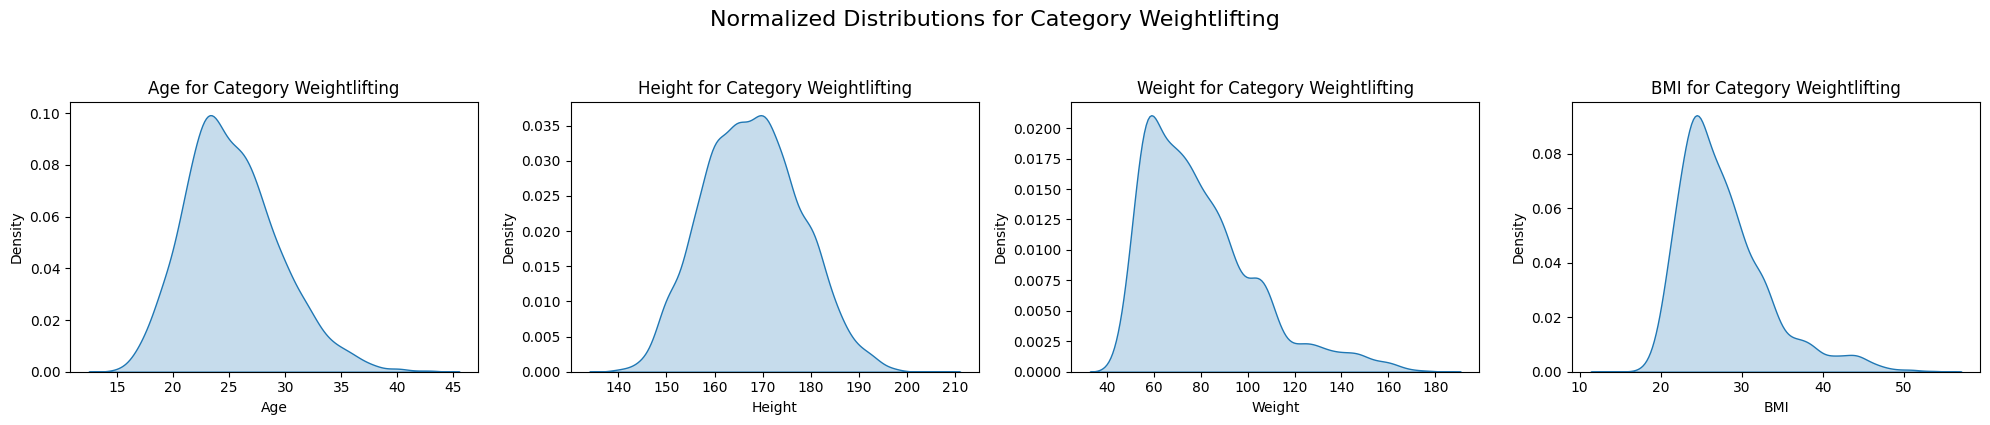

Wrestling


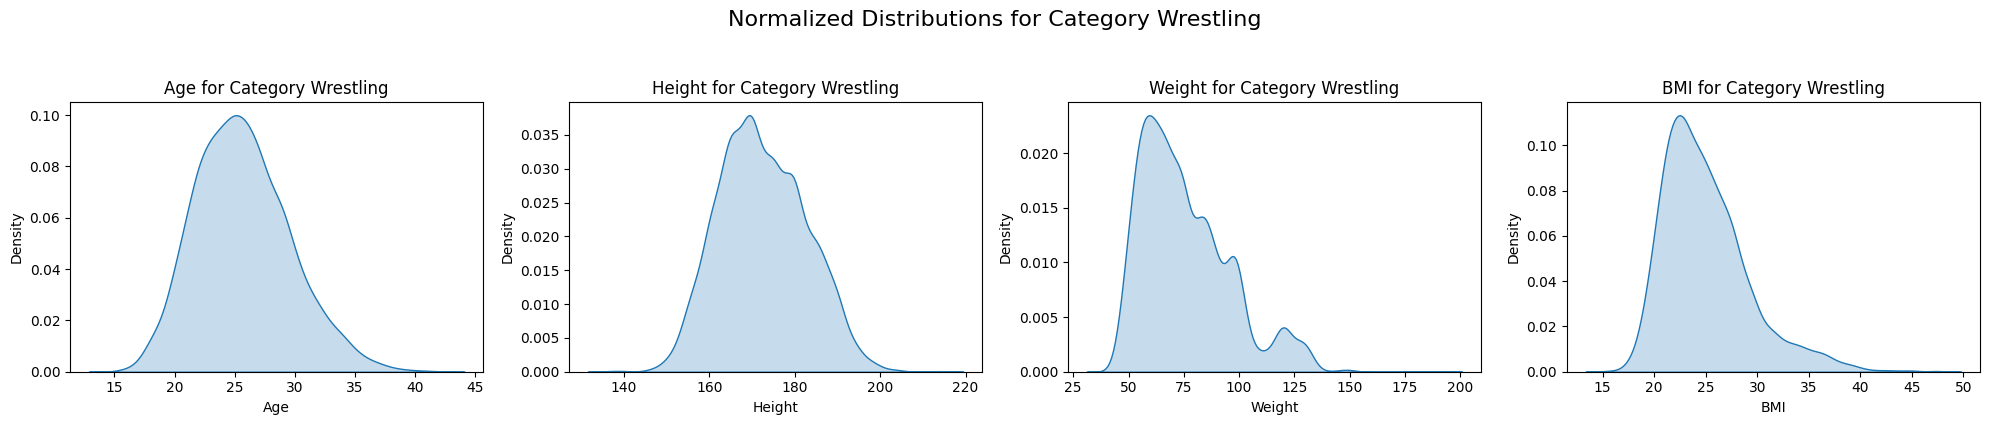

In [29]:


for sport, sport_df in dict_df_grouped_by_sport.items():
    # Drop the 'Category' column since we're not plotting it
    
    # Create a FacetGrid where each variable will be a separate column
    fig, axes = plt.subplots(1, len(sport_df.columns), figsize=(5 * len(sport_df.columns), 4))
    
    # Iterate over columns and plot KDE for each
    for i, column in enumerate(sport_df.columns):
        sns.kdeplot(sport_df[column], fill=True, ax=axes[i])
        axes[i].set_title(f"{column} for Category {sport}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Density")
    
    # Add a title for the entire plot
    fig.suptitle(f"Normalized Distributions for Category {sport}", y=1.05, fontsize=16)
    print(sport)

    # Show the plot
    plt.tight_layout()
    plt.show()
    

In [33]:



scaler = StandardScaler()

for sport, sport_df in dict_df_grouped_by_sport.items():
    
    scaled_df = pd.DataFrame(scaler.fit_transform(sport_df.select_dtypes(include=['float64', 'int64'])), columns=sport_df.select_dtypes(include=['float64', 'int64']).columns)

    for column in scaled_df.columns:

        max_entropy = np.log2(len(scaled_df[column].unique()))
        counts, _ = np.histogram(sport_df[column], bins=10)
        ent = entropy(counts+ 1e-10)
        normalized_ent = ent / max_entropy
        if normalized_ent < 0.3:
            print(f"Entropy for {column} in {sport}: {normalized_ent:.2f}")
        

Entropy for Weight in Archery: 0.29
Entropy for BMI in Archery: 0.17
Entropy for Age in Athletics: 0.28
Entropy for Height in Athletics: 0.29
Entropy for Weight in Athletics: 0.21
Entropy for BMI in Athletics: 0.13
Entropy for BMI in Badminton: 0.18
Entropy for Height in Baseball: 0.29
Entropy for Weight in Baseball: 0.27
Entropy for BMI in Baseball: 0.20
Entropy for Weight in Basketball: 0.27
Entropy for BMI in Basketball: 0.14
Entropy for BMI in Beach Volleyball: 0.23
Entropy for Height in Boxing: 0.26
Entropy for Weight in Boxing: 0.25
Entropy for BMI in Boxing: 0.13
Entropy for Weight in Canoeing: 0.30
Entropy for BMI in Canoeing: 0.17
Entropy for Height in Cycling: 0.28
Entropy for BMI in Cycling: 0.15
Entropy for BMI in Diving: 0.18
Entropy for BMI in Equestrianism: 0.17
Entropy for Age in Fencing: 0.30
Entropy for BMI in Fencing: 0.15
Entropy for Weight in Football: 0.27
Entropy for BMI in Football: 0.11
Entropy for BMI in Golf: 0.27
Entropy for Weight in Gymnastics: 0.27
Entrop